# Correlation analysis of the secondary fire season of bimodal clusters (new version)

In this notebook we study the correlation between the burned area during the secondary fire season's months of bimodal clusters and some climate indexes for each cluster. We used both delta and without delta time series.

First, we consider the correlation between the sum of the burned area of the fire season's months and the average of the indexes in these months. We apply that to bimodal's secondary fire seasons.

Then we consider the correlation between the sum of the burned area of the fire season's months and the average of the indexes in the previous months. Firstly, we will consider the climate index delta time series of the previous month, i.e., if the fire season is May and June, we will use the data of April and May. After that, we will use the 2 previous months and 3 previous ones.

We consider the following climate indexes: NINO3.4, NAO, POLEUR, EA, EA/WR, SCAND, PNA and WP.

In [1]:
setwd("..")

In [2]:
source("scripts/correlation_functions.R")

Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: sp
Warning message:
"package 'sp' was built under R version 3.6.3"Loading required package: magrittr
Warning message:
"package 'magrittr' was built under R version 3.6.3"
Attaching package: 'magrittr'

The following object is masked from 'package:tidyr':

    extract

Loading required package: RColorBrewer


Loading objects:
  coast.lines


In [3]:
# Data required
load("data/ba_mon_time_series_masked.Rdata", verbose = T)
load("fireSeason_def_2.Rdata", verbose = T)

Loading objects:
  masked_coords
  dates
  masked_ba_series
Loading objects:
  fireSeason_def_2


## Data loading

In [4]:
nina34 = read.table("CPC/nina34.anom.data.txt", skip = 3, nrows = 72)
colnames(nina34) = c("Year", 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')
nina34[,-1] = (nina34[,-1] - mean(as.matrix(nina34[32:61,-1]))) / sd(as.matrix(nina34[32:61,-1]))

In [5]:
nao = read.table("CPC/nao_index.tim.txt", skip = 8, header = T)
nao <- nao %>% spread(MONTH,INDEX)
colnames(nao) = c("Year", 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')

In [6]:
poleur = read.table("CPC/poleur_index.tim", skip = 8, header = T)
poleur <- poleur %>% spread(MONTH,INDEX)
colnames(poleur) = c("Year", 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')

In [7]:
ea = read.table("CPC/ea_index.tim.txt", skip = 8, header = T)
ea <- ea %>% spread(MONTH,INDEX)
colnames(ea) = c("Year", 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')

In [8]:
eawr = read.table("CPC/eawr_index.tim.txt", skip = 8, header = T)
eawr <- eawr %>% spread(MONTH,INDEX)
colnames(eawr) = c("Year", 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')

In [9]:
pna = read.table("CPC/pna_index.tim.txt", skip = 8, header = T)
pna <- pna %>% spread(MONTH,INDEX)
colnames(pna) = c("Year", 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')

In [10]:
scand = read.table("CPC/scand_index.tim.txt", skip = 8, header = T)
scand <- scand %>% spread(MONTH,INDEX)
colnames(scand) = c("Year", 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')

In [11]:
wp = read.table("CPC/wp_index.tim.txt", skip = 8, header = T)
wp <- wp %>% spread(MONTH,INDEX)
colnames(wp) = c("Year", 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')

# Secondary fire season of bimodals fire seasons

# Without deltas

## With no persistence

In [12]:
#' @title Get highest correlation per pixel
#' @description Function for obtaining the highest (in module) correlation of a pixel among all the significant correlations
# that its burned area has with all the climate indexes
#' @param is a row of a correlation dataframe
#' @return the value of the highest correlation
getMaxCorr <- function (row){
    if (all(is.na(row[-c(1,2)])) | sum(row[seq(4, length(row), 2)] < 0.05) < 1){
        return (NA)
    } else {
        ind = which(row[seq(4, length(row), 2)] < 0.05)
        ma = max(row[2*ind+1])
        mi = min(row[2*ind+1])
        if (abs(mi) > abs(ma)){
            return (mi)
        } else {
            return (ma)
        }
    }
}

In [13]:
#' @title Get the climate index which has the highest correlation per pixel
#' @description Function for obtaining the climate index which has the highest (in module) correlation of a pixel among all the
#' significant correlations that its burned area has with all the climate indexes
#' @param is a row of a correlation dataframe
#' @param n.indexes number of different indexes used in corr.df
#' @return the position of the index between 1 and number of the climate indexes
getIndWithMaxCorr <- function (row, n.indexes = 8){
    if (all(is.na(row[-c(1,2)])) | sum(row[seq(4, length(row), 2)] < 0.05) < 1){
        return (NA)
    } else {
        ind = which(row[seq(4, length(row), 2)] < 0.05)
        ma = max(row[2*ind+1])
        mi = min(row[2*ind+1])
        if (abs(mi) > abs(ma)){
            ind.max = which(row[seq(3, length(row)-1, 2)] == mi)
        } else {
            ind.max = which(row[seq(3, length(row)-1, 2)] == ma)
        }
        ind.max = ind.max %% n.indexes
        if (ind.max == 0){
            ind.max = n.indexes
        }
        return (ind.max)
    }
}

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"Warning message in min(x):
"ningún argumento finito para min; retornando Inf"Warning message in max(x):
"ningun argumento finito para max; retornando -Inf"Warning message in min(x):
"ningún argumento finito para min; retornando Inf"Warning message in max(x):
"ningun argumento finito para max; retornando -Inf"Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"Warning message in min(x):
"ningún argumento finito para min; retornando Inf"Warning message in max(x):
"ningun argumento finito para max; retornando -Inf"Warning message in min(x):
"ningún argumento finito para min; retornando Inf"Warning message in max(x):
"ningun argumento finito para max; retornando -Inf"

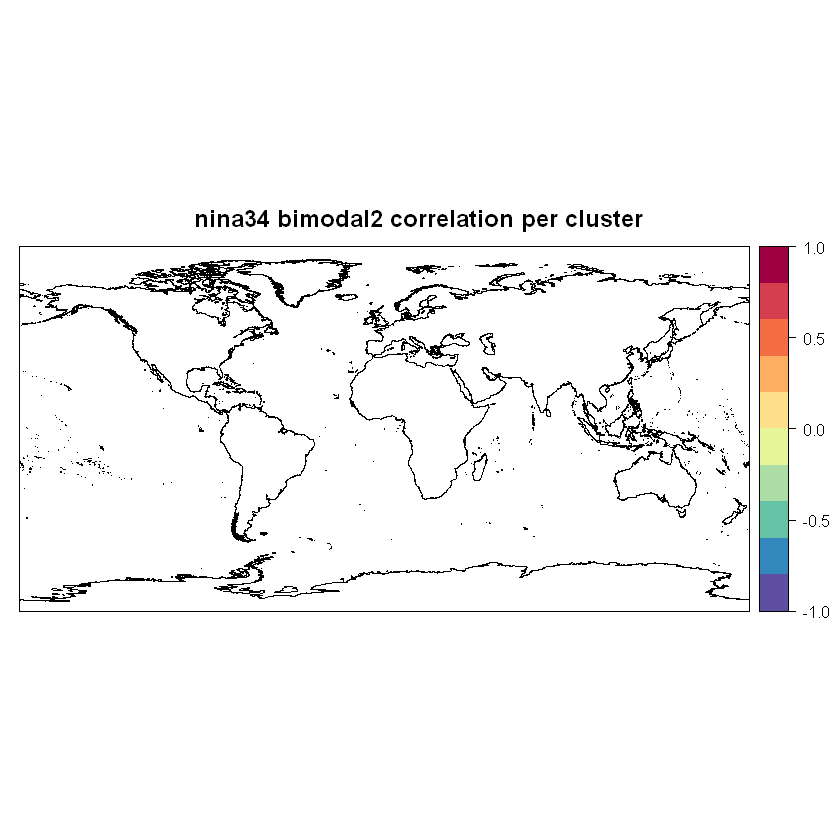

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

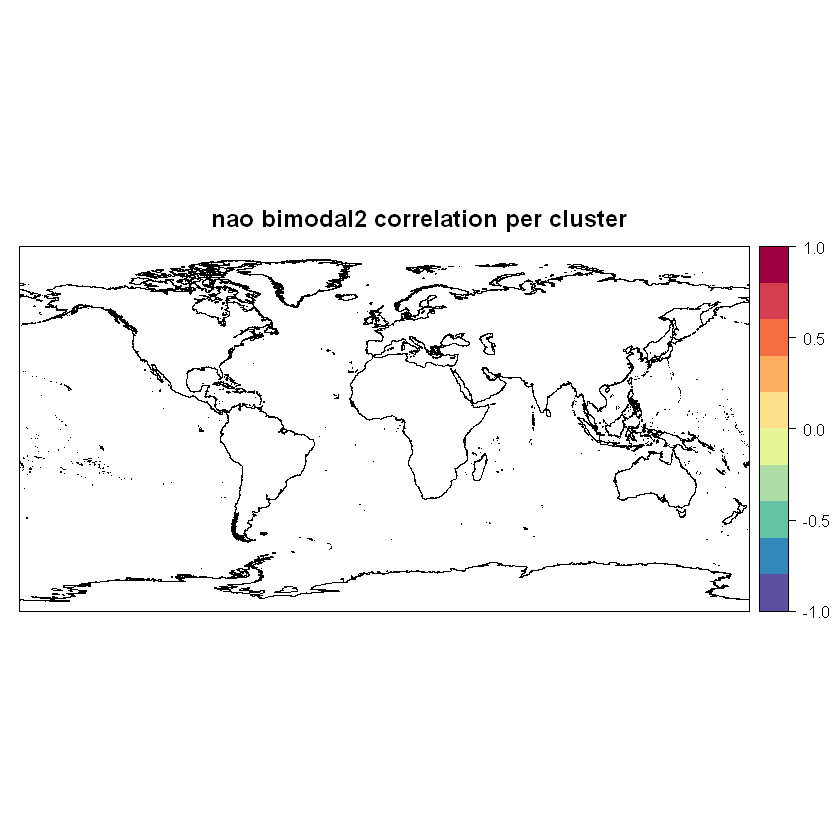

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"Warning message in min(x):
"ningún argumento finito para min; retornando Inf"Warning message in max(x):
"ningun argumento finito para max; retornando -Inf"Warning message in min(x):
"ningún argumento finito para min; retornando Inf"Warning message in max(x):
"ningun argumento finito para max; retornando -Inf"

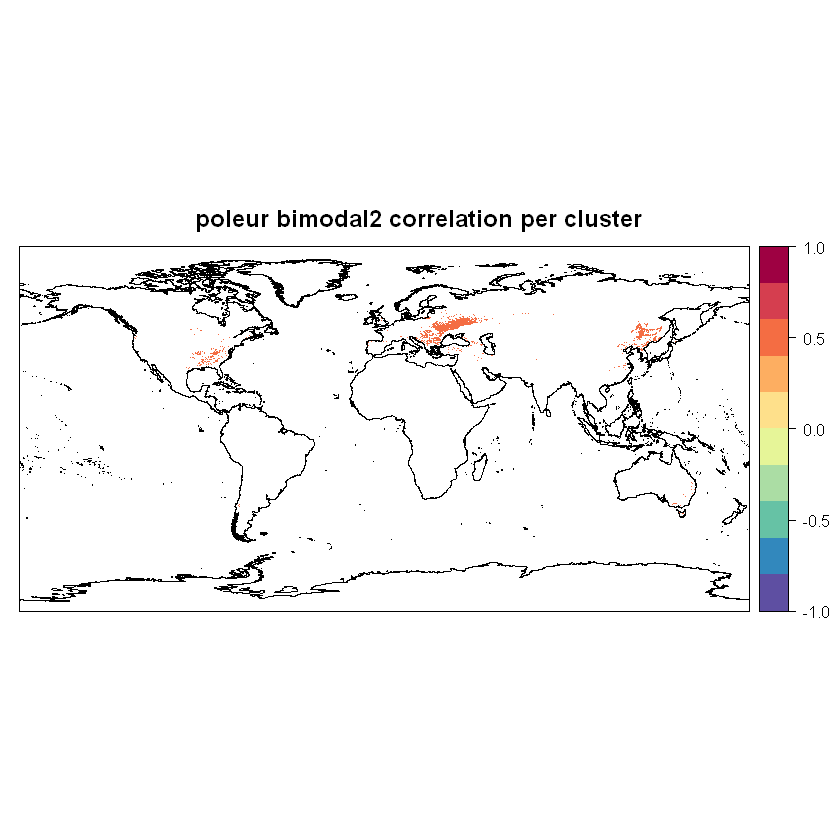

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"Warning message in min(x):
"ningún argumento finito para min; retornando Inf"Warning message in max(x):
"ningun argumento finito para max; retornando -Inf"Warning message in min(x):
"ningún argumento finito para min; retornando Inf"Warning message in max(x):
"ningun argumento finito para max; retornando -Inf"

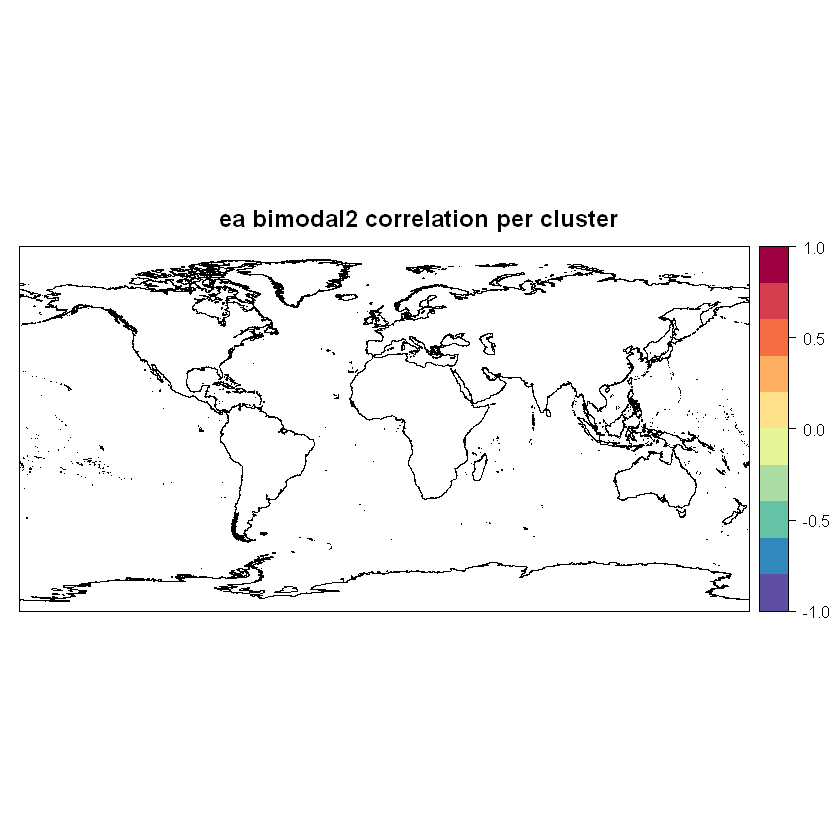

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"Warning message in min(x):
"ningún argumento finito para min; retornando Inf"Warning message in max(x):
"ningun argumento finito para max; retornando -Inf"Warning message in min(x):
"ningún argumento finito para min; retornando Inf"Warning message in max(x):
"ningun argumento finito para max; retornando -Inf"

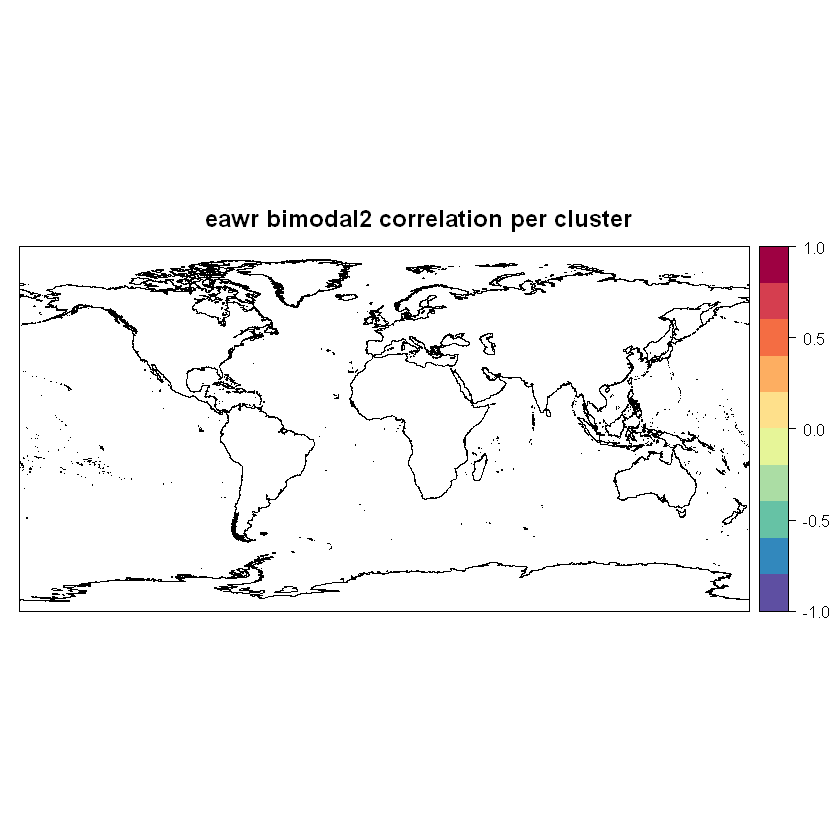

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"Warning message in min(x):
"ningún argumento finito para min; retornando Inf"Warning message in max(x):
"ningun argumento finito para max; retornando -Inf"Warning message in min(x):
"ningún argumento finito para min; retornando Inf"Warning message in max(x):
"ningun argumento finito para max; retornando -Inf"

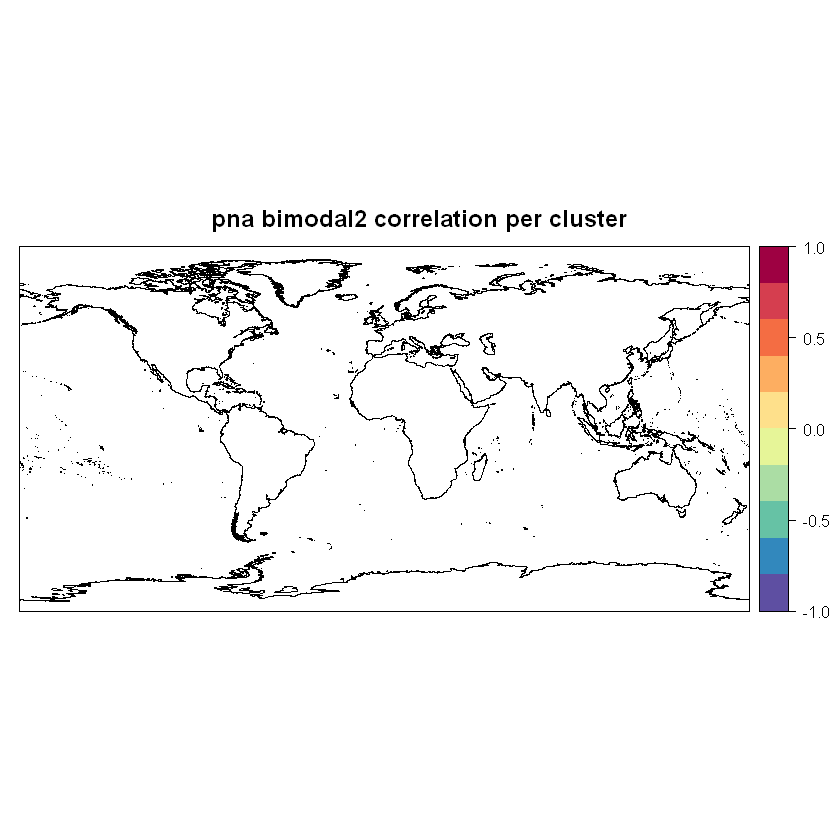

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

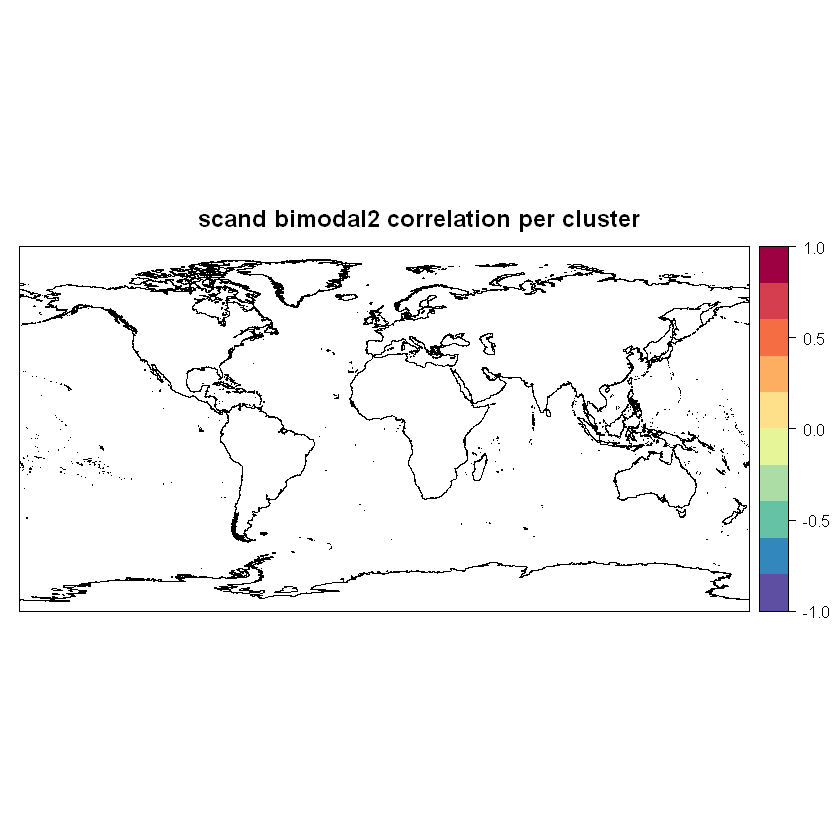

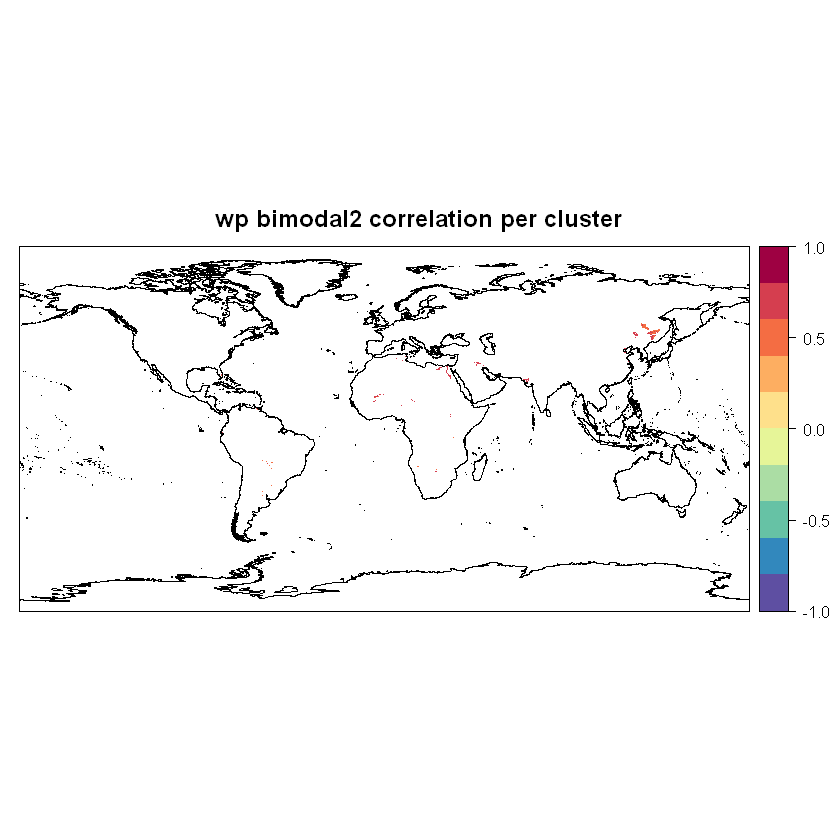

In [14]:
corr.df.2 = masked_coords
mode = 'bimodal2'
corr.df.2 = corr.annual.clus(log1p(masked_ba_series), fireSeason_def_2, masked_coords, dates, nina34, 'nina34', corr.df.2,
                             mode = mode)
corr.df.2 = corr.annual.clus(log1p(masked_ba_series), fireSeason_def_2, masked_coords, dates, nao, 'nao', corr.df.2,
                             mode = mode)
corr.df.2 = corr.annual.clus(log1p(masked_ba_series), fireSeason_def_2, masked_coords, dates, poleur, 'poleur', corr.df.2,
                             mode = mode)
corr.df.2 = corr.annual.clus(log1p(masked_ba_series), fireSeason_def_2, masked_coords, dates, ea, 'ea', corr.df.2, 
                             mode = mode)
corr.df.2 = corr.annual.clus(log1p(masked_ba_series), fireSeason_def_2, masked_coords, dates, eawr, 'eawr', corr.df.2, 
                             mode = mode)
corr.df.2 = corr.annual.clus(log1p(masked_ba_series), fireSeason_def_2, masked_coords, dates, pna, 'pna', corr.df.2,
                             mode = mode)
corr.df.2 = corr.annual.clus(log1p(masked_ba_series), fireSeason_def_2, masked_coords, dates, scand, 'scand', corr.df.2, 
                             mode = mode)
corr.df.2 = corr.annual.clus(log1p(masked_ba_series), fireSeason_def_2, masked_coords, dates, wp, 'wp', corr.df.2, 
                             mode = mode)

#save(corr.df.2, file = 'corrDfAnnualClusBiSeV2.Rdata')

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

Number of pixels correlated with more than  0  indexes  3396 
Number of pixels correlated with more than  1  indexes  0 
Number of pixels correlated with more than  2  indexes  0 
Number of pixels correlated with more than  3  indexes  0 
Number of pixels correlated with more than  4  indexes  0 
Number of pixels correlated with more than  5  indexes  0 
Number of pixels correlated with more than  6  indexes  0 
Number of pixels correlated with more than  7  indexes  0 


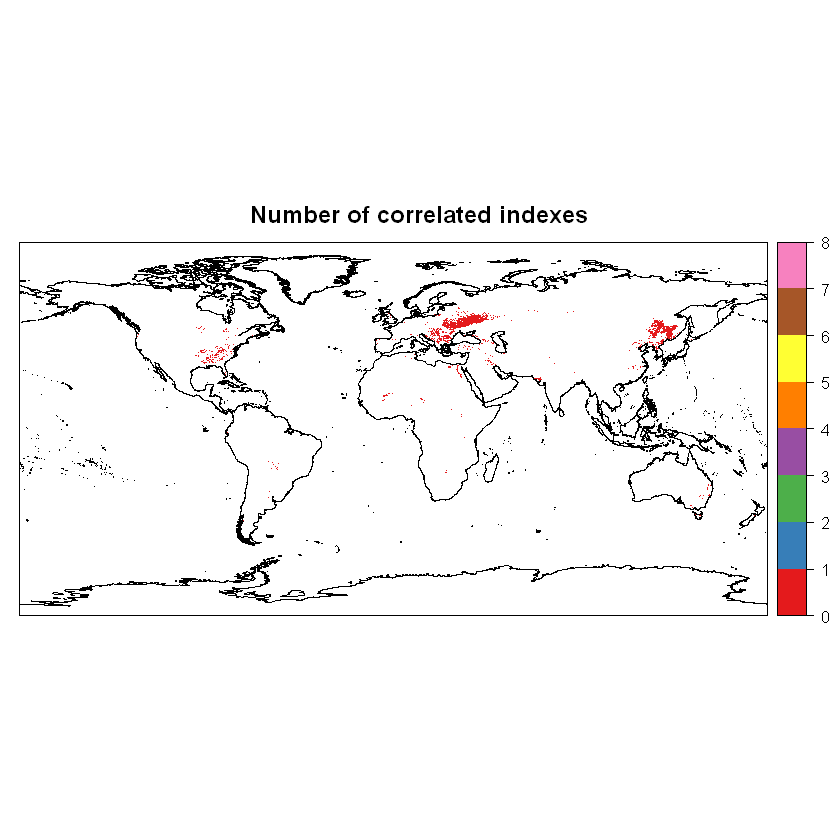

In [15]:
arg.list <- list(col.regions = brewer.pal(8, 'Set1'),
                          at = seq(0, 8, 1), main = 'Number of correlated indexes')

v = cbind(as.numeric(corr.df.2$nao.2.pvalue<0.05), as.numeric(corr.df.2$poleur.2.pvalue<0.05), as.numeric(corr.df.2$ea.2.pvalue<0.05),
          as.numeric(corr.df.2$eawr.2.pvalue<0.05), as.numeric(corr.df.2$pna.2.pvalue<0.05), as.numeric(corr.df.2$nina34.2.pvalue<0.05), 
          as.numeric(corr.df.2$scand.2.pvalue<0.05), as.numeric(corr.df.2$wp.2.pvalue<0.05))

suma = rowSums(v, na.rm=T)
v <- suma
v[which(v < 1)] <- NA

df1 <- cbind.data.frame(masked_coords, v)
coordinates(df1) <- c(1,2)
gridded(df1) <- TRUE
arg.list[["sp.layout"]] <- list("sp.lines", coast.lines)
arg.list[["obj"]] <- df1
arg.list[["zcol"]] <- 1
arg.list[["ylim"]] <- c(-90,90)
arg.list[["xlim"]] <- c(-180,180)
do.call("spplot", arg.list) %>% print()

for (i in 1:8){
    cat('Number of pixels correlated with more than ', i-1, ' indexes ', sum(suma > i-1), '\n')
}

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

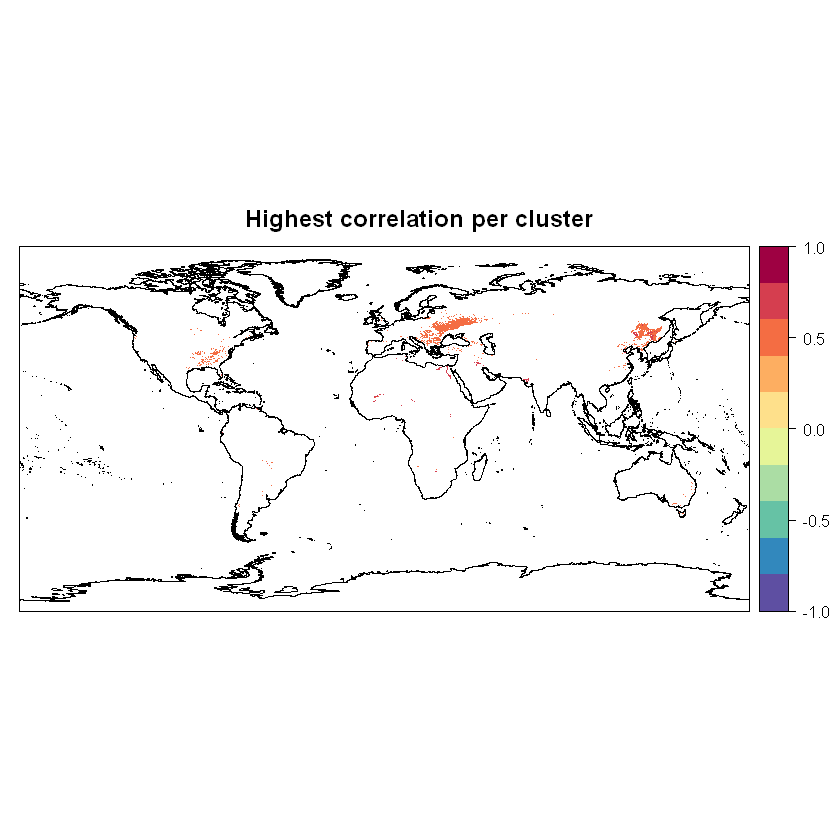

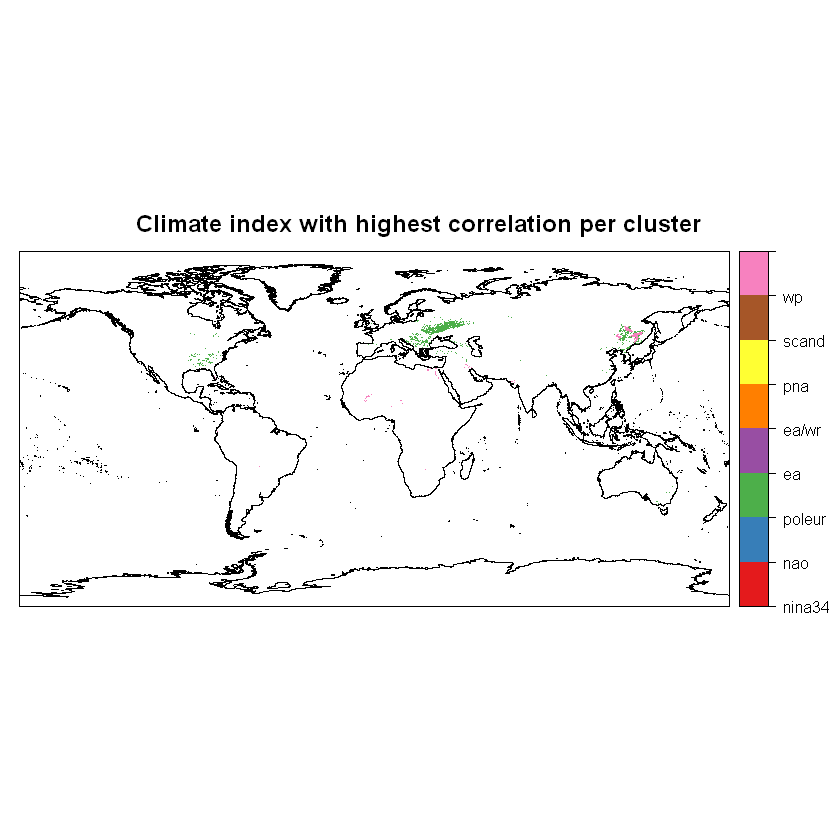

In [16]:
arg.list <- list(col.regions = group.colors[11:1][-6],
                      at = seq(-1, 1, 0.2), main = 'Highest correlation per cluster')

v = apply(corr.df.2, 1, function (x) getMaxCorr(x))

df1 <- cbind.data.frame(masked_coords, v)
coordinates(df1) <- c(1,2)
gridded(df1) <- TRUE
arg.list[["sp.layout"]] <- list("sp.lines", coast.lines)
arg.list[["obj"]] <- df1
arg.list[["zcol"]] <- 1
arg.list[["ylim"]] <- c(-90,90)
arg.list[["xlim"]] <- c(-180,180)
do.call("spplot", arg.list) %>% print()
          

arg.list <- list(col.regions = brewer.pal(8, 'Set1'),
                          at = seq(0, 8, 1), main = 'Climate index with highest correlation per cluster')
v = apply(corr.df.2, 1, function (x) getIndWithMaxCorr(x))

df1 <- cbind.data.frame(masked_coords, v)
coordinates(df1) <- c(1,2)
gridded(df1) <- TRUE
arg.list[["sp.layout"]] <- list("sp.lines", coast.lines)
arg.list[["obj"]] <- df1
arg.list[["colorkey"]] <- list(labels = list(labels = c("nina34", "nao", "poleur", "ea", "ea/wr", "pna", "scand", "wp","")))
arg.list[["zcol"]] <- 1
arg.list[["ylim"]] <- c(-90,90)
arg.list[["xlim"]] <- c(-180,180)
do.call("spplot", arg.list) %>% print()

## With 1-month persistence

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"Warning message in min(x):
"ningún argumento finito para min; retornando Inf"Warning message in max(x):
"ningun argumento finito para max; retornando -Inf"Warning message in min(x):
"ningún argumento finito para min; retornando Inf"Warning message in max(x):
"ningun argumento finito para max; retornando -Inf"Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

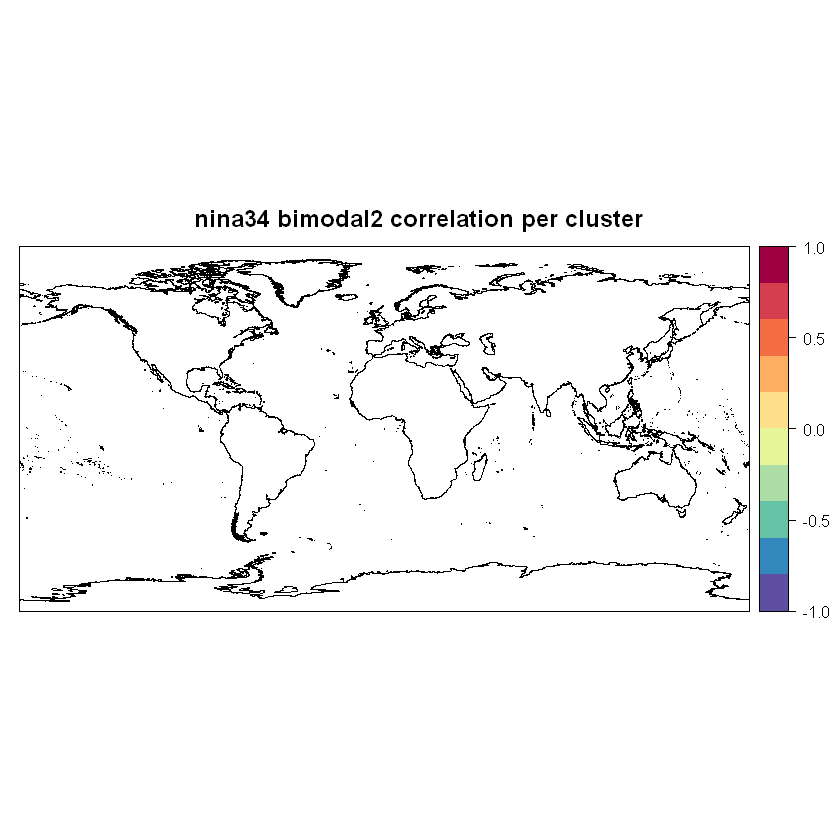

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"Warning message in min(x):
"ningún argumento finito para min; retornando Inf"Warning message in max(x):
"ningun argumento finito para max; retornando -Inf"Warning message in min(x):
"ningún argumento finito para min; retornando Inf"Warning message in max(x):
"ningun argumento finito para max; retornando -Inf"

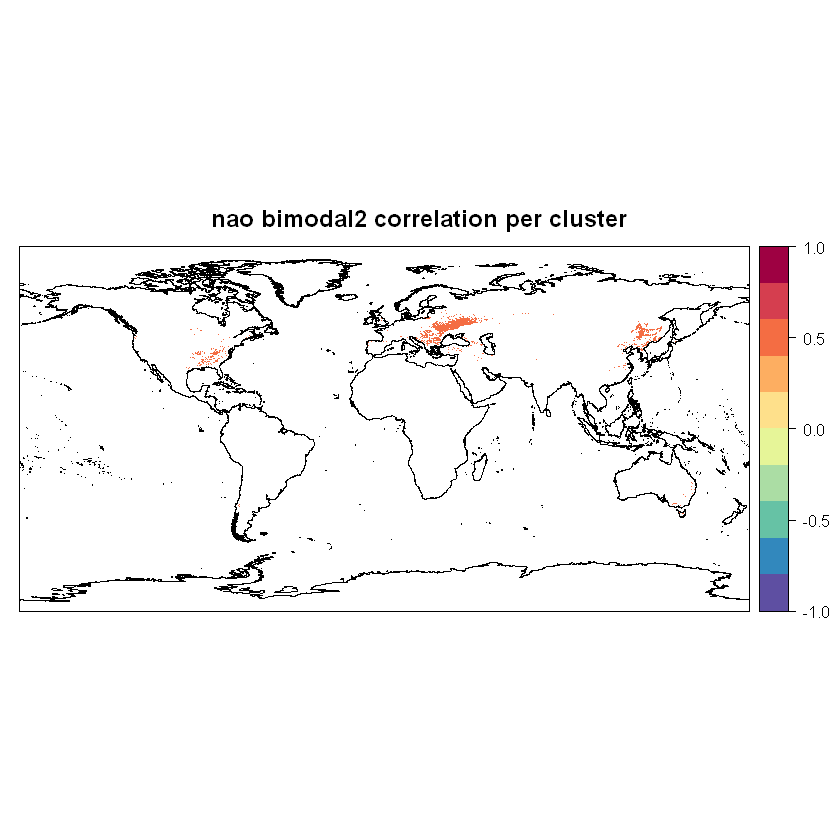

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

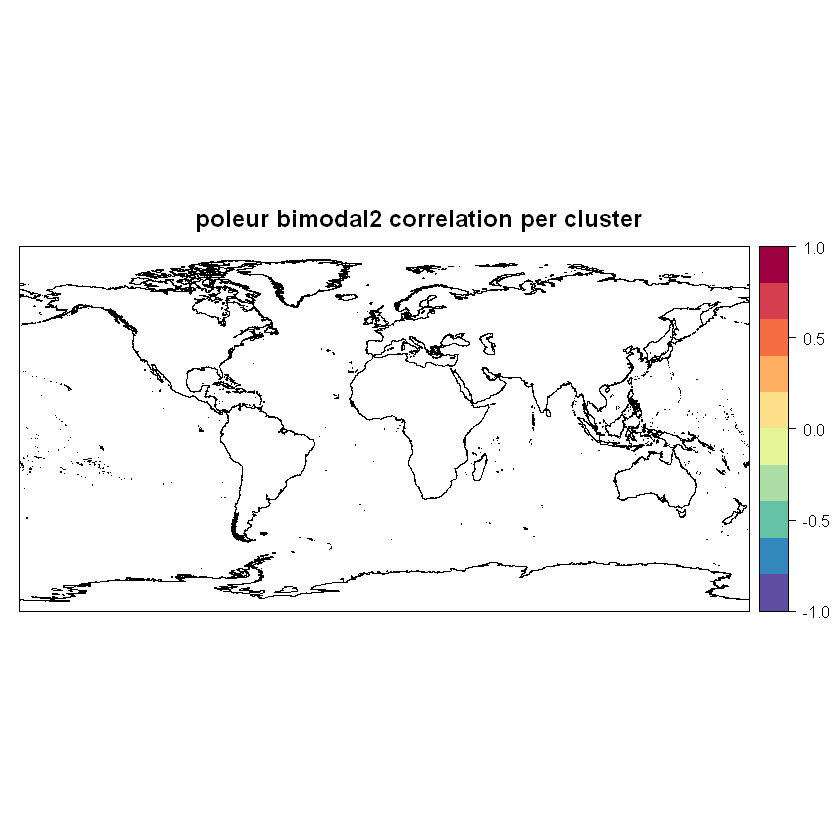

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"Warning message in min(x):
"ningún argumento finito para min; retornando Inf"Warning message in max(x):
"ningun argumento finito para max; retornando -Inf"Warning message in min(x):
"ningún argumento finito para min; retornando Inf"Warning message in max(x):
"ningun argumento finito para max; retornando -Inf"

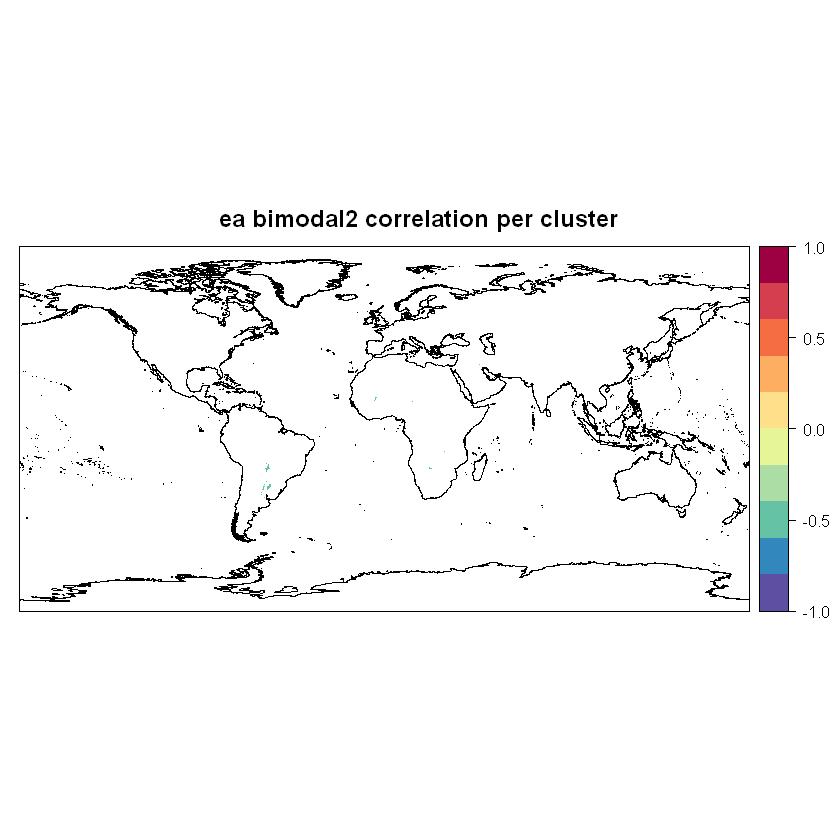

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

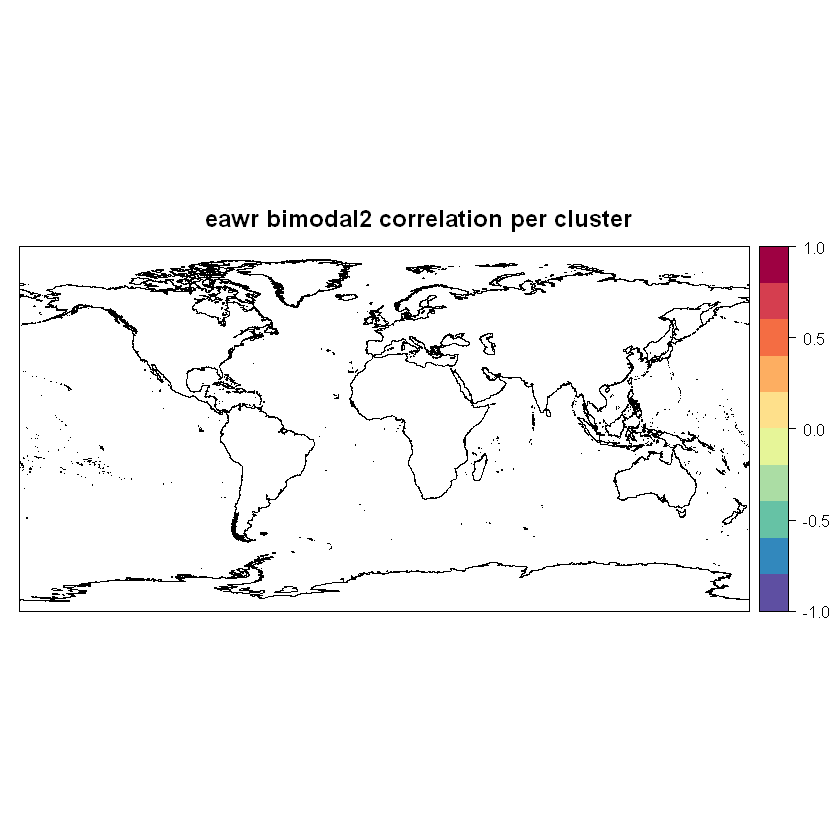

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

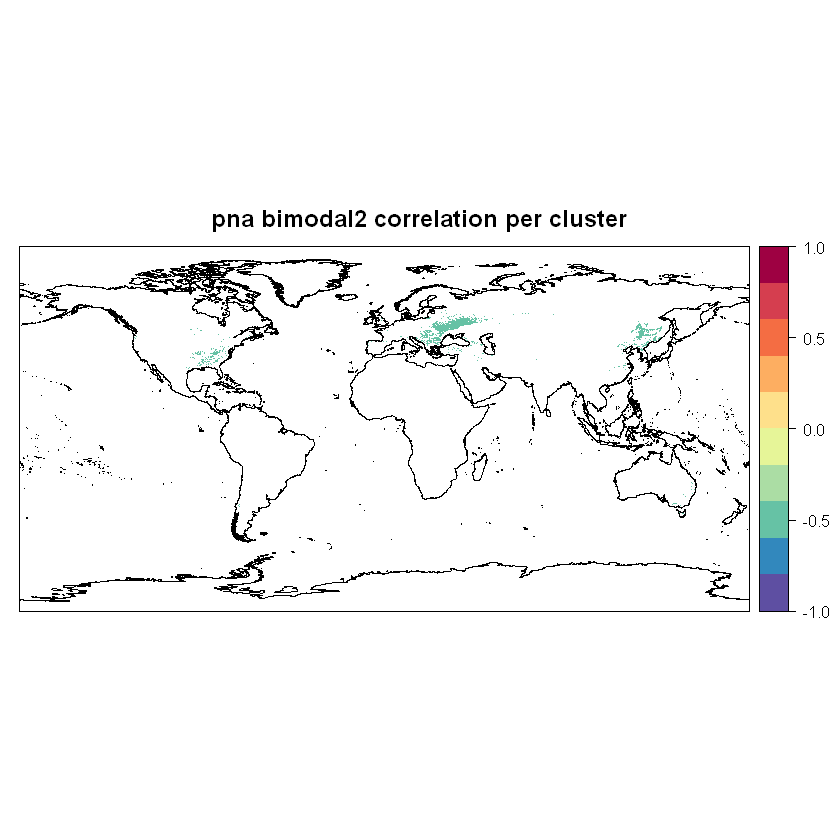

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

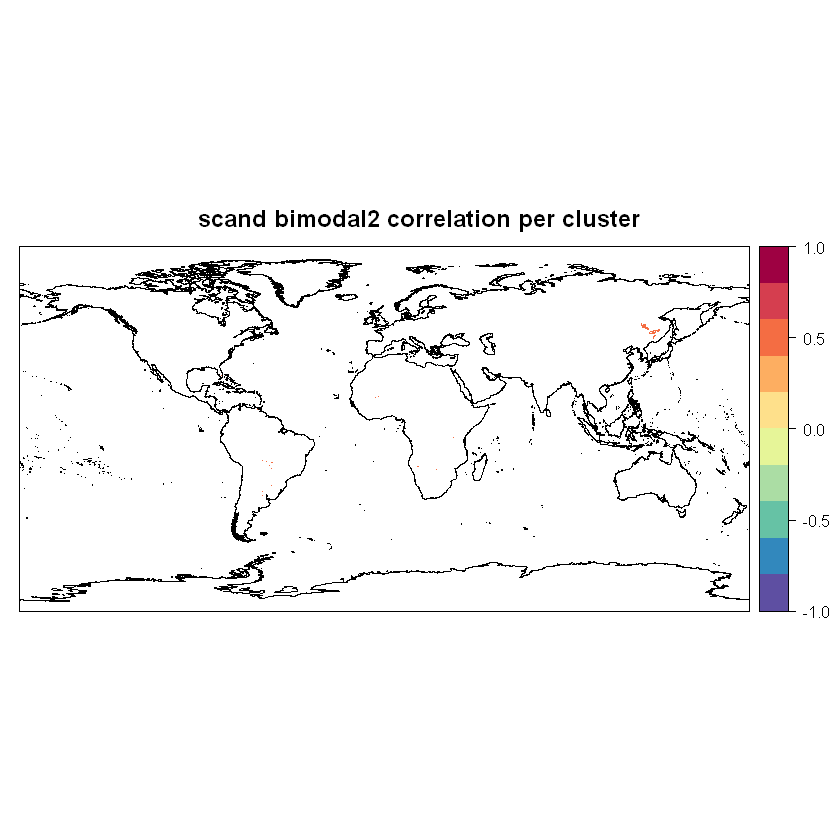

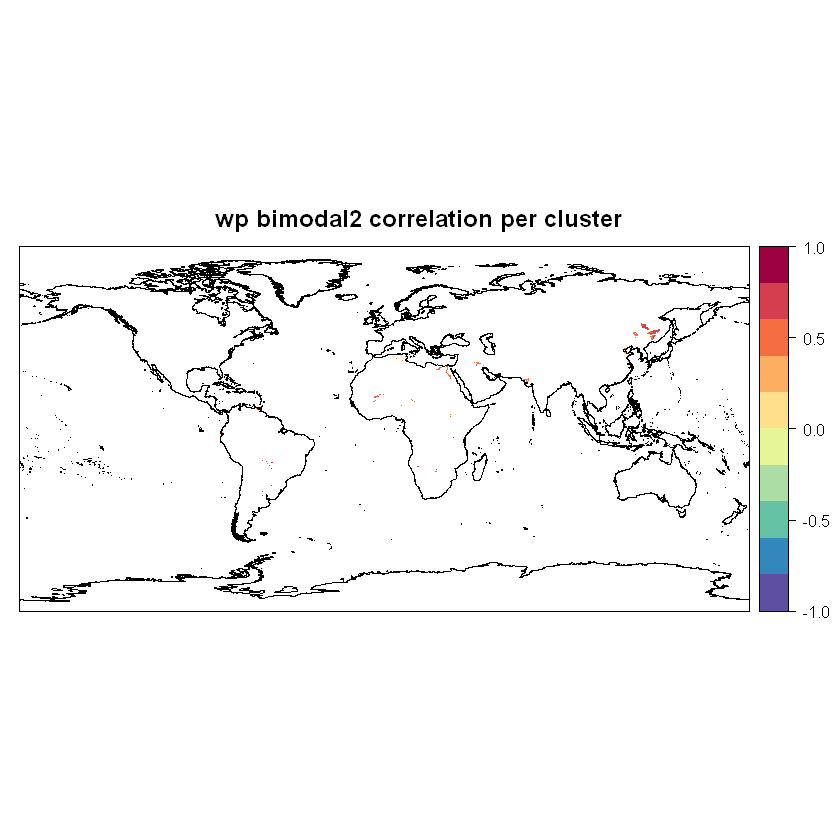

In [17]:
corr.df.2.lag.1 = masked_coords
mode = 'bimodal2'
t = 1
corr.df.2.lag.1 = corr.annual.clus(log1p(masked_ba_series), fireSeason_def_2, masked_coords, dates, nina34, 'nina34',
                                   corr.df.2.lag.1, mode = mode, t = t)
corr.df.2.lag.1 = corr.annual.clus(log1p(masked_ba_series), fireSeason_def_2, masked_coords, dates, nao, 'nao',
                                   corr.df.2.lag.1, mode = mode, t = t)
corr.df.2.lag.1 = corr.annual.clus(log1p(masked_ba_series), fireSeason_def_2, masked_coords, dates, poleur, 'poleur',
                                   corr.df.2.lag.1, mode = mode, t = t)
corr.df.2.lag.1 = corr.annual.clus(log1p(masked_ba_series), fireSeason_def_2, masked_coords, dates, ea, 'ea',
                                   corr.df.2.lag.1, mode = mode, t = t)
corr.df.2.lag.1 = corr.annual.clus(log1p(masked_ba_series), fireSeason_def_2, masked_coords, dates, eawr, 'eawr',
                                   corr.df.2.lag.1, mode = mode, t = t)
corr.df.2.lag.1 = corr.annual.clus(log1p(masked_ba_series), fireSeason_def_2, masked_coords, dates, pna, 'pna', 
                                   corr.df.2.lag.1, mode = mode, t = t)
corr.df.2.lag.1 = corr.annual.clus(log1p(masked_ba_series), fireSeason_def_2, masked_coords, dates, scand, 'scand',
                                   corr.df.2.lag.1, mode = mode, t = t)
corr.df.2.lag.1 = corr.annual.clus(log1p(masked_ba_series), fireSeason_def_2, masked_coords, dates, wp, 'wp', 
                                   corr.df.2.lag.1, mode = mode, t = t)

#save(corr.df.2.lag.1, file = 'corrDfAnnualClusBiSeLag1V2.Rdata')

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

Number of pixels correlated with more than  0  indexes  3527 
Number of pixels correlated with more than  1  indexes  3029 
Number of pixels correlated with more than  2  indexes  0 
Number of pixels correlated with more than  3  indexes  0 
Number of pixels correlated with more than  4  indexes  0 
Number of pixels correlated with more than  5  indexes  0 
Number of pixels correlated with more than  6  indexes  0 
Number of pixels correlated with more than  7  indexes  0 


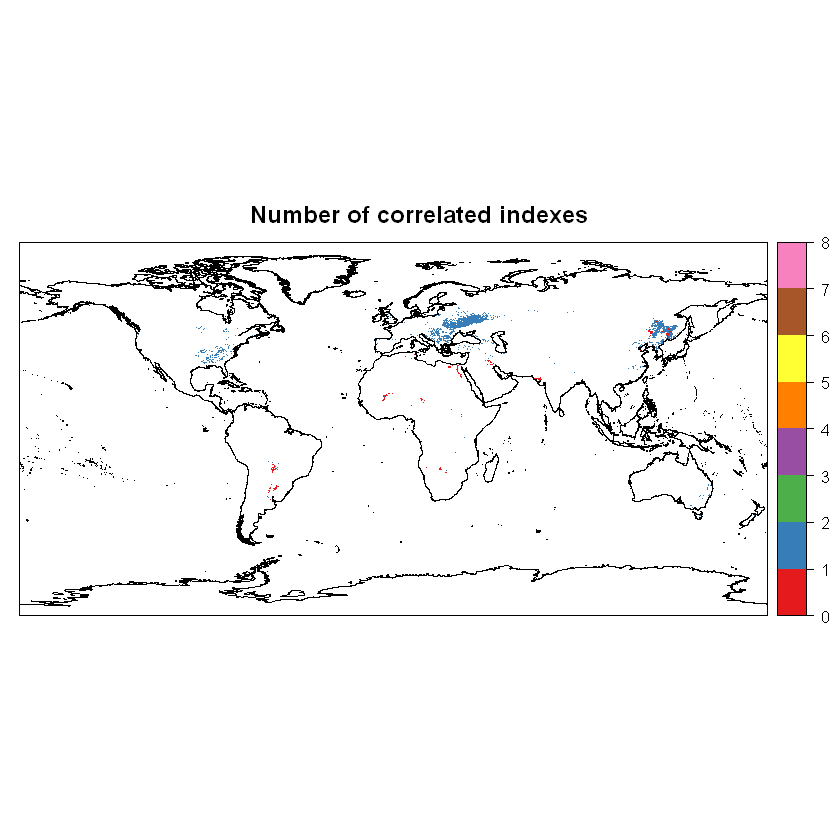

In [18]:
arg.list <- list(col.regions = brewer.pal(8, 'Set1'),
                          at = seq(0, 8, 1), main = 'Number of correlated indexes')

v = cbind(as.numeric(corr.df.2.lag.1$nao.2.pvalue<0.05), as.numeric(corr.df.2.lag.1$poleur.2.pvalue<0.05),
          as.numeric(corr.df.2.lag.1$ea.2.pvalue<0.05),as.numeric(corr.df.2.lag.1$eawr.2.pvalue<0.05),
          as.numeric(corr.df.2.lag.1$pna.2.pvalue<0.05), as.numeric(corr.df.2.lag.1$nina34.2.pvalue<0.05),
          as.numeric(corr.df.2.lag.1$scand.2.pvalue<0.05), as.numeric(corr.df.2.lag.1$wp.2.pvalue<0.05))

suma = rowSums(v, na.rm=T)
v <- suma
v[which(v < 1)] <- NA

df1 <- cbind.data.frame(masked_coords, v)
coordinates(df1) <- c(1,2)
gridded(df1) <- TRUE
arg.list[["sp.layout"]] <- list("sp.lines", coast.lines)
arg.list[["obj"]] <- df1
arg.list[["zcol"]] <- 1
arg.list[["ylim"]] <- c(-90,90)
arg.list[["xlim"]] <- c(-180,180)
do.call("spplot", arg.list) %>% print()

for (i in 1:8){
    cat('Number of pixels correlated with more than ', i-1, ' indexes ', sum(suma > i-1), '\n')
}

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

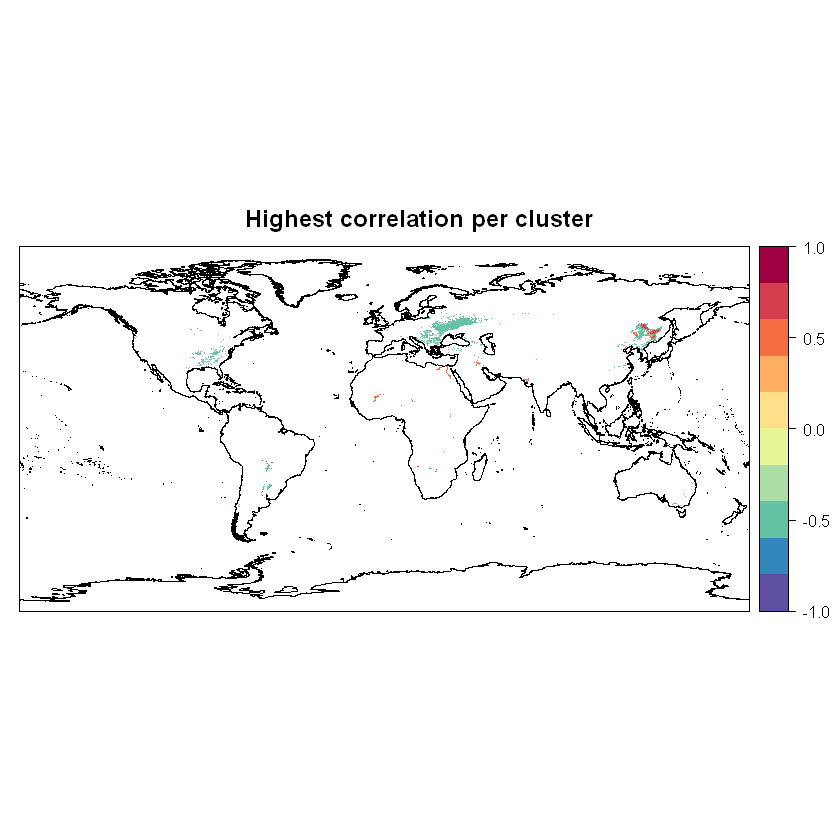

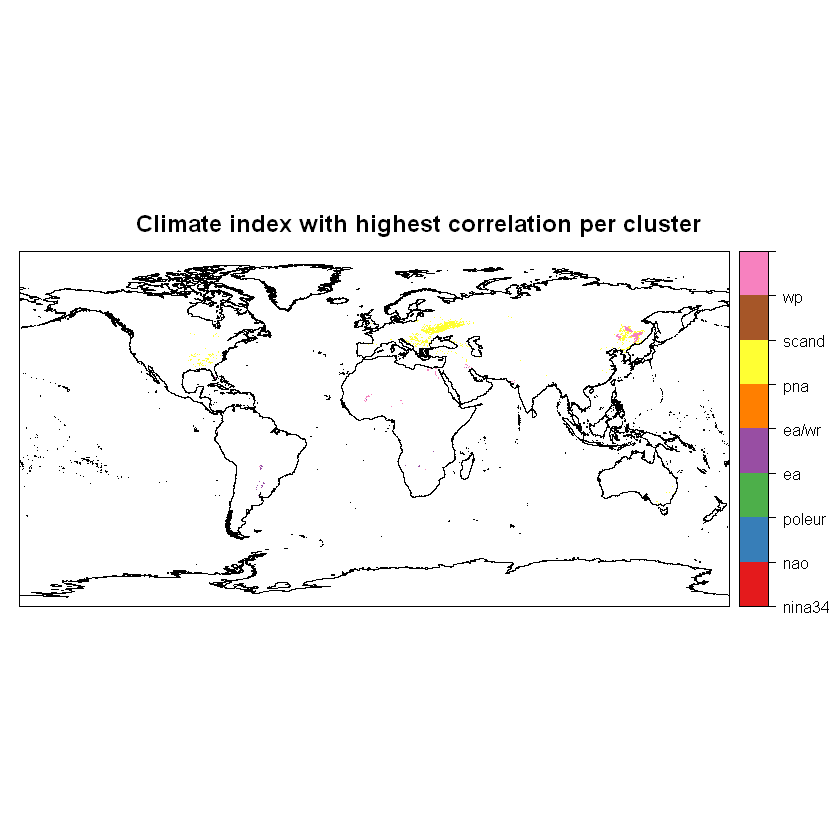

In [19]:
arg.list <- list(col.regions = group.colors[11:1][-6],
                      at = seq(-1, 1, 0.2), main = 'Highest correlation per cluster')

v = apply(corr.df.2.lag.1, 1, function (x) getMaxCorr(x))

df1 <- cbind.data.frame(masked_coords, v)
coordinates(df1) <- c(1,2)
gridded(df1) <- TRUE
arg.list[["sp.layout"]] <- list("sp.lines", coast.lines)
arg.list[["obj"]] <- df1
arg.list[["zcol"]] <- 1
arg.list[["ylim"]] <- c(-90,90)
arg.list[["xlim"]] <- c(-180,180)
do.call("spplot", arg.list) %>% print()
          

arg.list <- list(col.regions = brewer.pal(8, 'Set1'),
                          at = seq(0, 8, 1), main = 'Climate index with highest correlation per cluster')
v = apply(corr.df.2.lag.1, 1, function (x) getIndWithMaxCorr(x))

df1 <- cbind.data.frame(masked_coords, v)
coordinates(df1) <- c(1,2)
gridded(df1) <- TRUE
arg.list[["sp.layout"]] <- list("sp.lines", coast.lines)
arg.list[["obj"]] <- df1
arg.list[["colorkey"]] <- list(labels = list(labels = c("nina34", "nao", "poleur", "ea", "ea/wr", "pna", "scand", "wp","")))
arg.list[["zcol"]] <- 1
arg.list[["ylim"]] <- c(-90,90)
arg.list[["xlim"]] <- c(-180,180)
do.call("spplot", arg.list) %>% print()

## With 2-months persistence

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"Warning message in min(x):
"ningún argumento finito para min; retornando Inf"Warning message in max(x):
"ningun argumento finito para max; retornando -Inf"Warning message in min(x):
"ningún argumento finito para min; retornando Inf"Warning message in max(x):
"ningun argumento finito para max; retornando -Inf"Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

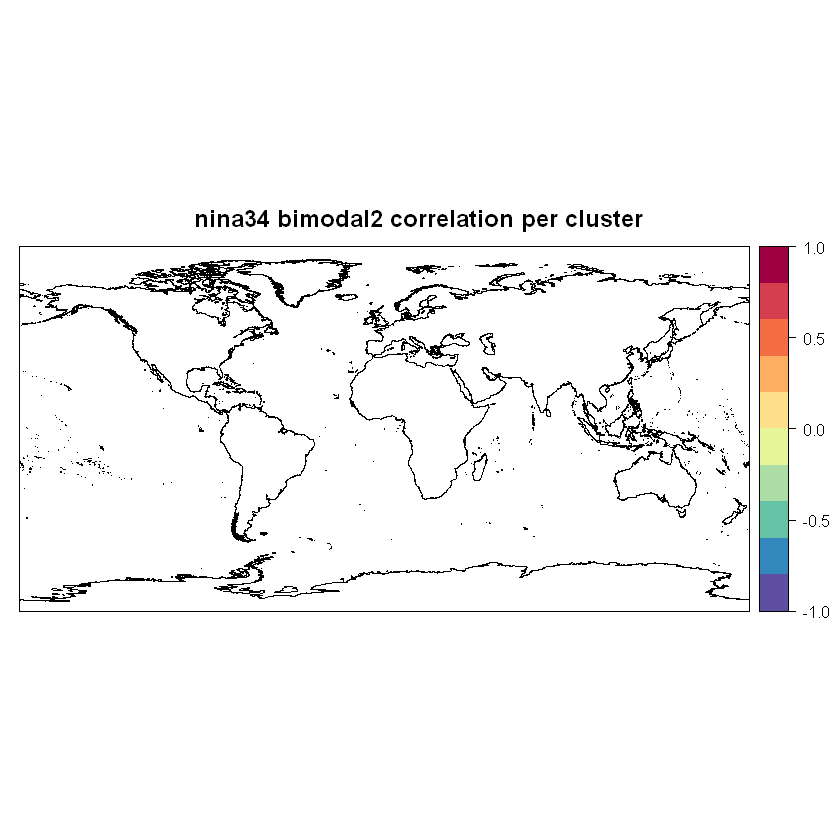

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"Warning message in min(x):
"ningún argumento finito para min; retornando Inf"Warning message in max(x):
"ningun argumento finito para max; retornando -Inf"Warning message in min(x):
"ningún argumento finito para min; retornando Inf"Warning message in max(x):
"ningun argumento finito para max; retornando -Inf"

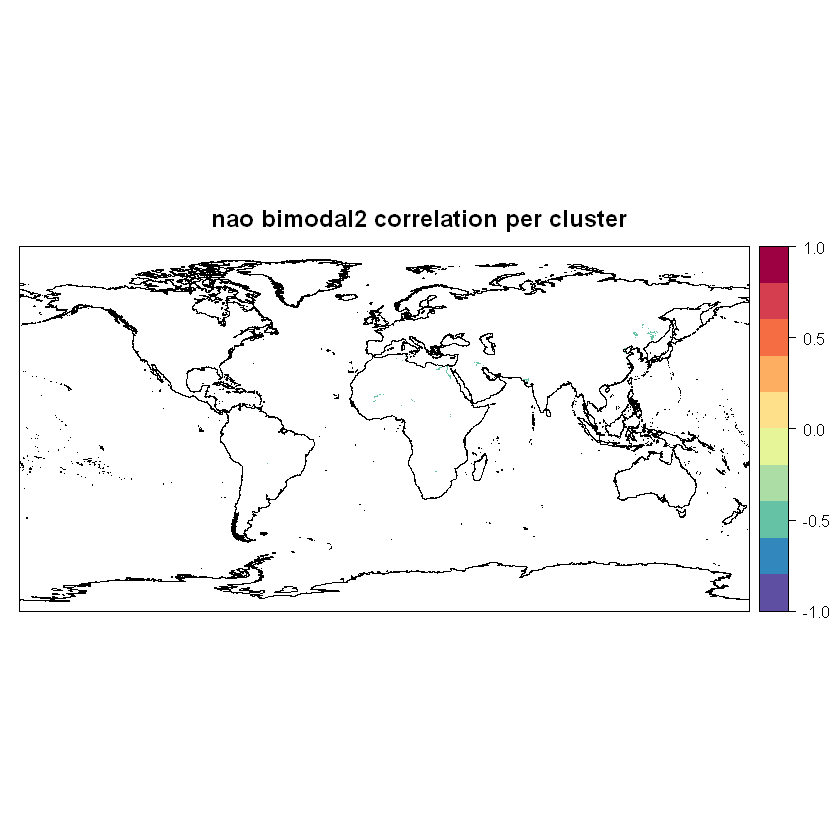

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"Warning message in min(x):
"ningún argumento finito para min; retornando Inf"Warning message in max(x):
"ningun argumento finito para max; retornando -Inf"Warning message in min(x):
"ningún argumento finito para min; retornando Inf"Warning message in max(x):
"ningun argumento finito para max; retornando -Inf"

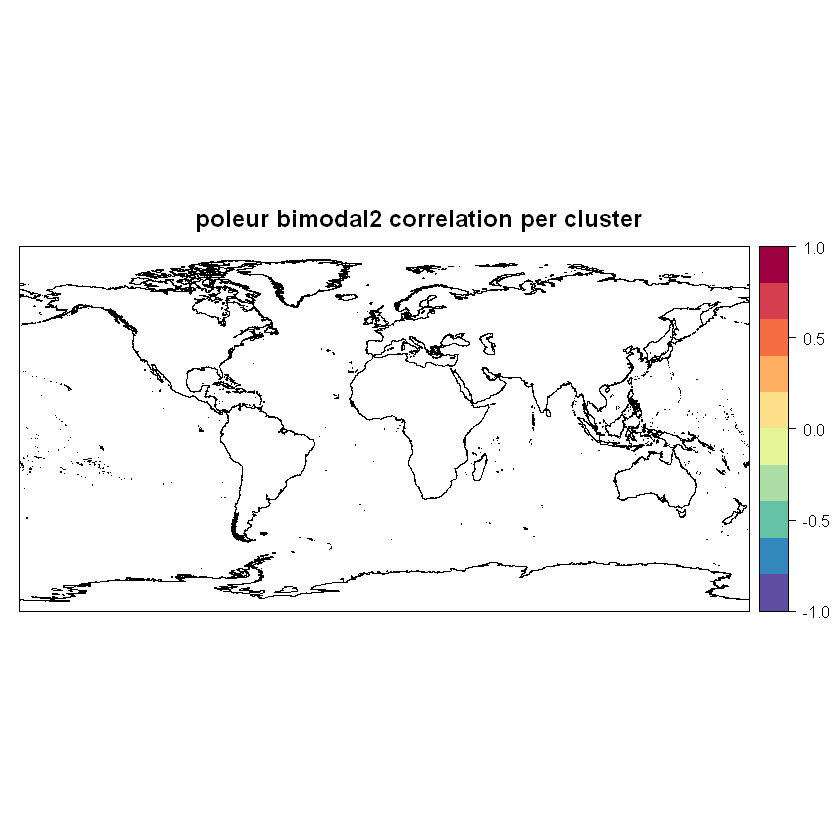

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"Warning message in min(x):
"ningún argumento finito para min; retornando Inf"Warning message in max(x):
"ningun argumento finito para max; retornando -Inf"Warning message in min(x):
"ningún argumento finito para min; retornando Inf"Warning message in max(x):
"ningun argumento finito para max; retornando -Inf"

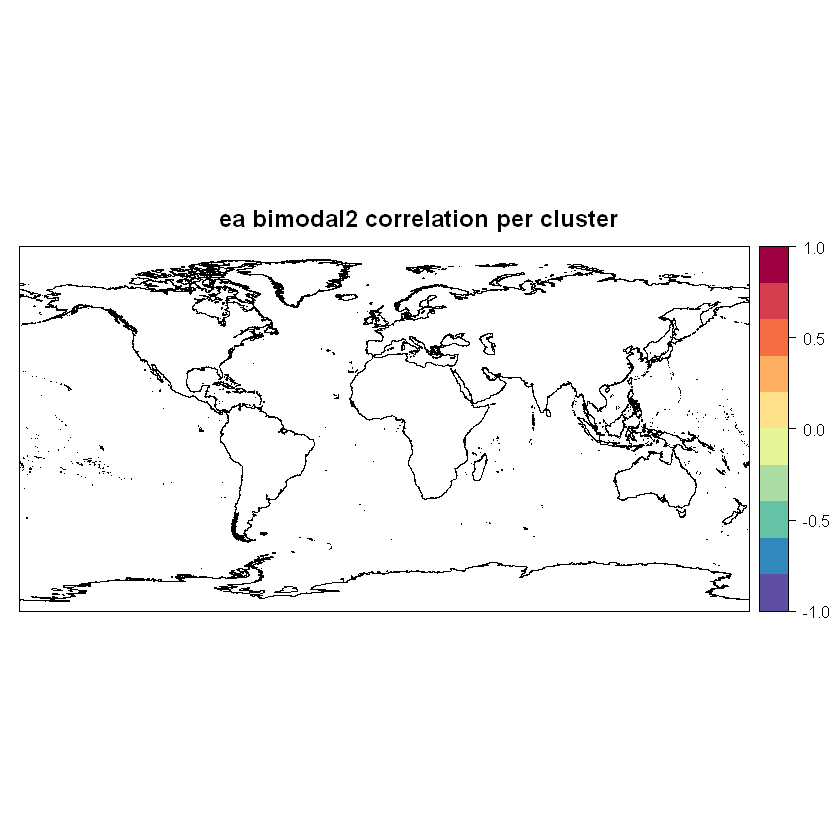

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"Warning message in min(x):
"ningún argumento finito para min; retornando Inf"Warning message in max(x):
"ningun argumento finito para max; retornando -Inf"Warning message in min(x):
"ningún argumento finito para min; retornando Inf"Warning message in max(x):
"ningun argumento finito para max; retornando -Inf"

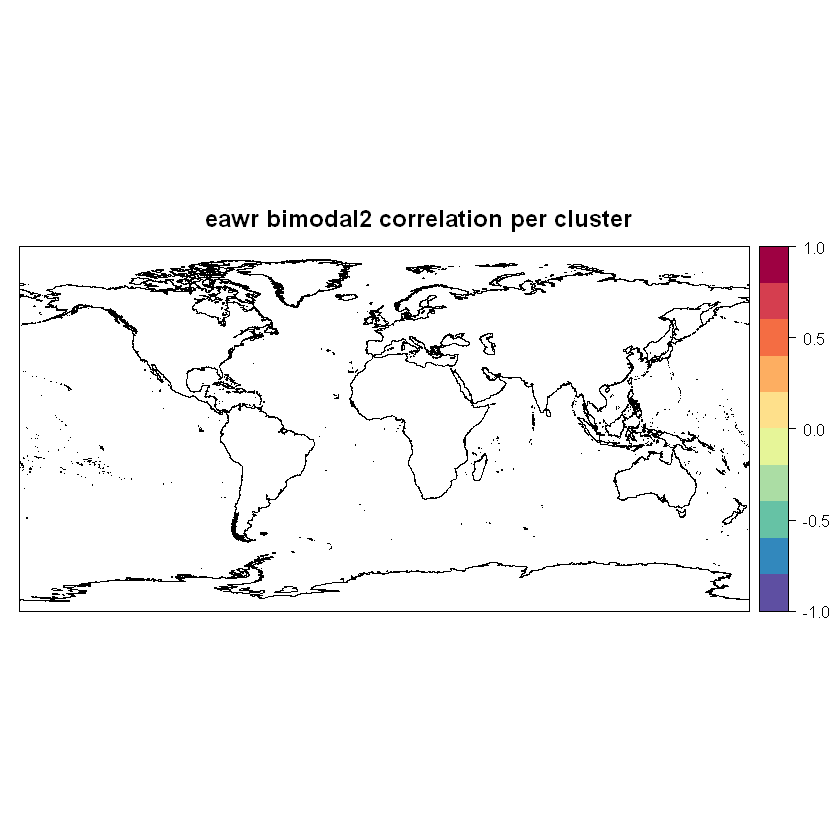

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

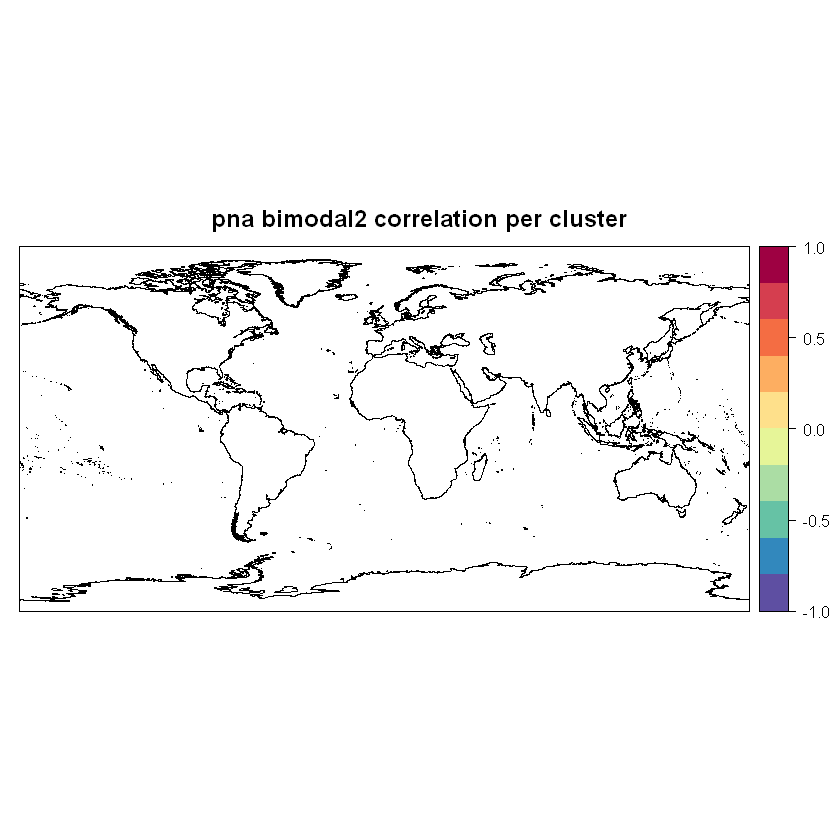

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

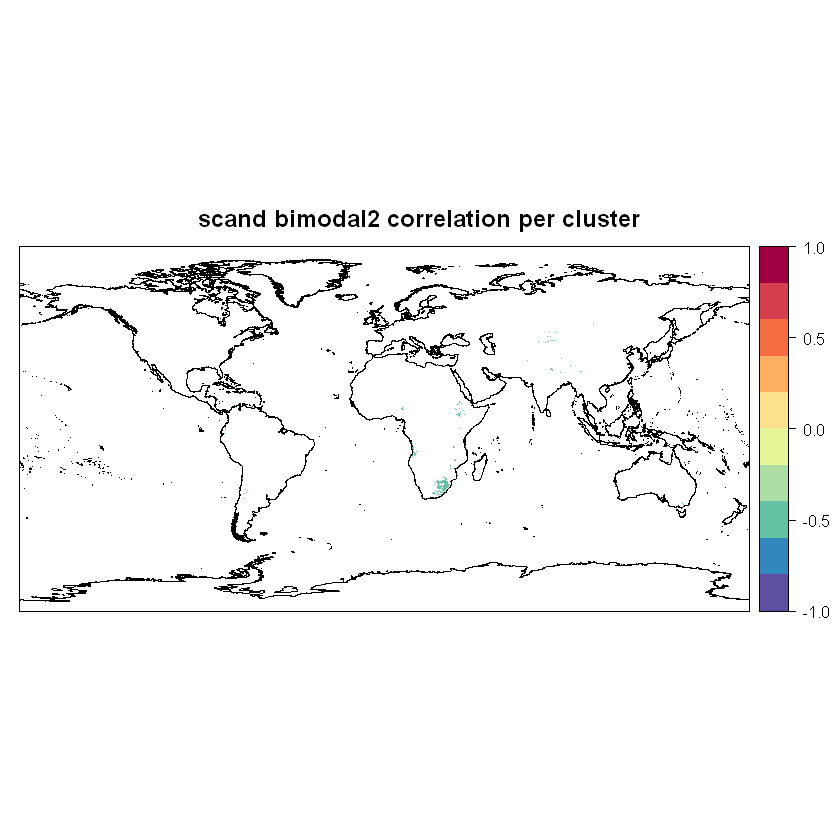

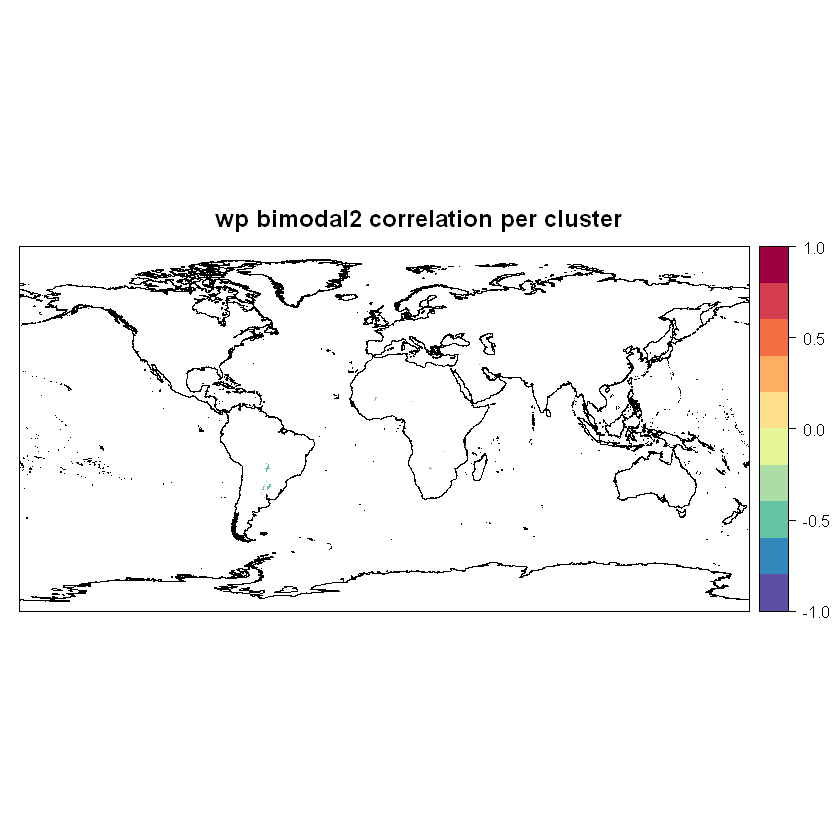

In [20]:
corr.df.2.lag.2 = masked_coords
mode = 'bimodal2'
t = 2
corr.df.2.lag.2 = corr.annual.clus(log1p(masked_ba_series), fireSeason_def_2, masked_coords, dates, nina34, 'nina34',
                                   corr.df.2.lag.2, mode = mode, t = t)
corr.df.2.lag.2 = corr.annual.clus(log1p(masked_ba_series), fireSeason_def_2, masked_coords, dates, nao, 'nao',
                                   corr.df.2.lag.2, mode = mode, t = t)
corr.df.2.lag.2 = corr.annual.clus(log1p(masked_ba_series), fireSeason_def_2, masked_coords, dates, poleur, 'poleur',
                                   corr.df.2.lag.2, mode = mode, t = t)
corr.df.2.lag.2 = corr.annual.clus(log1p(masked_ba_series), fireSeason_def_2, masked_coords, dates, ea, 'ea',
                                   corr.df.2.lag.2, mode = mode, t = t)
corr.df.2.lag.2 = corr.annual.clus(log1p(masked_ba_series), fireSeason_def_2, masked_coords, dates, eawr, 'eawr',
                                   corr.df.2.lag.2, mode = mode, t = t)
corr.df.2.lag.2 = corr.annual.clus(log1p(masked_ba_series), fireSeason_def_2, masked_coords, dates, pna, 'pna', 
                                   corr.df.2.lag.2, mode = mode, t = t)
corr.df.2.lag.2 = corr.annual.clus(log1p(masked_ba_series), fireSeason_def_2, masked_coords, dates, scand, 'scand',
                                   corr.df.2.lag.2, mode = mode, t = t)
corr.df.2.lag.2 = corr.annual.clus(log1p(masked_ba_series), fireSeason_def_2, masked_coords, dates, wp, 'wp', 
                                   corr.df.2.lag.2, mode = mode, t = t)

#save(corr.df.2.lag.2, file = 'corrDfAnnualClusBiSeLag2V2.Rdata')

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

Number of pixels correlated with more than  0  indexes  1135 
Number of pixels correlated with more than  1  indexes  0 
Number of pixels correlated with more than  2  indexes  0 
Number of pixels correlated with more than  3  indexes  0 
Number of pixels correlated with more than  4  indexes  0 
Number of pixels correlated with more than  5  indexes  0 
Number of pixels correlated with more than  6  indexes  0 
Number of pixels correlated with more than  7  indexes  0 


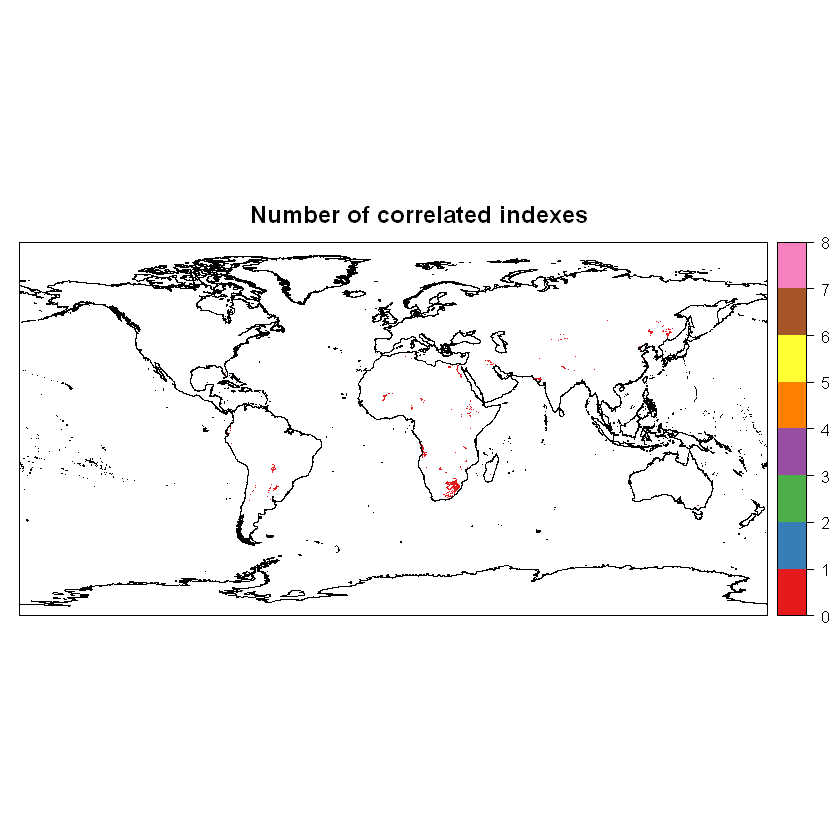

In [21]:
arg.list <- list(col.regions = brewer.pal(8, 'Set1'),
                          at = seq(0, 8, 1), main = 'Number of correlated indexes')

v = cbind(as.numeric(corr.df.2.lag.2$nao.2.pvalue<0.05), as.numeric(corr.df.2.lag.2$poleur.2.pvalue<0.05),
          as.numeric(corr.df.2.lag.2$ea.2.pvalue<0.05),as.numeric(corr.df.2.lag.2$eawr.2.pvalue<0.05),
          as.numeric(corr.df.2.lag.2$pna.2.pvalue<0.05), as.numeric(corr.df.2.lag.2$nina34.2.pvalue<0.05),
          as.numeric(corr.df.2.lag.2$scand.2.pvalue<0.05), as.numeric(corr.df.2.lag.2$wp.2.pvalue<0.05))

suma = rowSums(v, na.rm=T)
v <- suma
v[which(v < 1)] <- NA

df1 <- cbind.data.frame(masked_coords, v)
coordinates(df1) <- c(1,2)
gridded(df1) <- TRUE
arg.list[["sp.layout"]] <- list("sp.lines", coast.lines)
arg.list[["obj"]] <- df1
arg.list[["zcol"]] <- 1
arg.list[["ylim"]] <- c(-90,90)
arg.list[["xlim"]] <- c(-180,180)
do.call("spplot", arg.list) %>% print()

for (i in 1:8){
    cat('Number of pixels correlated with more than ', i-1, ' indexes ', sum(suma > i-1), '\n')
}

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

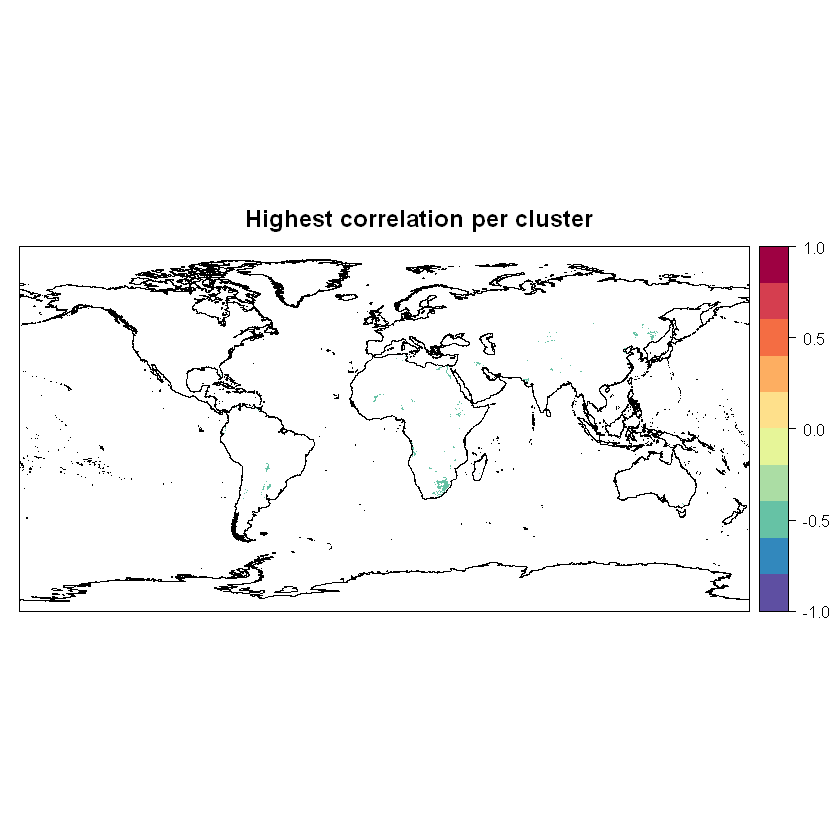

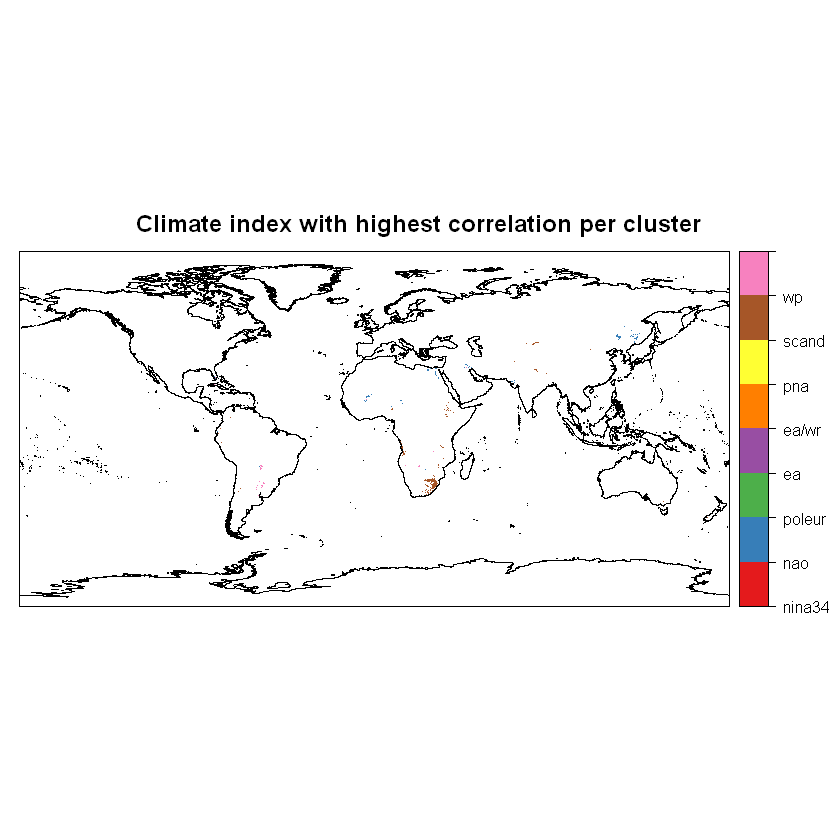

In [22]:
arg.list <- list(col.regions = group.colors[11:1][-6],
                      at = seq(-1, 1, 0.2), main = 'Highest correlation per cluster')

v = apply(corr.df.2.lag.2, 1, function (x) getMaxCorr(x))

df1 <- cbind.data.frame(masked_coords, v)
coordinates(df1) <- c(1,2)
gridded(df1) <- TRUE
arg.list[["sp.layout"]] <- list("sp.lines", coast.lines)
arg.list[["obj"]] <- df1
arg.list[["zcol"]] <- 1
arg.list[["ylim"]] <- c(-90,90)
arg.list[["xlim"]] <- c(-180,180)
do.call("spplot", arg.list) %>% print()
          

arg.list <- list(col.regions = brewer.pal(8, 'Set1'),
                          at = seq(0, 8, 1), main = 'Climate index with highest correlation per cluster')
v = apply(corr.df.2.lag.2, 1, function (x) getIndWithMaxCorr(x))

df1 <- cbind.data.frame(masked_coords, v)
coordinates(df1) <- c(1,2)
gridded(df1) <- TRUE
arg.list[["sp.layout"]] <- list("sp.lines", coast.lines)
arg.list[["obj"]] <- df1
arg.list[["colorkey"]] <- list(labels = list(labels = c("nina34", "nao", "poleur", "ea", "ea/wr", "pna", "scand", "wp","")))
arg.list[["zcol"]] <- 1
arg.list[["ylim"]] <- c(-90,90)
arg.list[["xlim"]] <- c(-180,180)
do.call("spplot", arg.list) %>% print()

## With 3-months persistence

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"Warning message in min(x):
"ningún argumento finito para min; retornando Inf"Warning message in max(x):
"ningun argumento finito para max; retornando -Inf"Warning message in min(x):
"ningún argumento finito para min; retornando Inf"Warning message in max(x):
"ningun argumento finito para max; retornando -Inf"Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

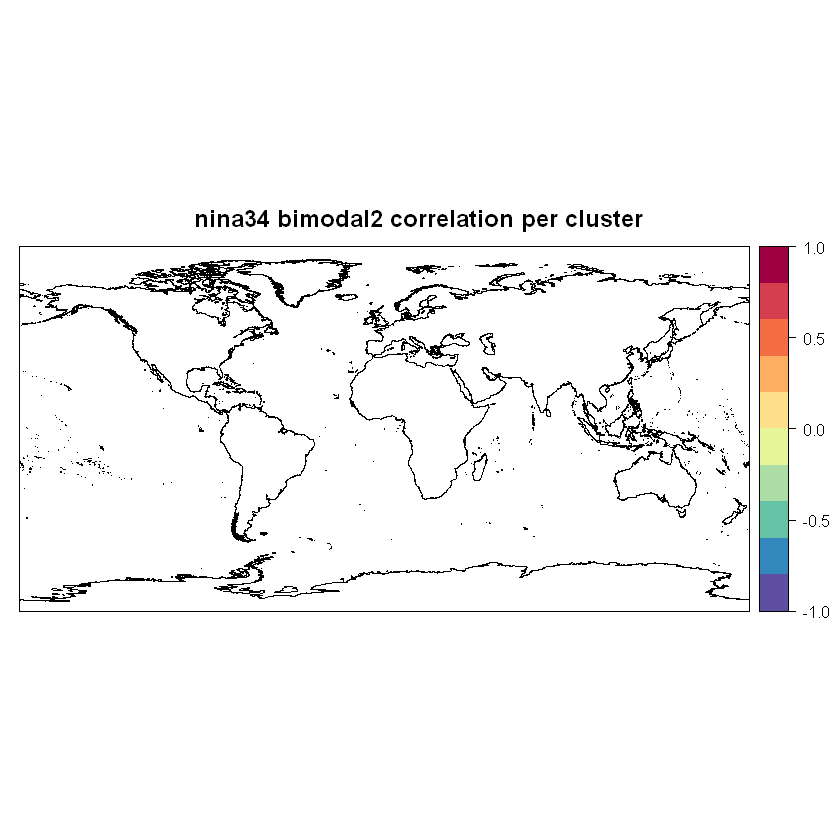

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"Warning message in min(x):
"ningún argumento finito para min; retornando Inf"Warning message in max(x):
"ningun argumento finito para max; retornando -Inf"Warning message in min(x):
"ningún argumento finito para min; retornando Inf"Warning message in max(x):
"ningun argumento finito para max; retornando -Inf"

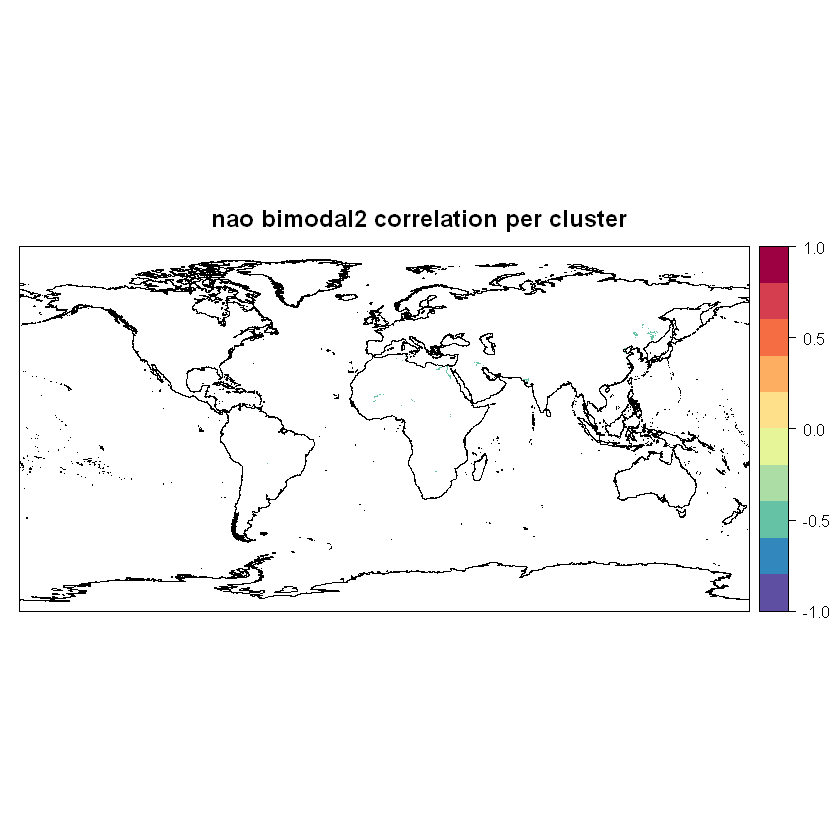

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"Warning message in min(x):
"ningún argumento finito para min; retornando Inf"Warning message in max(x):
"ningun argumento finito para max; retornando -Inf"Warning message in min(x):
"ningún argumento finito para min; retornando Inf"Warning message in max(x):
"ningun argumento finito para max; retornando -Inf"

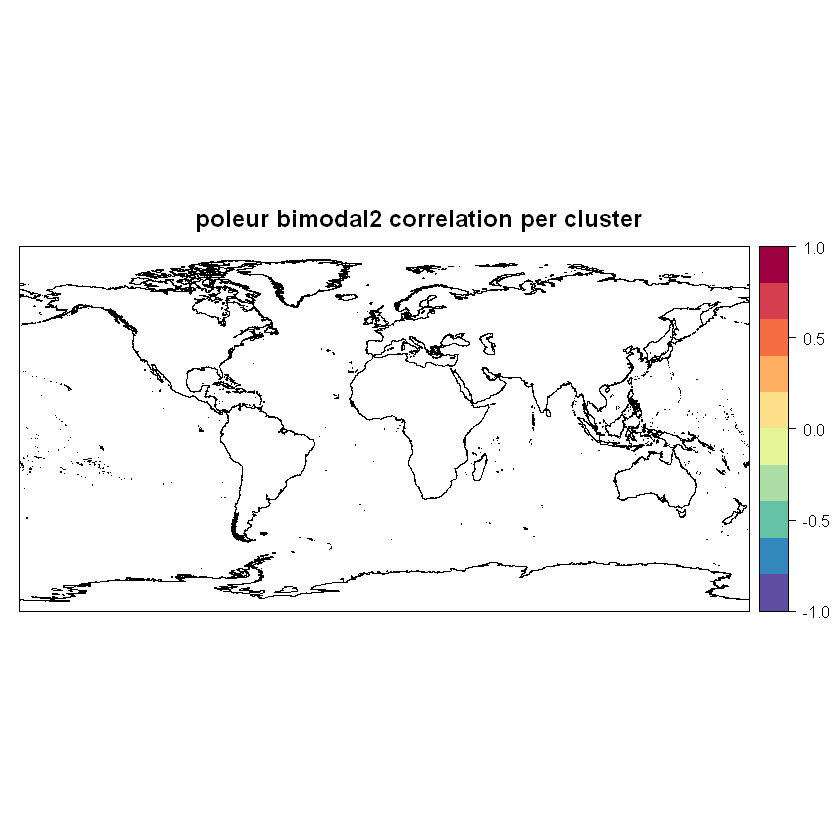

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"Warning message in min(x):
"ningún argumento finito para min; retornando Inf"Warning message in max(x):
"ningun argumento finito para max; retornando -Inf"Warning message in min(x):
"ningún argumento finito para min; retornando Inf"Warning message in max(x):
"ningun argumento finito para max; retornando -Inf"

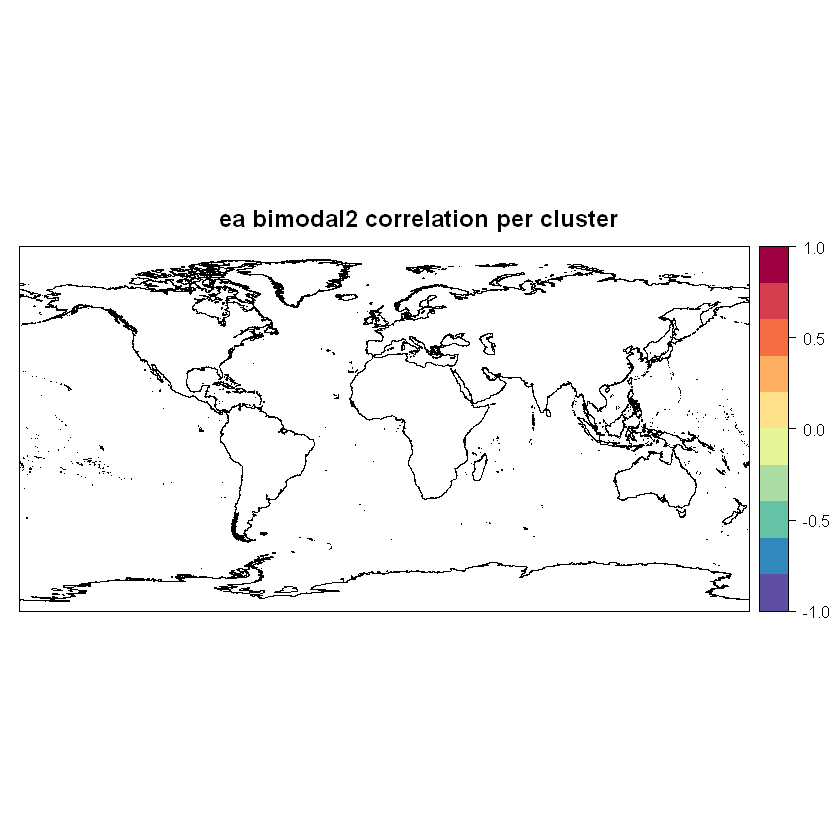

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"Warning message in min(x):
"ningún argumento finito para min; retornando Inf"Warning message in max(x):
"ningun argumento finito para max; retornando -Inf"Warning message in min(x):
"ningún argumento finito para min; retornando Inf"Warning message in max(x):
"ningun argumento finito para max; retornando -Inf"

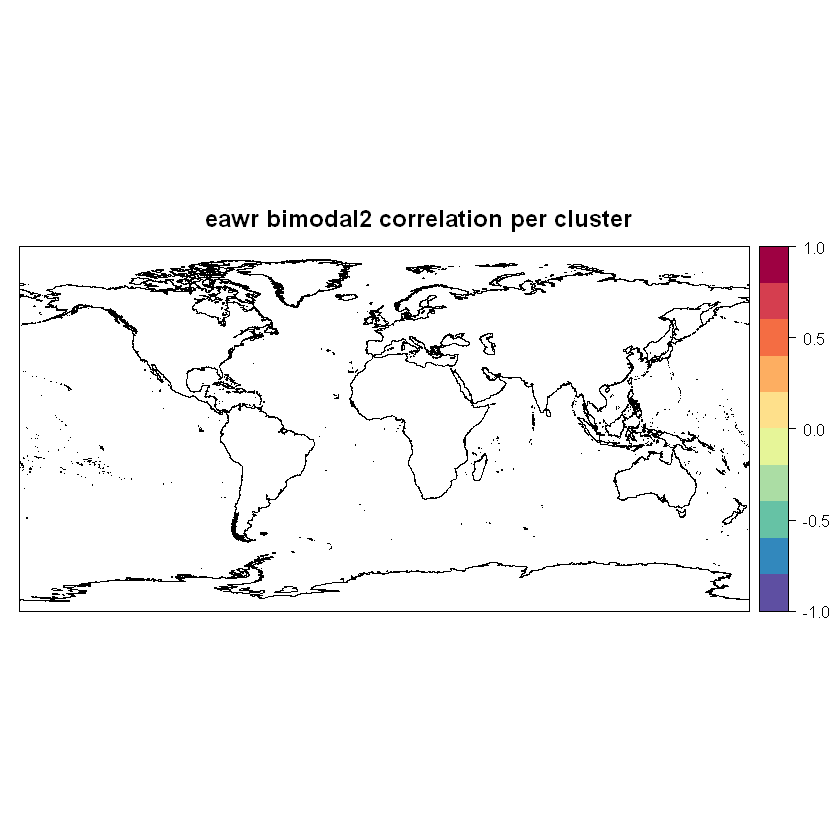

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"Warning message in min(x):
"ningún argumento finito para min; retornando Inf"Warning message in max(x):
"ningun argumento finito para max; retornando -Inf"Warning message in min(x):
"ningún argumento finito para min; retornando Inf"Warning message in max(x):
"ningun argumento finito para max; retornando -Inf"

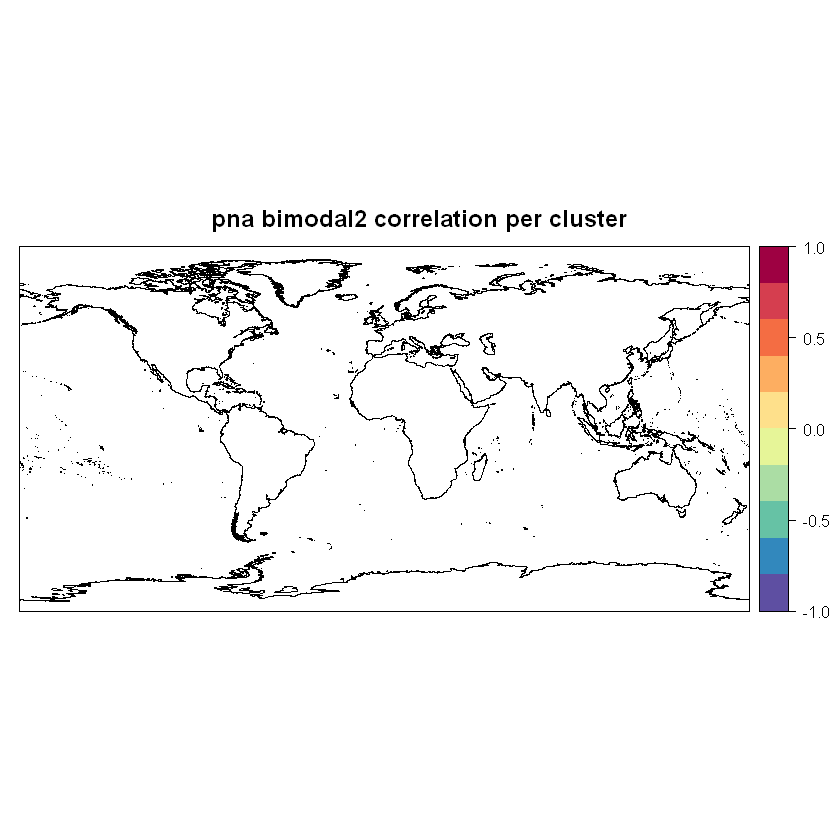

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

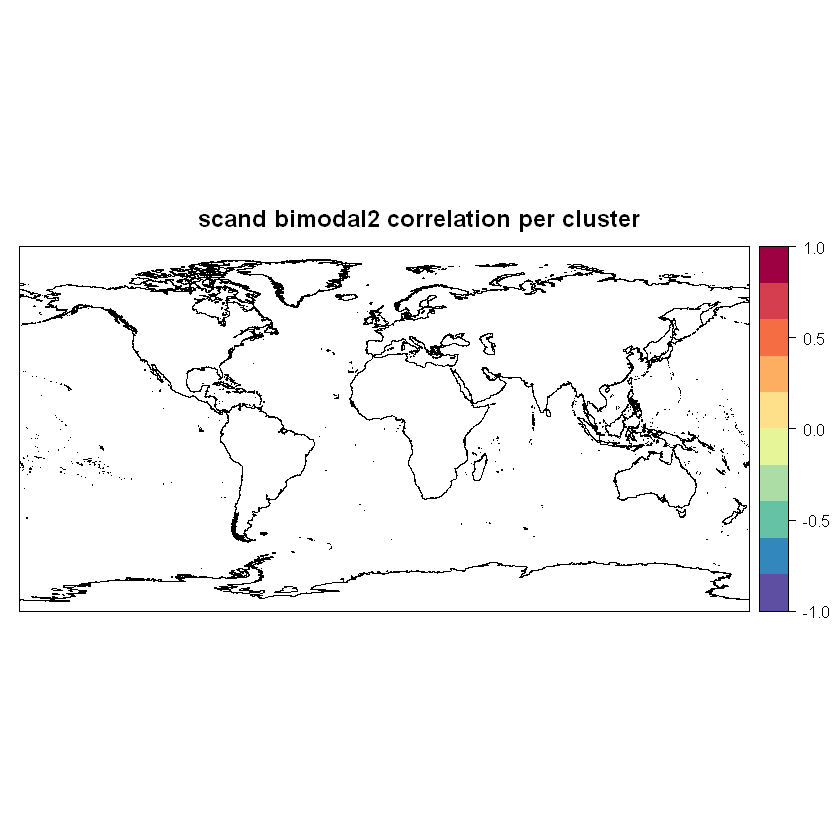

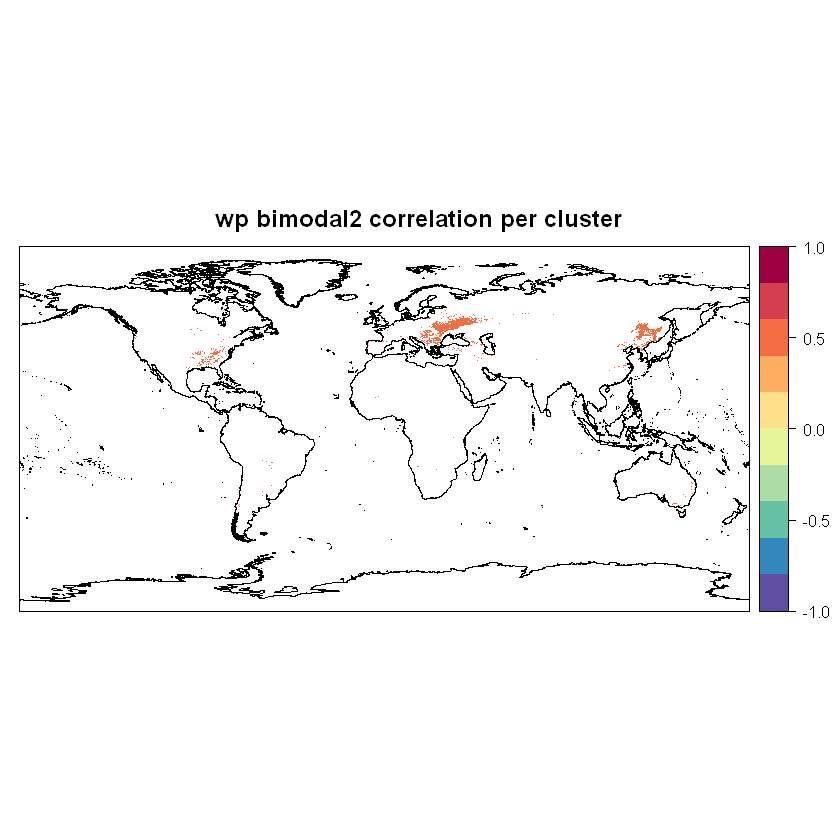

In [23]:
corr.df.2.lag.3 = masked_coords
mode = 'bimodal2'
t = 3
corr.df.2.lag.3 = corr.annual.clus(log1p(masked_ba_series), fireSeason_def_2, masked_coords, dates, nina34, 'nina34',
                                   corr.df.2.lag.3, mode = mode, t = t)
corr.df.2.lag.3 = corr.annual.clus(log1p(masked_ba_series), fireSeason_def_2, masked_coords, dates, nao, 'nao',
                                   corr.df.2.lag.3, mode = mode, t = t)
corr.df.2.lag.3 = corr.annual.clus(log1p(masked_ba_series), fireSeason_def_2, masked_coords, dates, poleur, 'poleur',
                                   corr.df.2.lag.3, mode = mode, t = t)
corr.df.2.lag.3 = corr.annual.clus(log1p(masked_ba_series), fireSeason_def_2, masked_coords, dates, ea, 'ea',
                                   corr.df.2.lag.3, mode = mode, t = t)
corr.df.2.lag.3 = corr.annual.clus(log1p(masked_ba_series), fireSeason_def_2, masked_coords, dates, eawr, 'eawr',
                                   corr.df.2.lag.3, mode = mode, t = t)
corr.df.2.lag.3 = corr.annual.clus(log1p(masked_ba_series), fireSeason_def_2, masked_coords, dates, pna, 'pna', 
                                   corr.df.2.lag.3, mode = mode, t = t)
corr.df.2.lag.3 = corr.annual.clus(log1p(masked_ba_series), fireSeason_def_2, masked_coords, dates, scand, 'scand',
                                   corr.df.2.lag.3, mode = mode, t = t)
corr.df.2.lag.3 = corr.annual.clus(log1p(masked_ba_series), fireSeason_def_2, masked_coords, dates, wp, 'wp', 
                                   corr.df.2.lag.3, mode = mode, t = t)

#save(corr.df.2.lag.3, file = 'corrDfAnnualClusBiSeLag3V2.Rdata')

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

Number of pixels correlated with more than  0  indexes  3396 
Number of pixels correlated with more than  1  indexes  0 
Number of pixels correlated with more than  2  indexes  0 
Number of pixels correlated with more than  3  indexes  0 
Number of pixels correlated with more than  4  indexes  0 
Number of pixels correlated with more than  5  indexes  0 
Number of pixels correlated with more than  6  indexes  0 
Number of pixels correlated with more than  7  indexes  0 


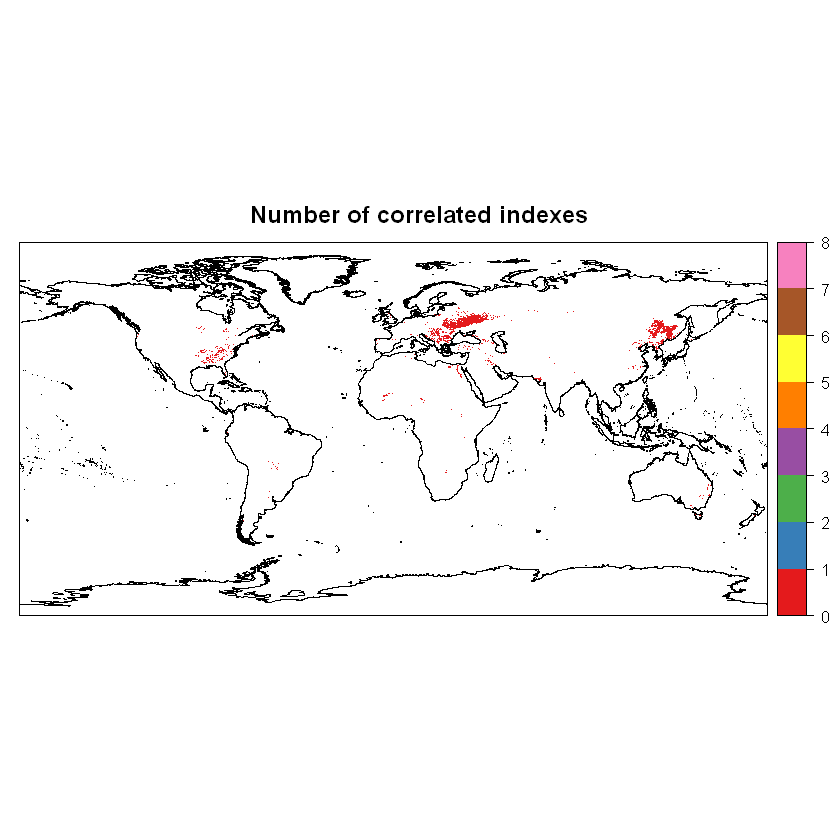

In [24]:
arg.list <- list(col.regions = brewer.pal(8, 'Set1'),
                          at = seq(0, 8, 1), main = 'Number of correlated indexes')

v = cbind(as.numeric(corr.df.2.lag.3$nao.2.pvalue<0.05), as.numeric(corr.df.2.lag.3$poleur.2.pvalue<0.05),
          as.numeric(corr.df.2.lag.3$ea.2.pvalue<0.05),as.numeric(corr.df.2.lag.3$eawr.2.pvalue<0.05),
          as.numeric(corr.df.2.lag.3$pna.2.pvalue<0.05), as.numeric(corr.df.2.lag.3$nina34.2.pvalue<0.05),
          as.numeric(corr.df.2.lag.3$scand.2.pvalue<0.05), as.numeric(corr.df.2.lag.3$wp.2.pvalue<0.05))

suma = rowSums(v, na.rm=T)
v <- suma
v[which(v < 1)] <- NA

df1 <- cbind.data.frame(masked_coords, v)
coordinates(df1) <- c(1,2)
gridded(df1) <- TRUE
arg.list[["sp.layout"]] <- list("sp.lines", coast.lines)
arg.list[["obj"]] <- df1
arg.list[["zcol"]] <- 1
arg.list[["ylim"]] <- c(-90,90)
arg.list[["xlim"]] <- c(-180,180)
do.call("spplot", arg.list) %>% print()

for (i in 1:8){
    cat('Number of pixels correlated with more than ', i-1, ' indexes ', sum(suma > i-1), '\n')
}

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

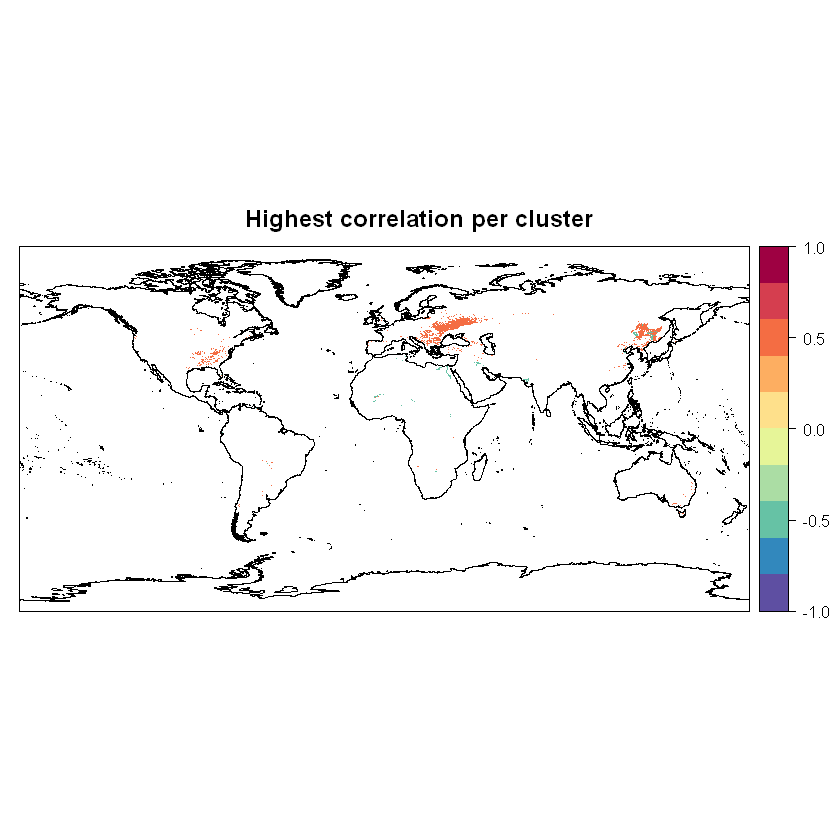

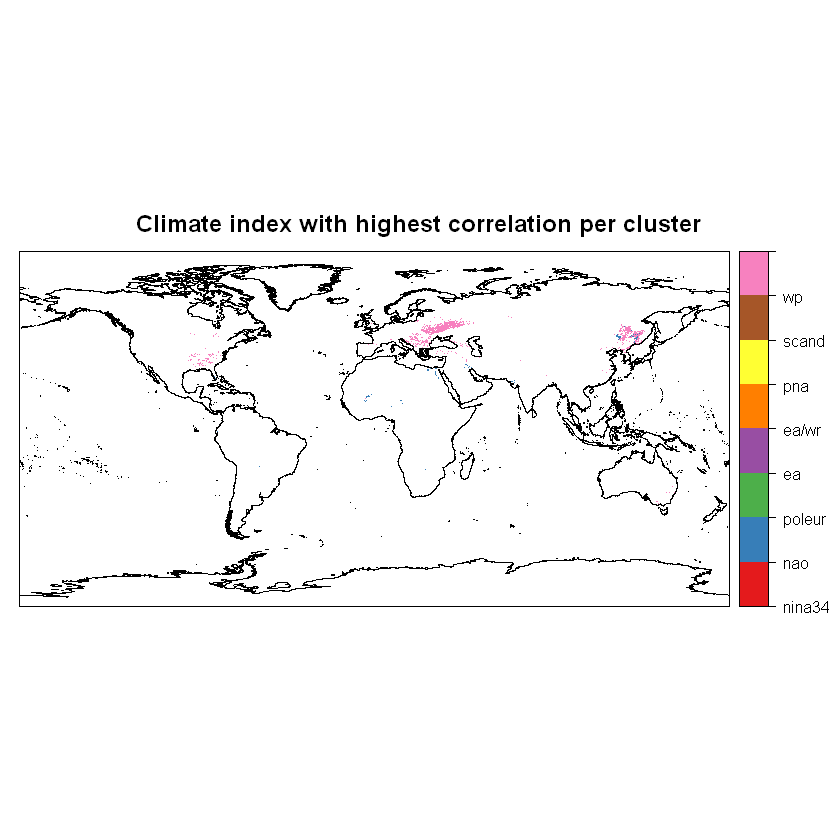

In [25]:
arg.list <- list(col.regions = group.colors[11:1][-6],
                      at = seq(-1, 1, 0.2), main = 'Highest correlation per cluster')

v = apply(corr.df.2.lag.3, 1, function (x) getMaxCorr(x))

df1 <- cbind.data.frame(masked_coords, v)
coordinates(df1) <- c(1,2)
gridded(df1) <- TRUE
arg.list[["sp.layout"]] <- list("sp.lines", coast.lines)
arg.list[["obj"]] <- df1
arg.list[["zcol"]] <- 1
arg.list[["ylim"]] <- c(-90,90)
arg.list[["xlim"]] <- c(-180,180)
do.call("spplot", arg.list) %>% print()
          

arg.list <- list(col.regions = brewer.pal(8, 'Set1'),
                          at = seq(0, 8, 1), main = 'Climate index with highest correlation per cluster')
v = apply(corr.df.2.lag.3, 1, function (x) getIndWithMaxCorr(x))

df1 <- cbind.data.frame(masked_coords, v)
coordinates(df1) <- c(1,2)
gridded(df1) <- TRUE
arg.list[["sp.layout"]] <- list("sp.lines", coast.lines)
arg.list[["obj"]] <- df1
arg.list[["colorkey"]] <- list(labels = list(labels = c("nina34", "nao", "poleur", "ea", "ea/wr", "pna", "scand", "wp","")))
arg.list[["zcol"]] <- 1
arg.list[["ylim"]] <- c(-90,90)
arg.list[["xlim"]] <- c(-180,180)
do.call("spplot", arg.list) %>% print()

# Using deltas

## Without persistence

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"Warning message in min(x):
"ningún argumento finito para min; retornando Inf"Warning message in max(x):
"ningun argumento finito para max; retornando -Inf"Warning message in min(x):
"ningún argumento finito para min; retornando Inf"Warning message in max(x):
"ningun argumento finito para max; retornando -Inf"Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

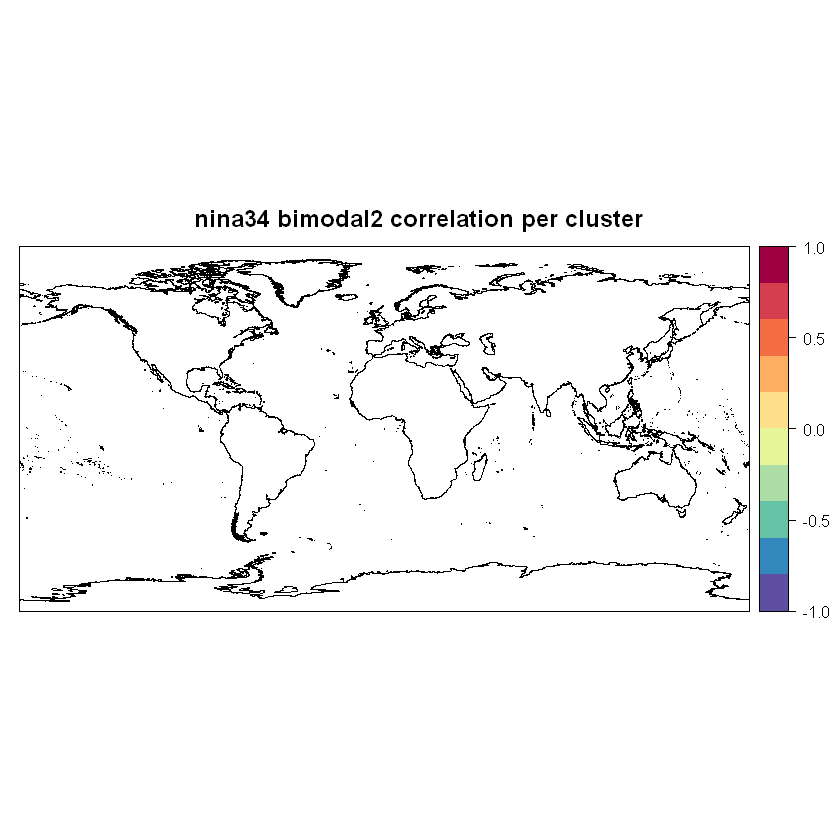

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

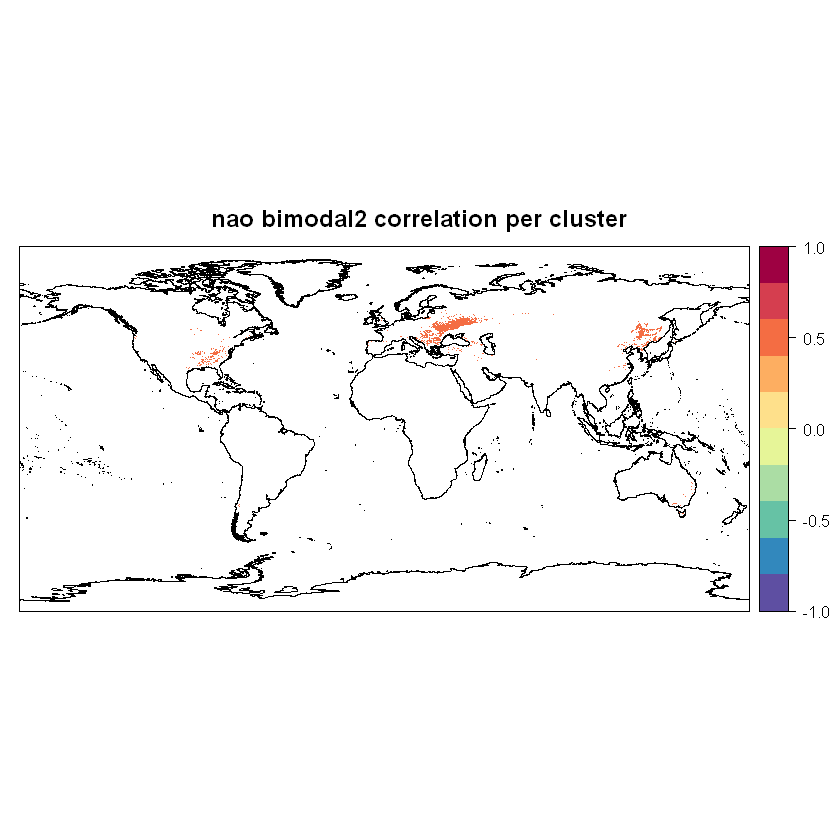

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

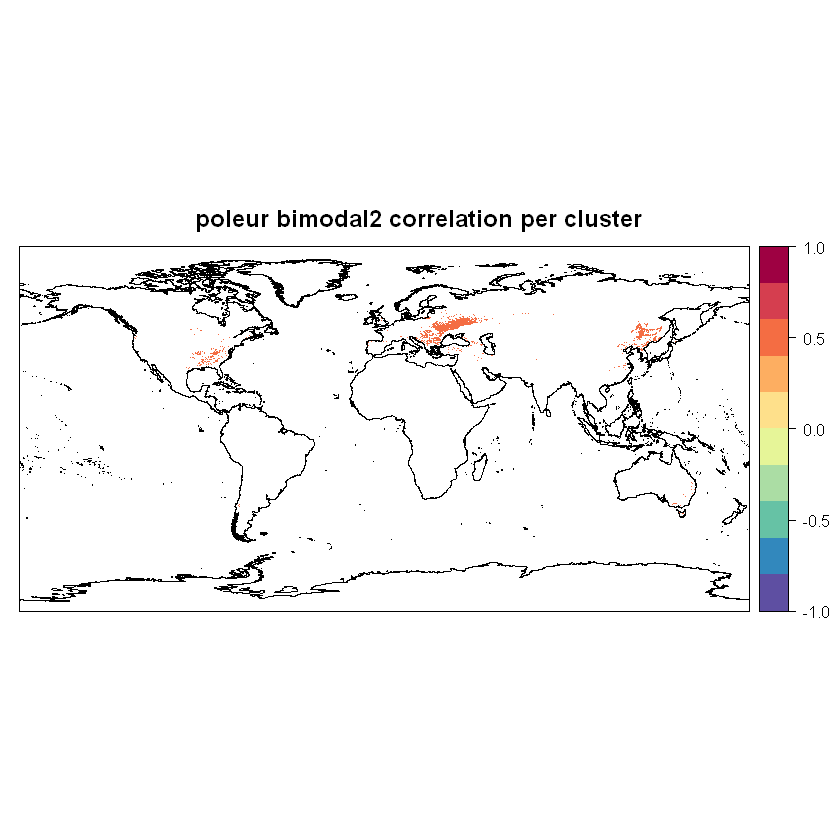

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"Warning message in min(x):
"ningún argumento finito para min; retornando Inf"Warning message in max(x):
"ningun argumento finito para max; retornando -Inf"Warning message in min(x):
"ningún argumento finito para min; retornando Inf"Warning message in max(x):
"ningun argumento finito para max; retornando -Inf"

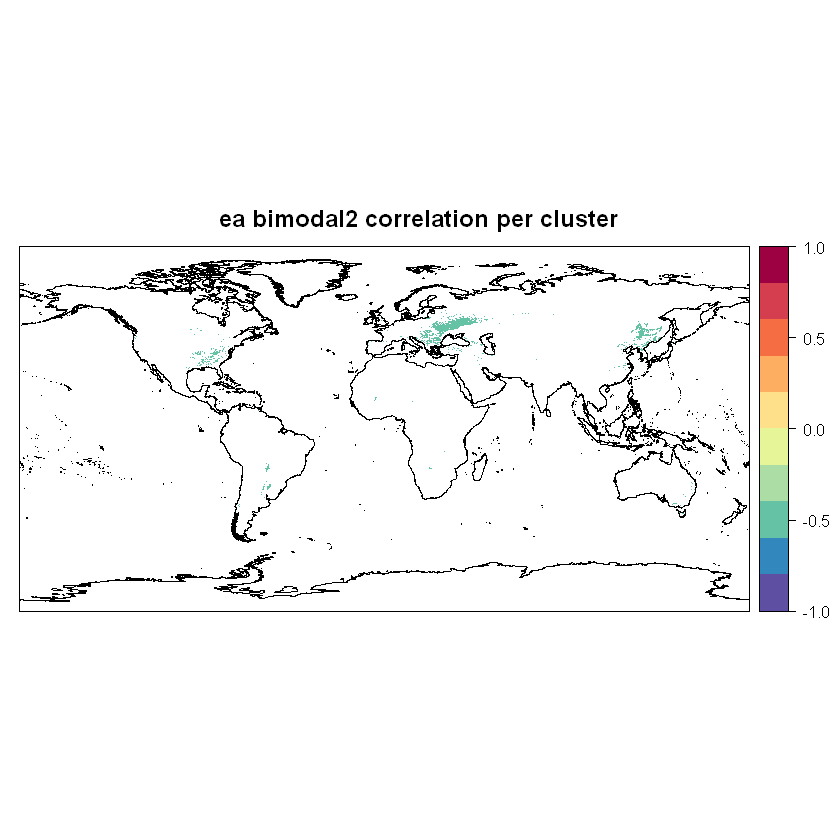

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"Warning message in min(x):
"ningún argumento finito para min; retornando Inf"Warning message in max(x):
"ningun argumento finito para max; retornando -Inf"Warning message in min(x):
"ningún argumento finito para min; retornando Inf"Warning message in max(x):
"ningun argumento finito para max; retornando -Inf"

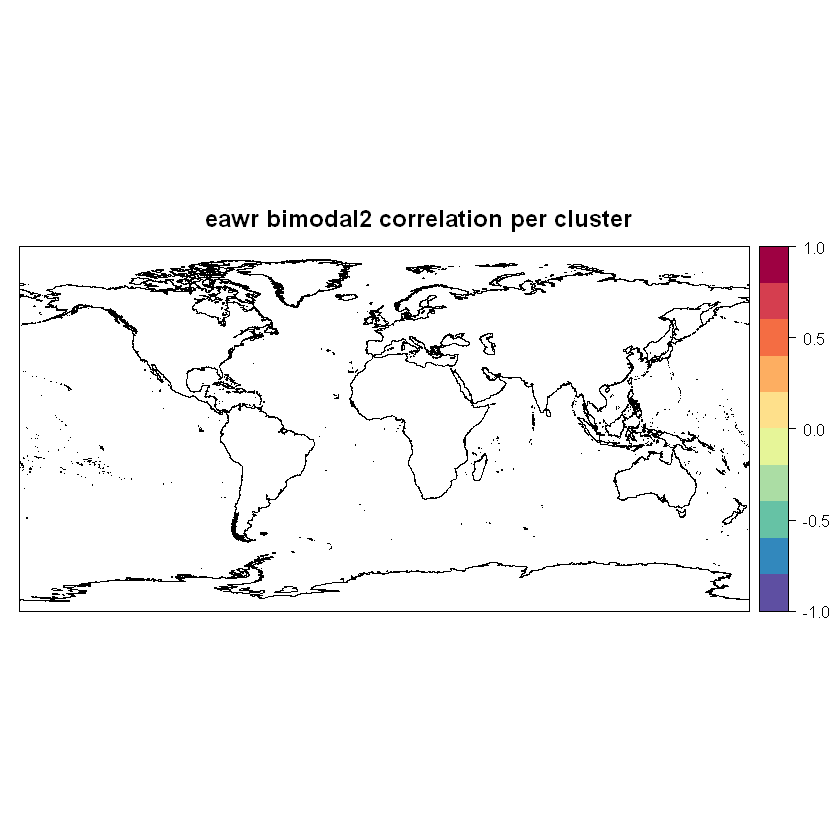

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

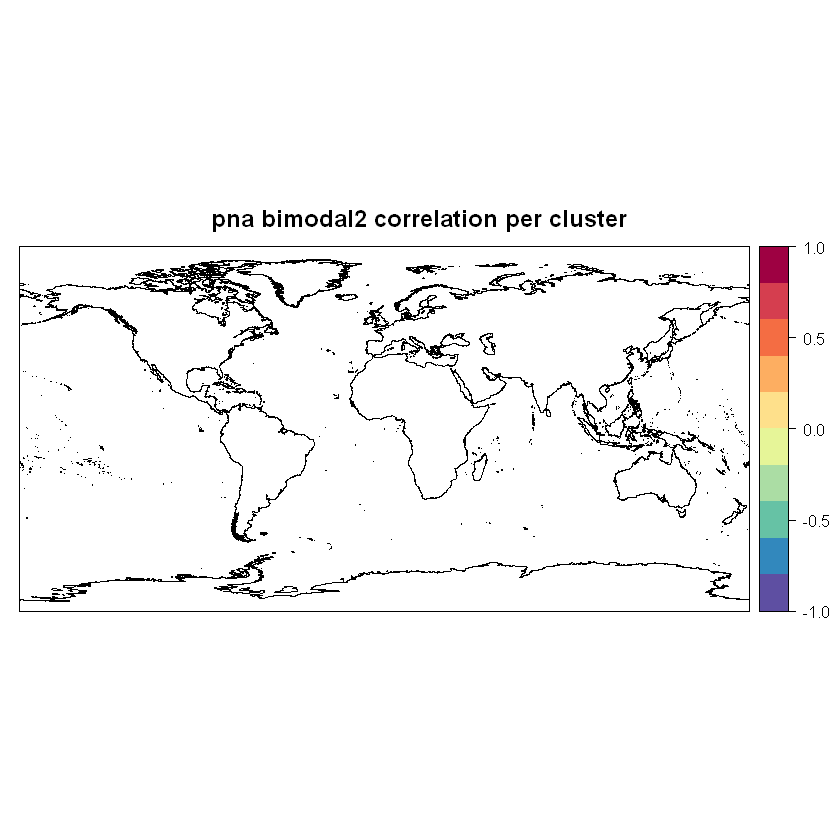

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

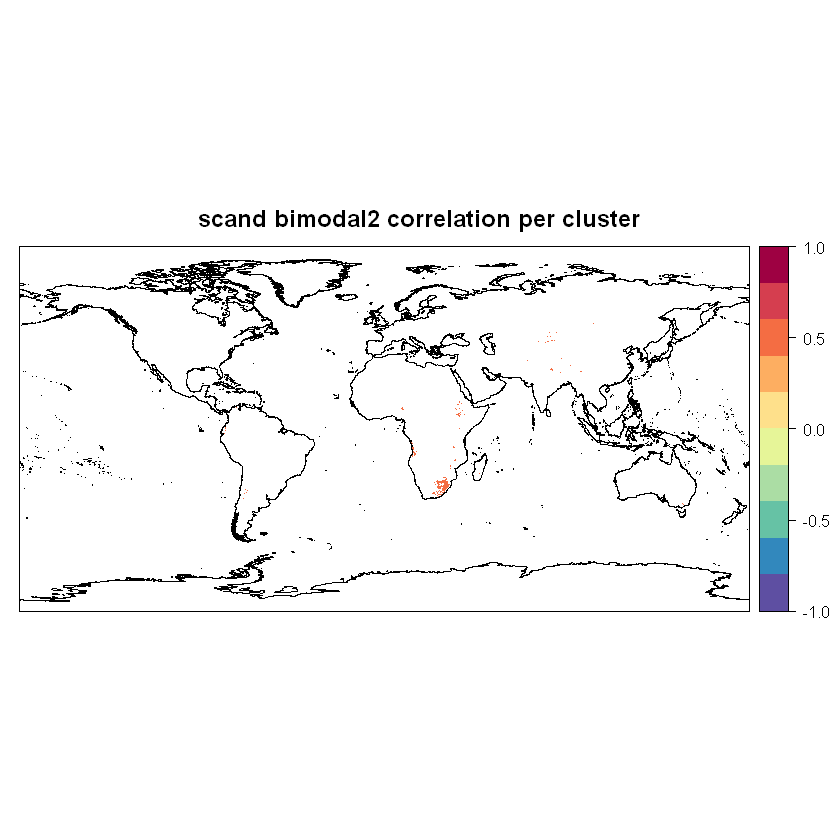

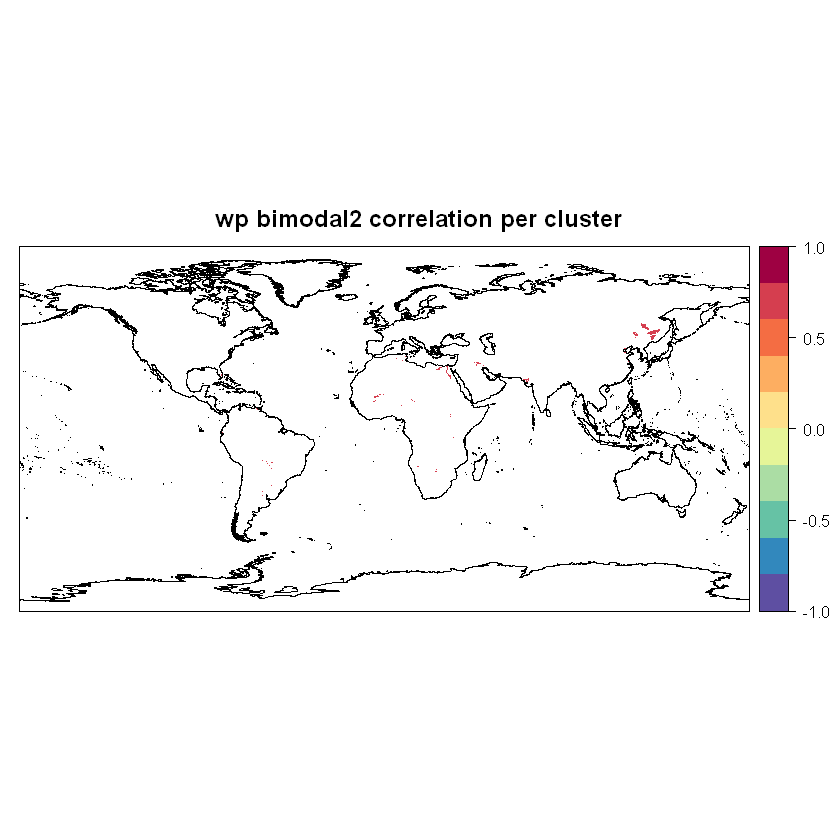

In [26]:
corr.df.2.delta = masked_coords
mode = 'bimodal2'
corr.df.2.delta = corr.annual.clus(log1p(masked_ba_series), fireSeason_def_2, masked_coords, dates, nina34, 'nina34',
                                   corr.df.2.delta, mode = mode, useDeltas = T)
corr.df.2.delta = corr.annual.clus(log1p(masked_ba_series), fireSeason_def_2, masked_coords, dates, nao, 'nao',
                                   corr.df.2.delta, mode = mode, useDeltas = T)
corr.df.2.delta = corr.annual.clus(log1p(masked_ba_series), fireSeason_def_2, masked_coords, dates, poleur, 'poleur',
                                   corr.df.2.delta, mode = mode, useDeltas = T)
corr.df.2.delta = corr.annual.clus(log1p(masked_ba_series), fireSeason_def_2, masked_coords, dates, ea, 'ea',
                                   corr.df.2.delta, mode = mode, useDeltas = T)
corr.df.2.delta = corr.annual.clus(log1p(masked_ba_series), fireSeason_def_2, masked_coords, dates, eawr, 'eawr', 
                                   corr.df.2.delta, mode = mode, useDeltas = T)
corr.df.2.delta = corr.annual.clus(log1p(masked_ba_series), fireSeason_def_2, masked_coords, dates, pna, 'pna', 
                                   corr.df.2.delta, mode = mode, useDeltas = T)
corr.df.2.delta = corr.annual.clus(log1p(masked_ba_series), fireSeason_def_2, masked_coords, dates, scand, 'scand', 
                                   corr.df.2.delta, mode = mode, useDeltas = T)
corr.df.2.delta = corr.annual.clus(log1p(masked_ba_series), fireSeason_def_2, masked_coords, dates, wp, 'wp', 
                                   corr.df.2.delta, mode = mode, useDeltas = T)
#save(corr.df.2.delta, file = 'corrDfDeltaClusBiSeV2.Rdata')

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

Number of pixels correlated with more than  0  indexes  4164 
Number of pixels correlated with more than  1  indexes  2785 
Number of pixels correlated with more than  2  indexes  2785 
Number of pixels correlated with more than  3  indexes  0 
Number of pixels correlated with more than  4  indexes  0 
Number of pixels correlated with more than  5  indexes  0 
Number of pixels correlated with more than  6  indexes  0 
Number of pixels correlated with more than  7  indexes  0 


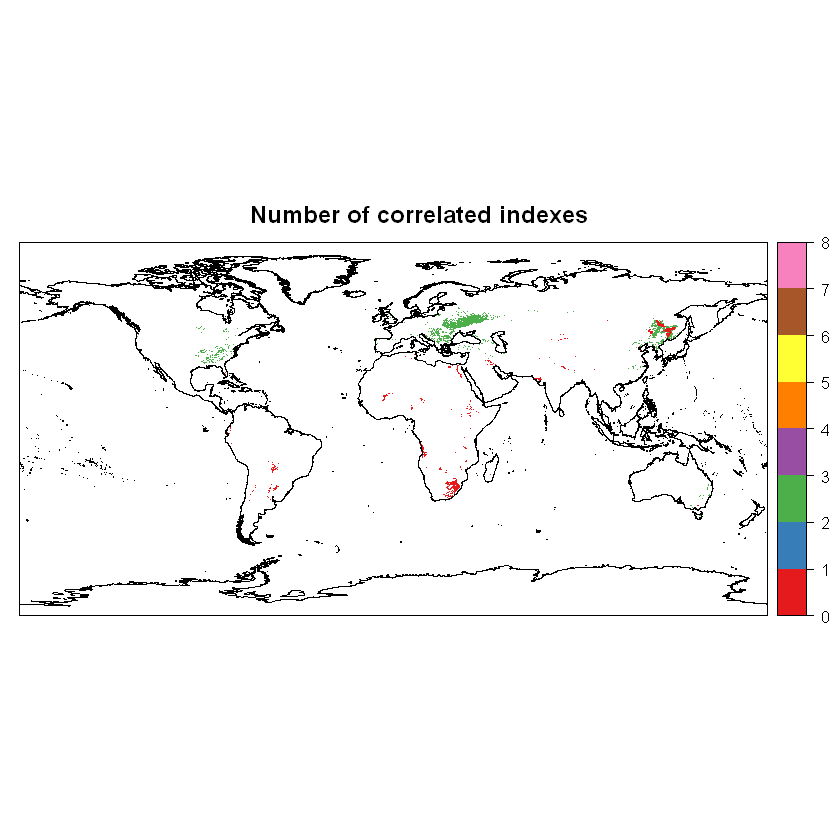

In [27]:
arg.list <- list(col.regions = brewer.pal(8, 'Set1'),
                          at = seq(0, 8, 1), main = 'Number of correlated indexes')

v = cbind(as.numeric(corr.df.2.delta$nao.2.pvalue<0.05), as.numeric(corr.df.2.delta$poleur.2.pvalue<0.05), 
          as.numeric(corr.df.2.delta$ea.2.pvalue<0.05), as.numeric(corr.df.2.delta$eawr.2.pvalue<0.05),
          as.numeric(corr.df.2.delta$pna.2.pvalue<0.05), as.numeric(corr.df.2.delta$nina34.2.pvalue<0.05), 
          as.numeric(corr.df.2.delta$scand.2.pvalue<0.05), as.numeric(corr.df.2.delta$wp.2.pvalue<0.05))

suma = rowSums(v, na.rm=T)
v <- suma
v[which(v < 1)] <- NA

df1 <- cbind.data.frame(masked_coords, v)
coordinates(df1) <- c(1,2)
gridded(df1) <- TRUE
arg.list[["sp.layout"]] <- list("sp.lines", coast.lines)
arg.list[["obj"]] <- df1
arg.list[["zcol"]] <- 1
arg.list[["ylim"]] <- c(-90,90)
arg.list[["xlim"]] <- c(-180,180)
do.call("spplot", arg.list) %>% print()

for (i in 1:8){
    cat('Number of pixels correlated with more than ', i-1, ' indexes ', sum(suma > i-1), '\n')
}

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

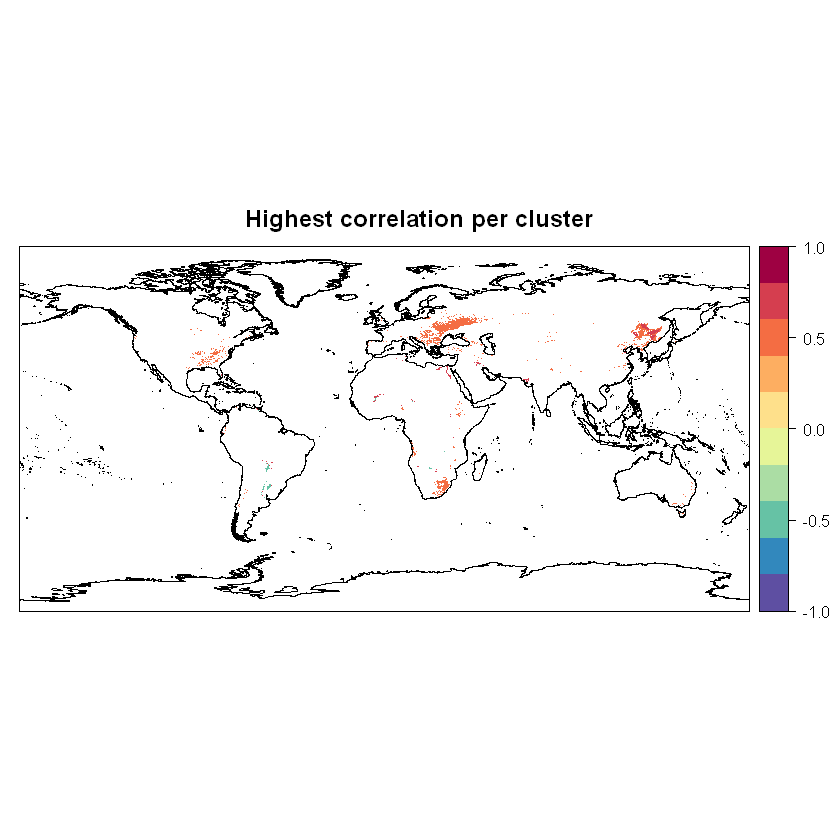

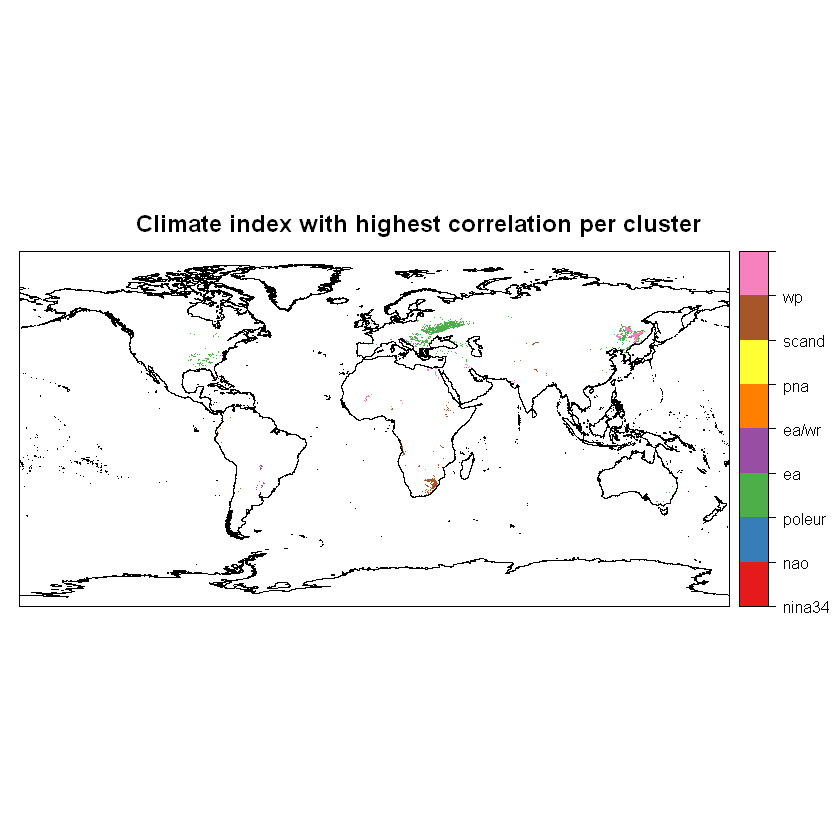

In [28]:
arg.list <- list(col.regions = group.colors[11:1][-6],
                      at = seq(-1, 1, 0.2), main = 'Highest correlation per cluster')

v = apply(corr.df.2.delta, 1, function (x) getMaxCorr(x))

df1 <- cbind.data.frame(masked_coords, v)
coordinates(df1) <- c(1,2)
gridded(df1) <- TRUE
arg.list[["sp.layout"]] <- list("sp.lines", coast.lines)
arg.list[["obj"]] <- df1
arg.list[["zcol"]] <- 1
arg.list[["ylim"]] <- c(-90,90)
arg.list[["xlim"]] <- c(-180,180)
do.call("spplot", arg.list) %>% print()
 
          
arg.list <- list(col.regions = brewer.pal(8, 'Set1'),
                          at = seq(0, 8, 1), main = 'Climate index with highest correlation per cluster')
v = apply(corr.df.2.delta, 1, function (x) getIndWithMaxCorr(x))

df1 <- cbind.data.frame(masked_coords, v)
coordinates(df1) <- c(1,2)
gridded(df1) <- TRUE
arg.list[["sp.layout"]] <- list("sp.lines", coast.lines)
arg.list[["obj"]] <- df1
arg.list[["colorkey"]] <- list(labels = list(labels = c("nina34", "nao", "poleur", "ea", "ea/wr", "pna", "scand", "wp","")))
arg.list[["zcol"]] <- 1
arg.list[["ylim"]] <- c(-90,90)
arg.list[["xlim"]] <- c(-180,180)
do.call("spplot", arg.list) %>% print()    

## With 1-month persistence

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"Warning message in min(x):
"ningún argumento finito para min; retornando Inf"Warning message in max(x):
"ningun argumento finito para max; retornando -Inf"Warning message in min(x):
"ningún argumento finito para min; retornando Inf"Warning message in max(x):
"ningun argumento finito para max; retornando -Inf"Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

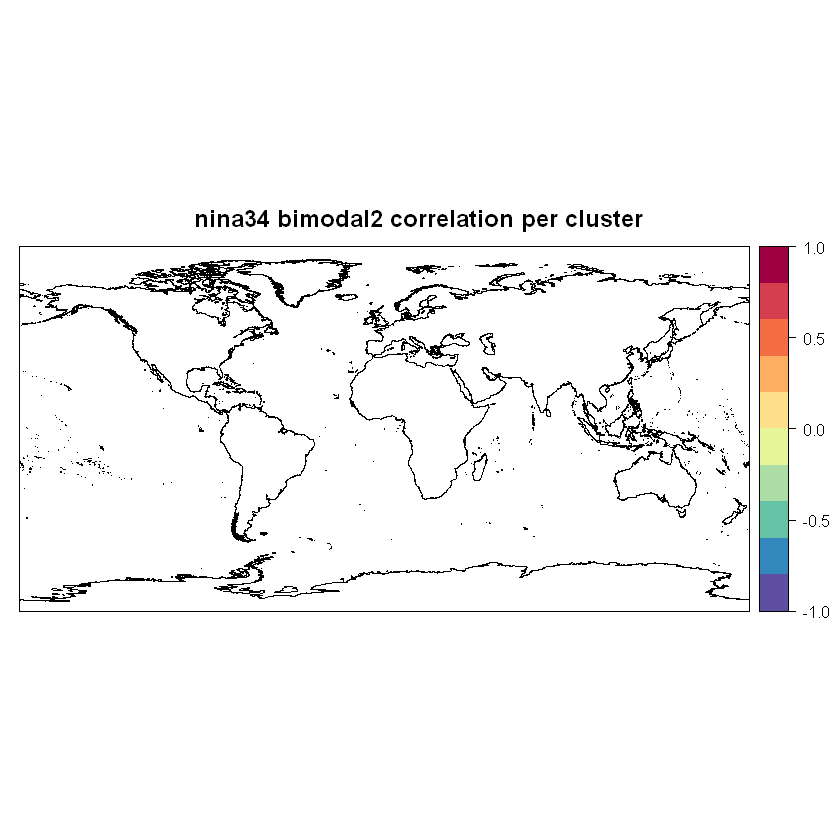

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"Warning message in min(x):
"ningún argumento finito para min; retornando Inf"Warning message in max(x):
"ningun argumento finito para max; retornando -Inf"Warning message in min(x):
"ningún argumento finito para min; retornando Inf"Warning message in max(x):
"ningun argumento finito para max; retornando -Inf"

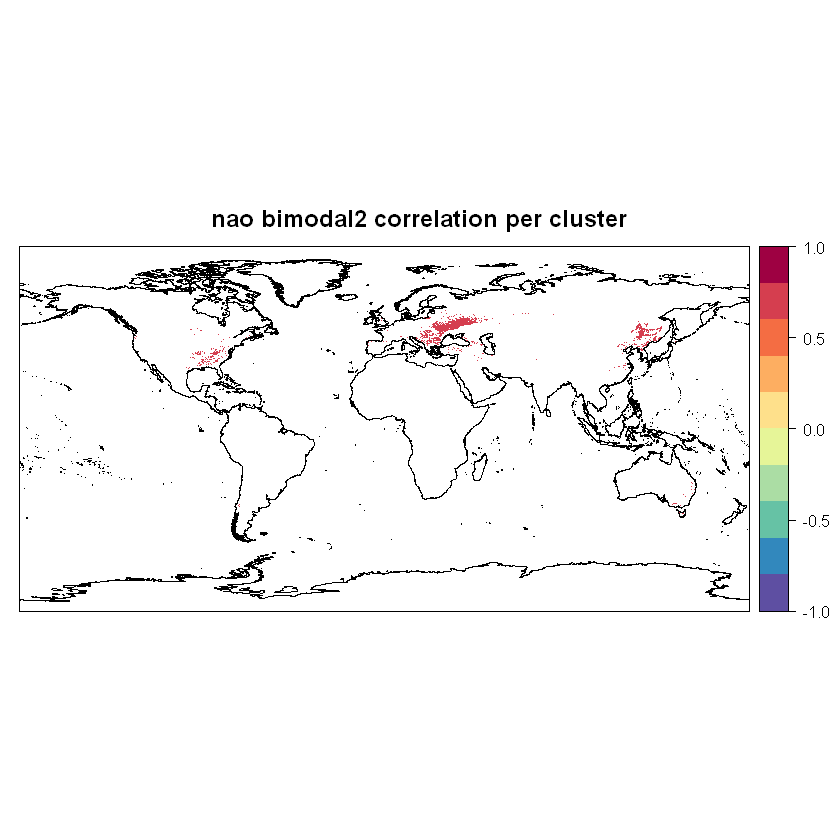

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

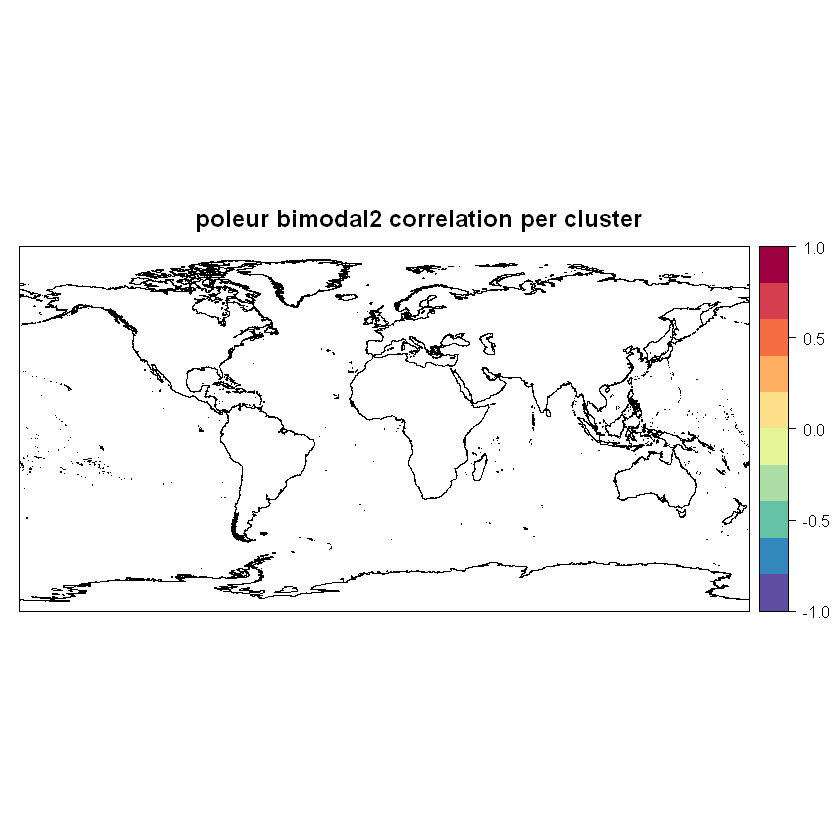

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"Warning message in min(x):
"ningún argumento finito para min; retornando Inf"Warning message in max(x):
"ningun argumento finito para max; retornando -Inf"Warning message in min(x):
"ningún argumento finito para min; retornando Inf"Warning message in max(x):
"ningun argumento finito para max; retornando -Inf"

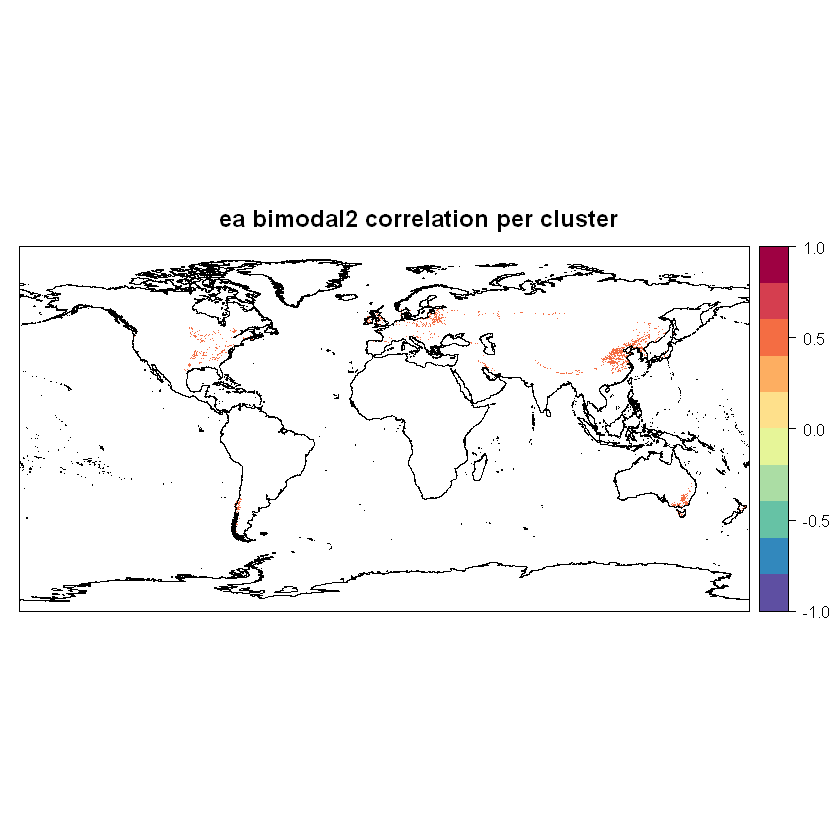

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

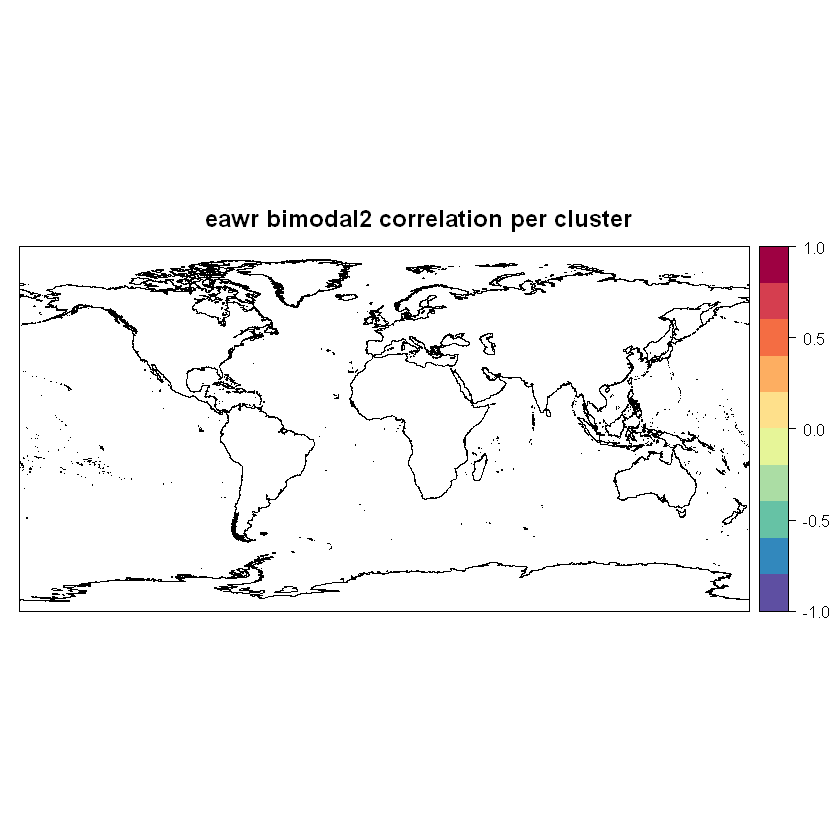

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

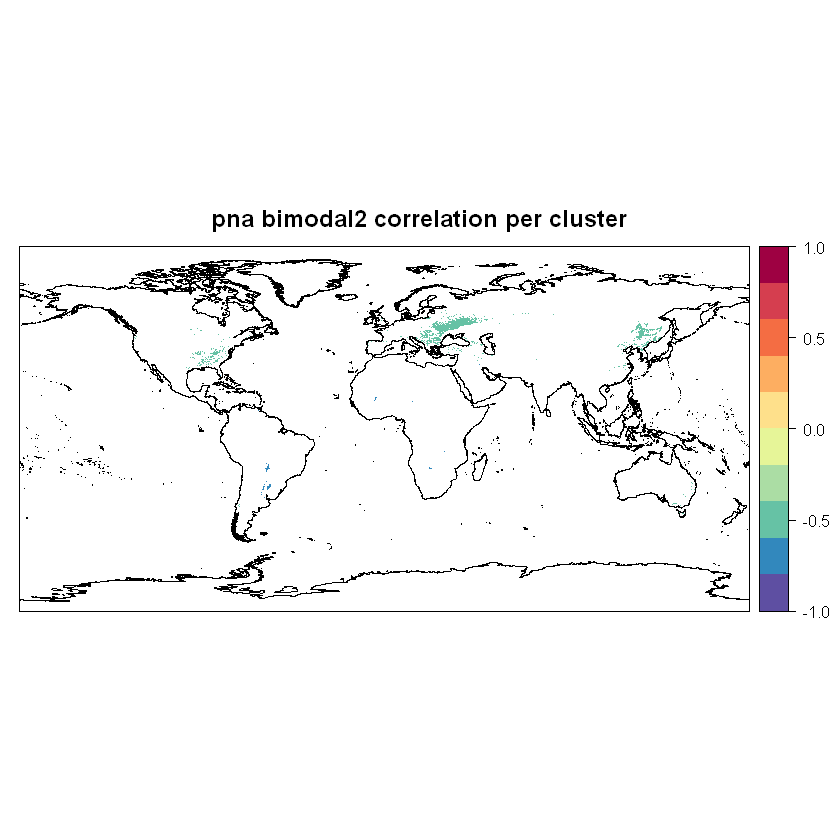

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

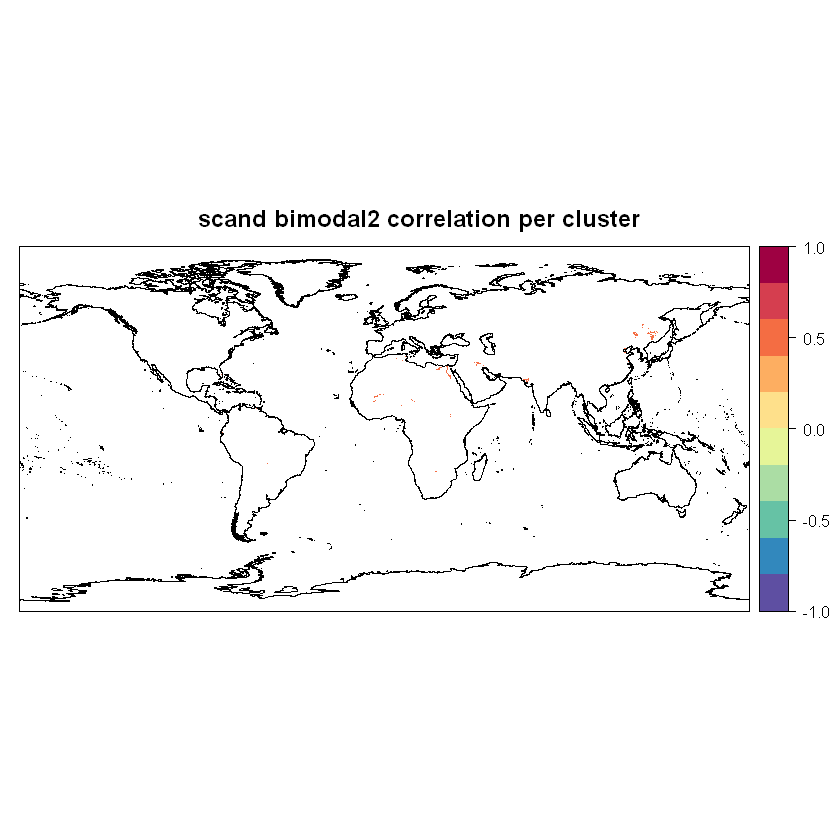

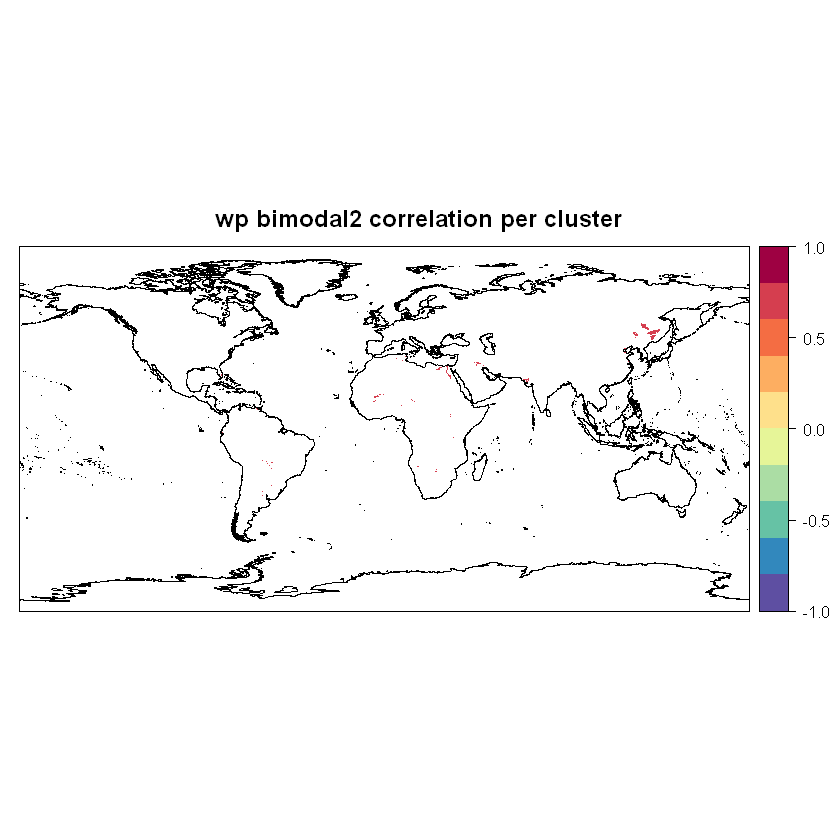

In [29]:
corr.df.2.delta.lag.1 = masked_coords
mode = 'bimodal2'
t = 1
corr.df.2.delta.lag.1 = corr.annual.clus(log1p(masked_ba_series), fireSeason_def_2, masked_coords, dates, nina34, 'nina34',
                                   corr.df.2.delta.lag.1, mode = mode, t = t, useDeltas = T)
corr.df.2.delta.lag.1 = corr.annual.clus(log1p(masked_ba_series), fireSeason_def_2, masked_coords, dates, nao, 'nao',
                                   corr.df.2.delta.lag.1, mode = mode, t = t, useDeltas = T)
corr.df.2.delta.lag.1 = corr.annual.clus(log1p(masked_ba_series), fireSeason_def_2, masked_coords, dates, poleur, 'poleur',
                                   corr.df.2.delta.lag.1, mode = mode, t = t, useDeltas = T)
corr.df.2.delta.lag.1 = corr.annual.clus(log1p(masked_ba_series), fireSeason_def_2, masked_coords, dates, ea, 'ea',
                                   corr.df.2.delta.lag.1, mode = mode, t = t, useDeltas = T)
corr.df.2.delta.lag.1 = corr.annual.clus(log1p(masked_ba_series), fireSeason_def_2, masked_coords, dates, eawr, 'eawr',
                                   corr.df.2.delta.lag.1, mode = mode, t = t, useDeltas = T)
corr.df.2.delta.lag.1 = corr.annual.clus(log1p(masked_ba_series), fireSeason_def_2, masked_coords, dates, pna, 'pna', 
                                   corr.df.2.delta.lag.1, mode = mode, t = t, useDeltas = T)
corr.df.2.delta.lag.1 = corr.annual.clus(log1p(masked_ba_series), fireSeason_def_2, masked_coords, dates, scand, 'scand',
                                   corr.df.2.delta.lag.1, mode = mode, t = t, useDeltas = T)
corr.df.2.delta.lag.1 = corr.annual.clus(log1p(masked_ba_series), fireSeason_def_2, masked_coords, dates, wp, 'wp', 
                                   corr.df.2.delta.lag.1, mode = mode, t = t, useDeltas = T)

#save(corr.df.2.delta.lag.1, file = 'corrDfDeltaClusBiSeLag1V2.Rdata')

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

Number of pixels correlated with more than  0  indexes  6233 
Number of pixels correlated with more than  1  indexes  3152 
Number of pixels correlated with more than  2  indexes  0 
Number of pixels correlated with more than  3  indexes  0 
Number of pixels correlated with more than  4  indexes  0 
Number of pixels correlated with more than  5  indexes  0 
Number of pixels correlated with more than  6  indexes  0 
Number of pixels correlated with more than  7  indexes  0 


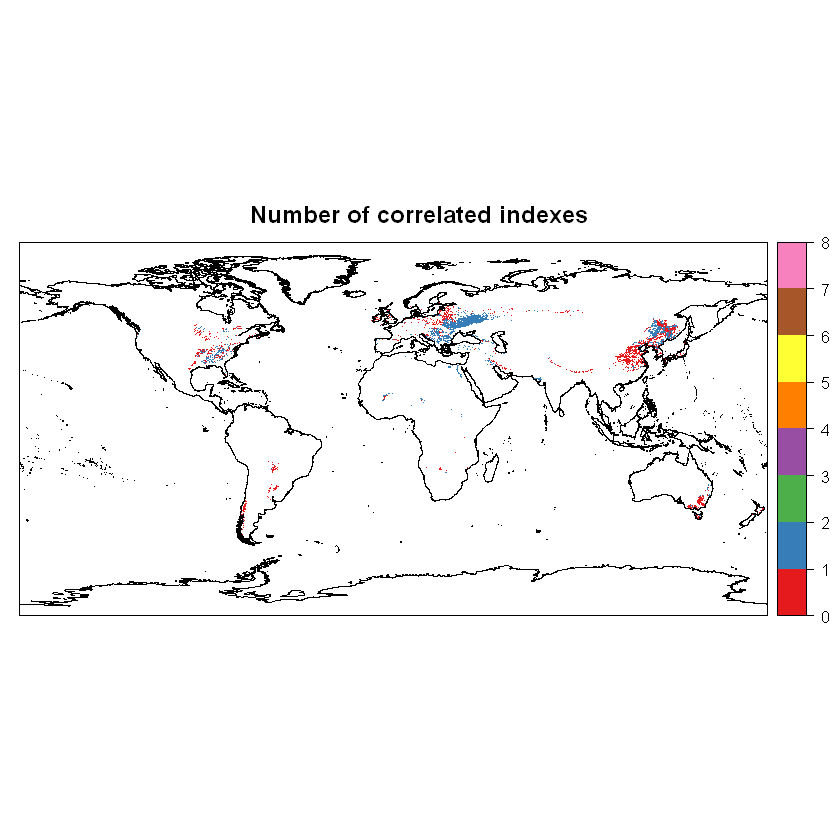

In [30]:
arg.list <- list(col.regions = brewer.pal(8, 'Set1'),
                          at = seq(0, 8, 1), main = 'Number of correlated indexes')

v = cbind(as.numeric(corr.df.2.delta.lag.1$nao.2.pvalue<0.05), as.numeric(corr.df.2.delta.lag.1$poleur.2.pvalue<0.05),
          as.numeric(corr.df.2.delta.lag.1$ea.2.pvalue<0.05),as.numeric(corr.df.2.delta.lag.1$eawr.2.pvalue<0.05),
          as.numeric(corr.df.2.delta.lag.1$pna.2.pvalue<0.05), as.numeric(corr.df.2.delta.lag.1$nina34.2.pvalue<0.05),
          as.numeric(corr.df.2.delta.lag.1$scand.2.pvalue<0.05), as.numeric(corr.df.2.delta.lag.1$wp.2.pvalue<0.05))

suma = rowSums(v, na.rm=T)
v <- suma
v[which(v < 1)] <- NA

df1 <- cbind.data.frame(masked_coords, v)
coordinates(df1) <- c(1,2)
gridded(df1) <- TRUE
arg.list[["sp.layout"]] <- list("sp.lines", coast.lines)
arg.list[["obj"]] <- df1
arg.list[["zcol"]] <- 1
arg.list[["ylim"]] <- c(-90,90)
arg.list[["xlim"]] <- c(-180,180)
do.call("spplot", arg.list) %>% print()

for (i in 1:8){
    cat('Number of pixels correlated with more than ', i-1, ' indexes ', sum(suma > i-1), '\n')
}

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

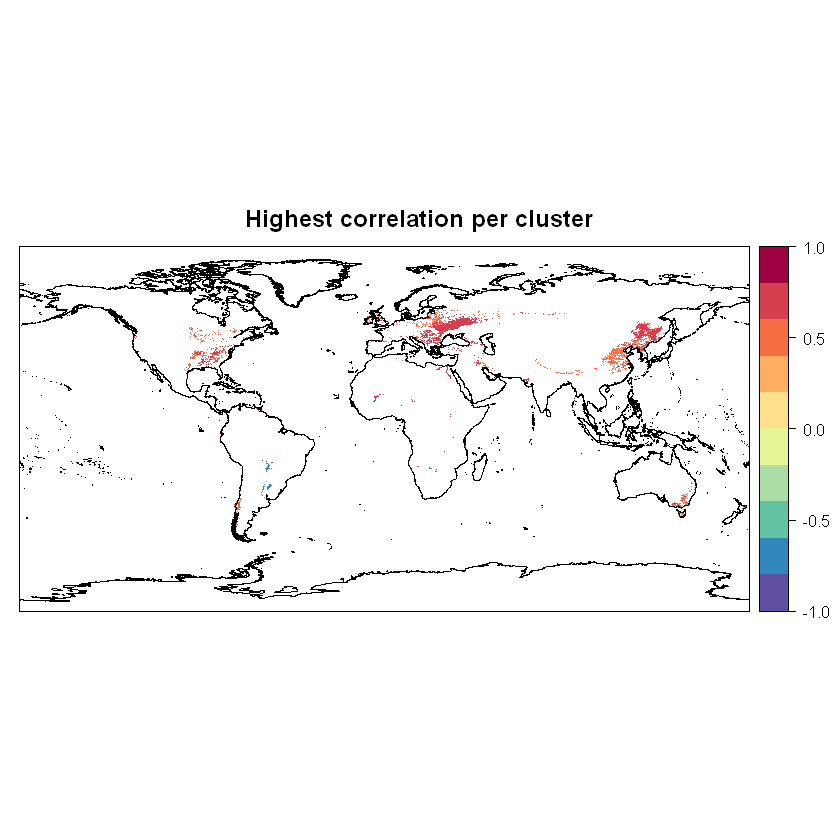

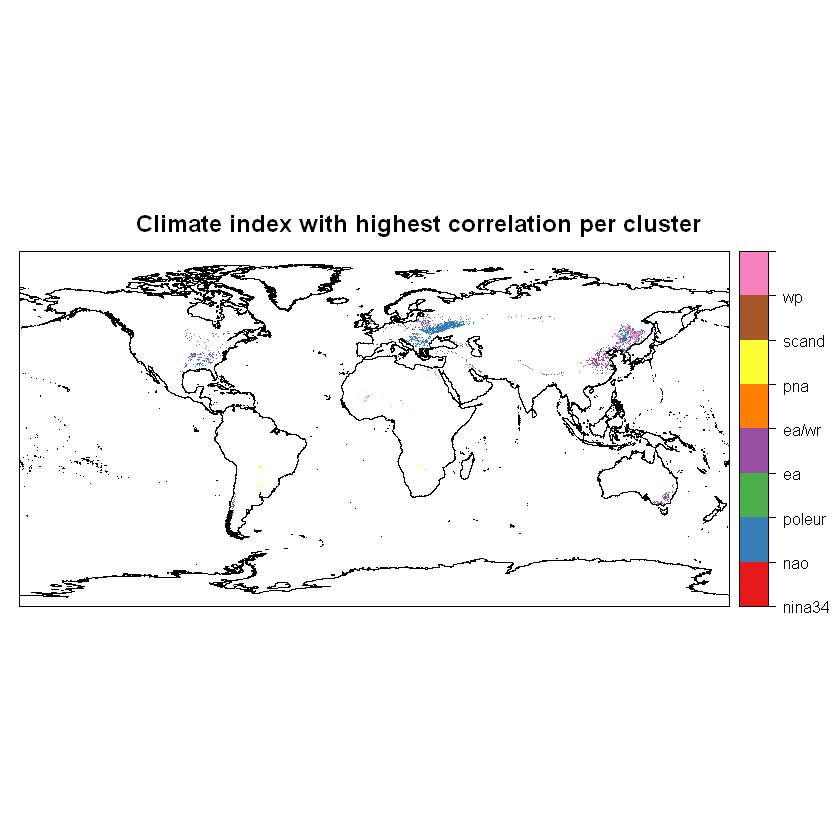

In [31]:
arg.list <- list(col.regions = group.colors[11:1][-6],
                      at = seq(-1, 1, 0.2), main = 'Highest correlation per cluster')

v = apply(corr.df.2.delta.lag.1, 1, function (x) getMaxCorr(x))

df1 <- cbind.data.frame(masked_coords, v)
coordinates(df1) <- c(1,2)
gridded(df1) <- TRUE
arg.list[["sp.layout"]] <- list("sp.lines", coast.lines)
arg.list[["obj"]] <- df1
arg.list[["zcol"]] <- 1
arg.list[["ylim"]] <- c(-90,90)
arg.list[["xlim"]] <- c(-180,180)
do.call("spplot", arg.list) %>% print()
          

arg.list <- list(col.regions = brewer.pal(8, 'Set1'),
                          at = seq(0, 8, 1), main = 'Climate index with highest correlation per cluster')
v = apply(corr.df.2.delta.lag.1, 1, function (x) getIndWithMaxCorr(x))

df1 <- cbind.data.frame(masked_coords, v)
coordinates(df1) <- c(1,2)
gridded(df1) <- TRUE
arg.list[["sp.layout"]] <- list("sp.lines", coast.lines)
arg.list[["obj"]] <- df1
arg.list[["colorkey"]] <- list(labels = list(labels = c("nina34", "nao", "poleur", "ea", "ea/wr", "pna", "scand", "wp","")))
arg.list[["zcol"]] <- 1
arg.list[["ylim"]] <- c(-90,90)
arg.list[["xlim"]] <- c(-180,180)
do.call("spplot", arg.list) %>% print()

## With 2-months persistence

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"Warning message in min(x):
"ningún argumento finito para min; retornando Inf"Warning message in max(x):
"ningun argumento finito para max; retornando -Inf"Warning message in min(x):
"ningún argumento finito para min; retornando Inf"Warning message in max(x):
"ningun argumento finito para max; retornando -Inf"Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"Warning message in min(x):
"ningún argumento finito para min; retornando Inf"Warning message in max(x):
"ningun argumento finito para max; retornando -Inf"Warning message in min(x):
"ningún argumento finito para min; retornando Inf"Warning message in max(x):
"ningun argumento finito para max; retornando -Inf"

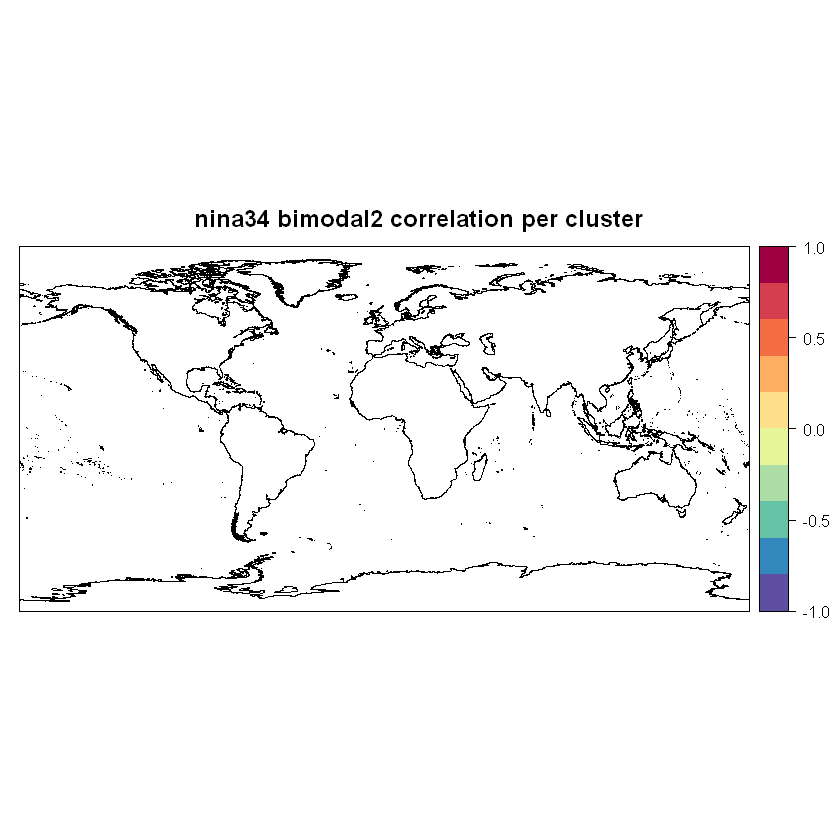

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"Warning message in min(x):
"ningún argumento finito para min; retornando Inf"Warning message in max(x):
"ningun argumento finito para max; retornando -Inf"Warning message in min(x):
"ningún argumento finito para min; retornando Inf"Warning message in max(x):
"ningun argumento finito para max; retornando -Inf"

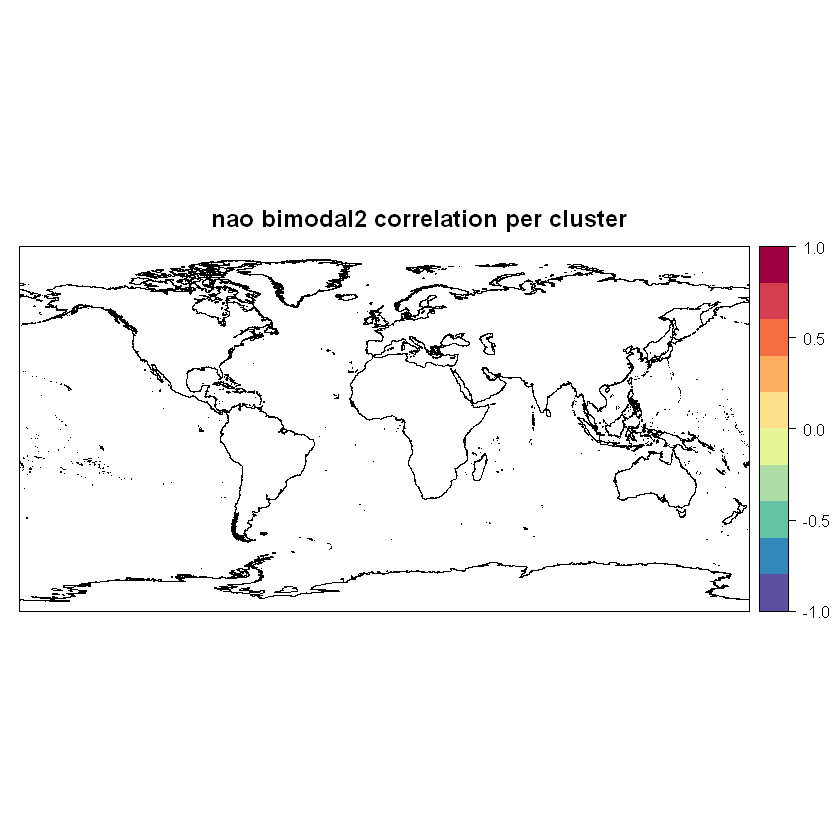

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"Warning message in min(x):
"ningún argumento finito para min; retornando Inf"Warning message in max(x):
"ningun argumento finito para max; retornando -Inf"Warning message in min(x):
"ningún argumento finito para min; retornando Inf"Warning message in max(x):
"ningun argumento finito para max; retornando -Inf"

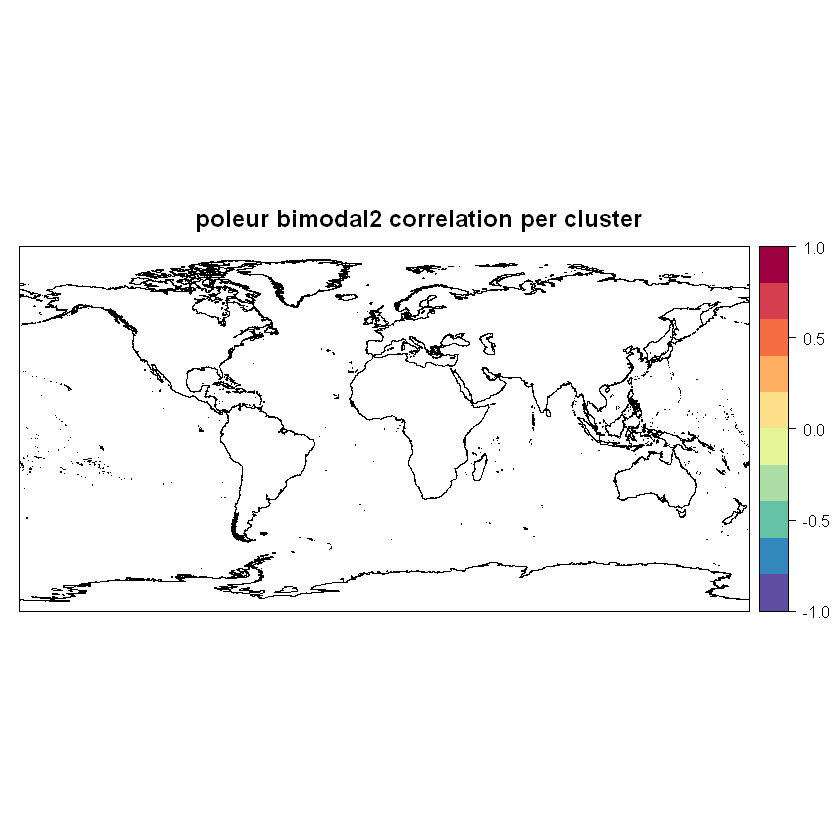

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"Warning message in min(x):
"ningún argumento finito para min; retornando Inf"Warning message in max(x):
"ningun argumento finito para max; retornando -Inf"Warning message in min(x):
"ningún argumento finito para min; retornando Inf"Warning message in max(x):
"ningun argumento finito para max; retornando -Inf"

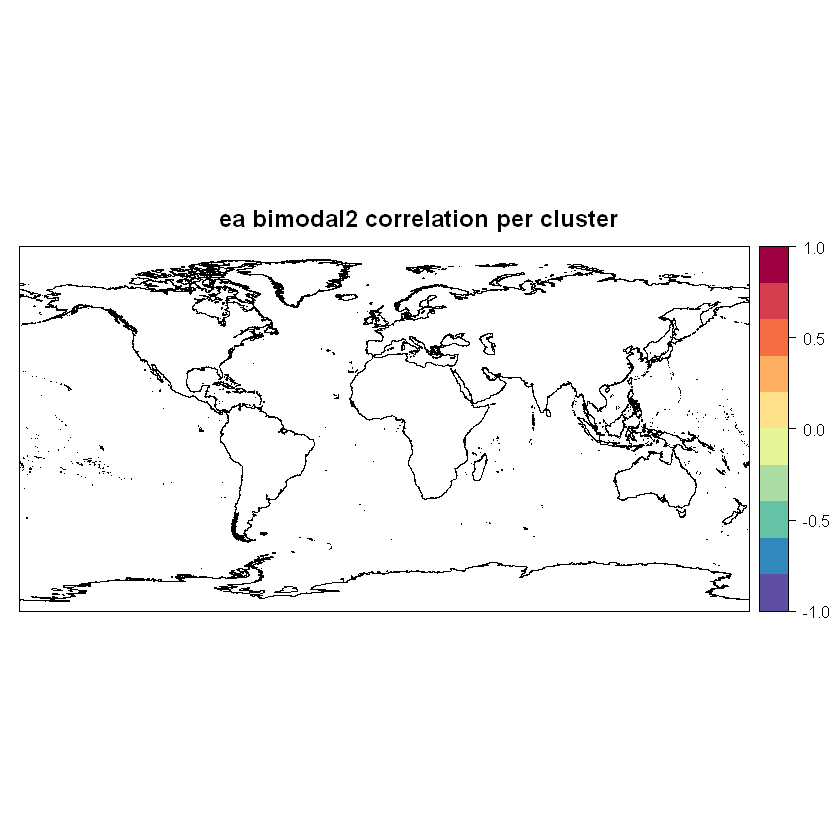

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

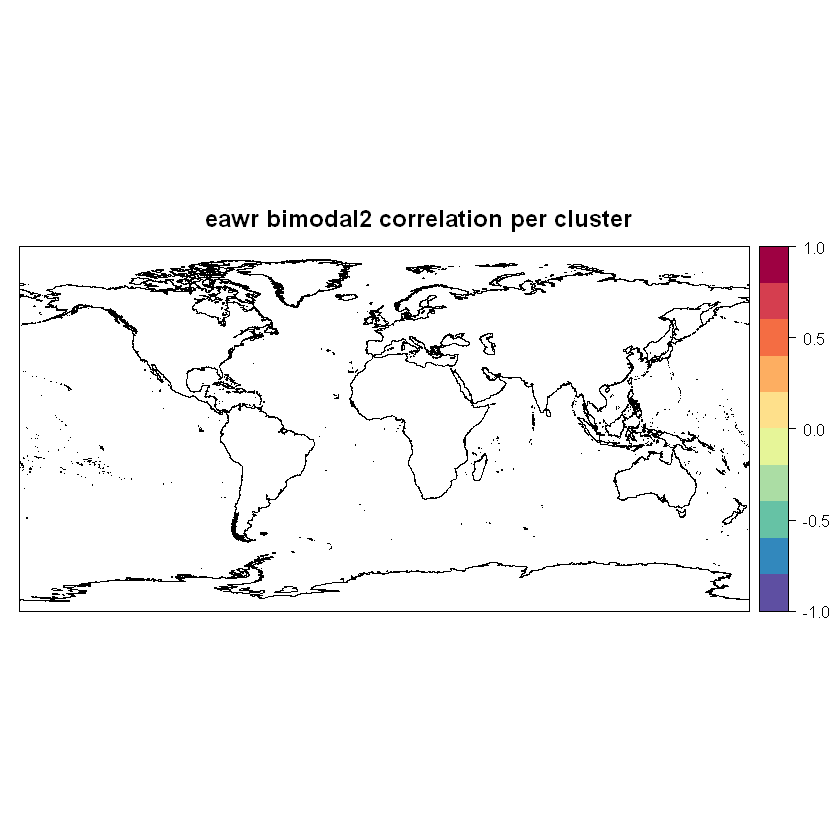

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

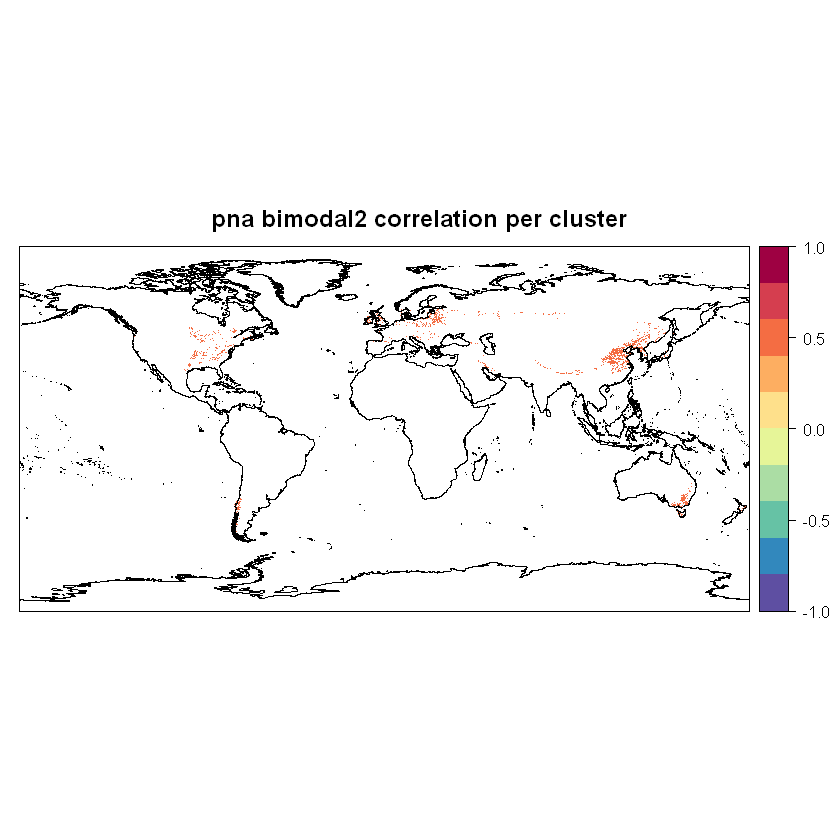

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

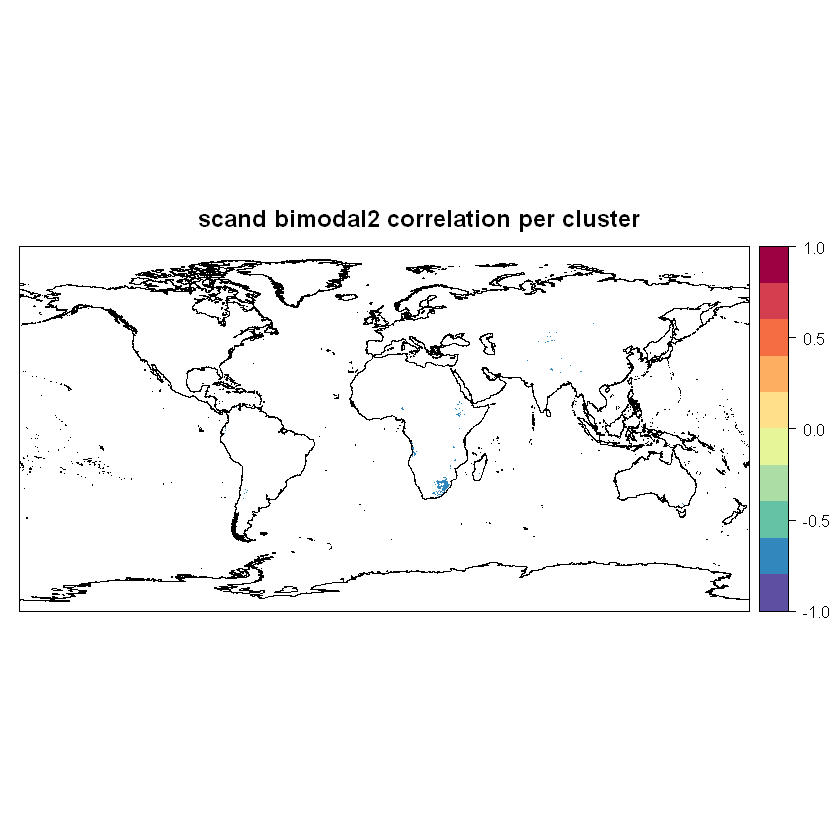

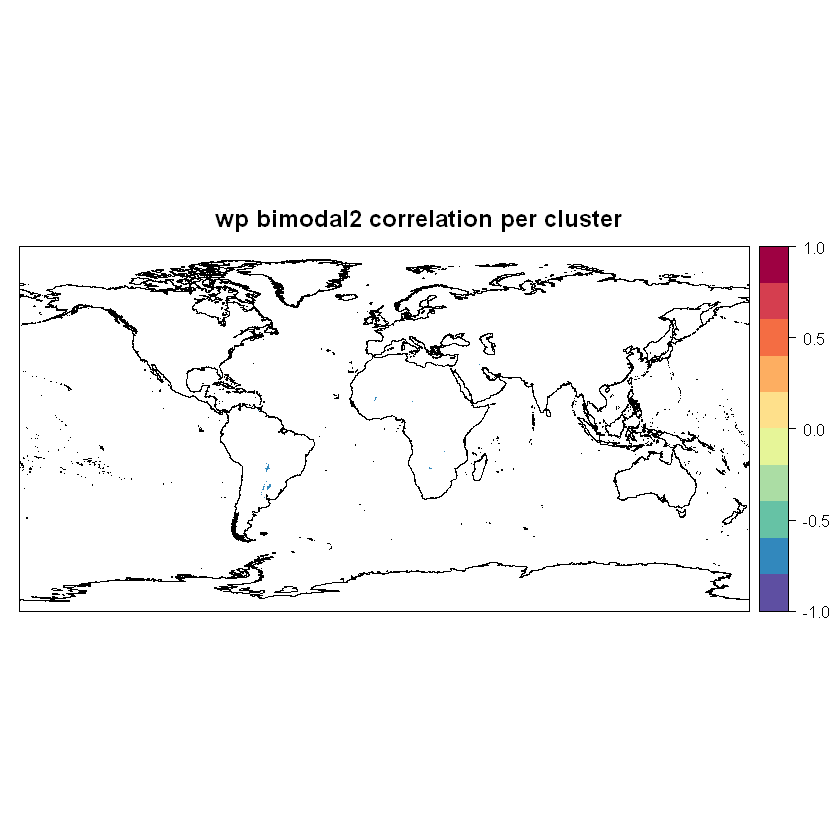

In [32]:
corr.df.2.delta.lag.2 = masked_coords
mode = 'bimodal2'
t = 2
corr.df.2.delta.lag.2 = corr.annual.clus(log1p(masked_ba_series), fireSeason_def_2, masked_coords, dates, nina34, 'nina34',
                                   corr.df.2.delta.lag.2, mode = mode, t = t, useDeltas = T)
corr.df.2.delta.lag.2 = corr.annual.clus(log1p(masked_ba_series), fireSeason_def_2, masked_coords, dates, nao, 'nao',
                                   corr.df.2.delta.lag.2, mode = mode, t = t, useDeltas = T)
corr.df.2.delta.lag.2 = corr.annual.clus(log1p(masked_ba_series), fireSeason_def_2, masked_coords, dates, poleur, 'poleur',
                                   corr.df.2.delta.lag.2, mode = mode, t = t, useDeltas = T)
corr.df.2.delta.lag.2 = corr.annual.clus(log1p(masked_ba_series), fireSeason_def_2, masked_coords, dates, ea, 'ea',
                                   corr.df.2.delta.lag.2, mode = mode, t = t, useDeltas = T)
corr.df.2.delta.lag.2 = corr.annual.clus(log1p(masked_ba_series), fireSeason_def_2, masked_coords, dates, eawr, 'eawr',
                                   corr.df.2.delta.lag.2, mode = mode, t = t, useDeltas = T)
corr.df.2.delta.lag.2 = corr.annual.clus(log1p(masked_ba_series), fireSeason_def_2, masked_coords, dates, pna, 'pna', 
                                   corr.df.2.delta.lag.2, mode = mode, t = t, useDeltas = T)
corr.df.2.delta.lag.2 = corr.annual.clus(log1p(masked_ba_series), fireSeason_def_2, masked_coords, dates, scand, 'scand',
                                   corr.df.2.delta.lag.2, mode = mode, t = t, useDeltas = T)
corr.df.2.delta.lag.2 = corr.annual.clus(log1p(masked_ba_series), fireSeason_def_2, masked_coords, dates, wp, 'wp', 
                                   corr.df.2.delta.lag.2, mode = mode, t = t, useDeltas = T)

#save(corr.df.2.delta.lag.2, file = 'corrDfDeltaClusBiSeLag2V2.Rdata')

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

Number of pixels correlated with more than  0  indexes  3474 
Number of pixels correlated with more than  1  indexes  0 
Number of pixels correlated with more than  2  indexes  0 
Number of pixels correlated with more than  3  indexes  0 
Number of pixels correlated with more than  4  indexes  0 
Number of pixels correlated with more than  5  indexes  0 
Number of pixels correlated with more than  6  indexes  0 
Number of pixels correlated with more than  7  indexes  0 


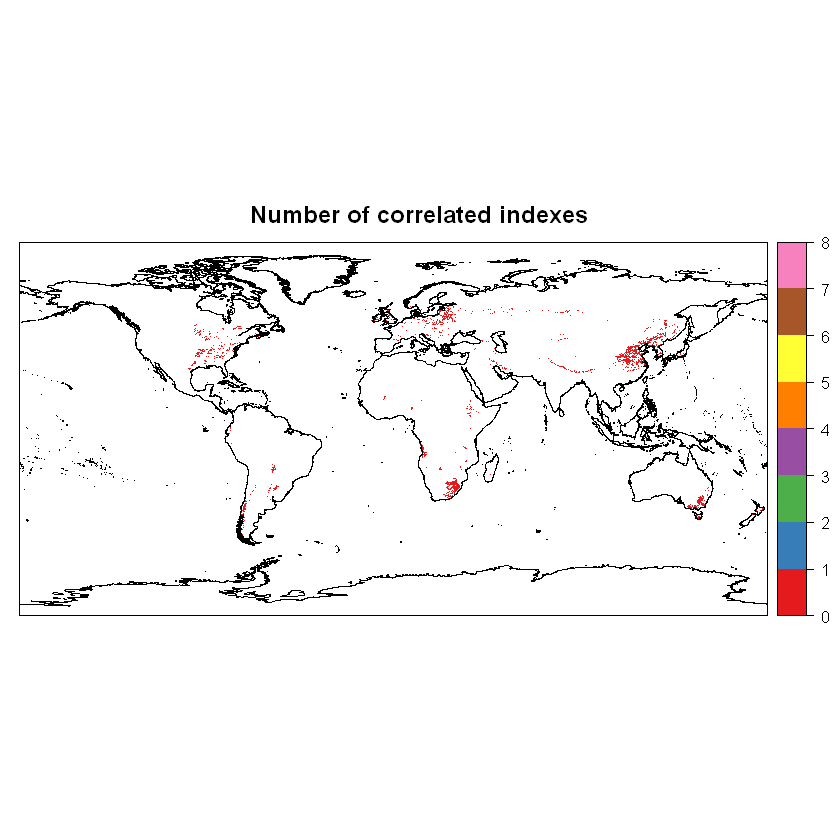

In [33]:
arg.list <- list(col.regions = brewer.pal(8, 'Set1'),
                          at = seq(0, 8, 1), main = 'Number of correlated indexes')

v = cbind(as.numeric(corr.df.2.delta.lag.2$nao.2.pvalue<0.05), as.numeric(corr.df.2.delta.lag.2$poleur.2.pvalue<0.05),
          as.numeric(corr.df.2.delta.lag.2$ea.2.pvalue<0.05),as.numeric(corr.df.2.delta.lag.2$eawr.2.pvalue<0.05),
          as.numeric(corr.df.2.delta.lag.2$pna.2.pvalue<0.05), as.numeric(corr.df.2.delta.lag.2$nina34.2.pvalue<0.05),
          as.numeric(corr.df.2.delta.lag.2$scand.2.pvalue<0.05), as.numeric(corr.df.2.delta.lag.2$wp.2.pvalue<0.05))

suma = rowSums(v, na.rm=T)
v <- suma
v[which(v < 1)] <- NA

df1 <- cbind.data.frame(masked_coords, v)
coordinates(df1) <- c(1,2)
gridded(df1) <- TRUE
arg.list[["sp.layout"]] <- list("sp.lines", coast.lines)
arg.list[["obj"]] <- df1
arg.list[["zcol"]] <- 1
arg.list[["ylim"]] <- c(-90,90)
arg.list[["xlim"]] <- c(-180,180)
do.call("spplot", arg.list) %>% print()

for (i in 1:8){
    cat('Number of pixels correlated with more than ', i-1, ' indexes ', sum(suma > i-1), '\n')
}

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

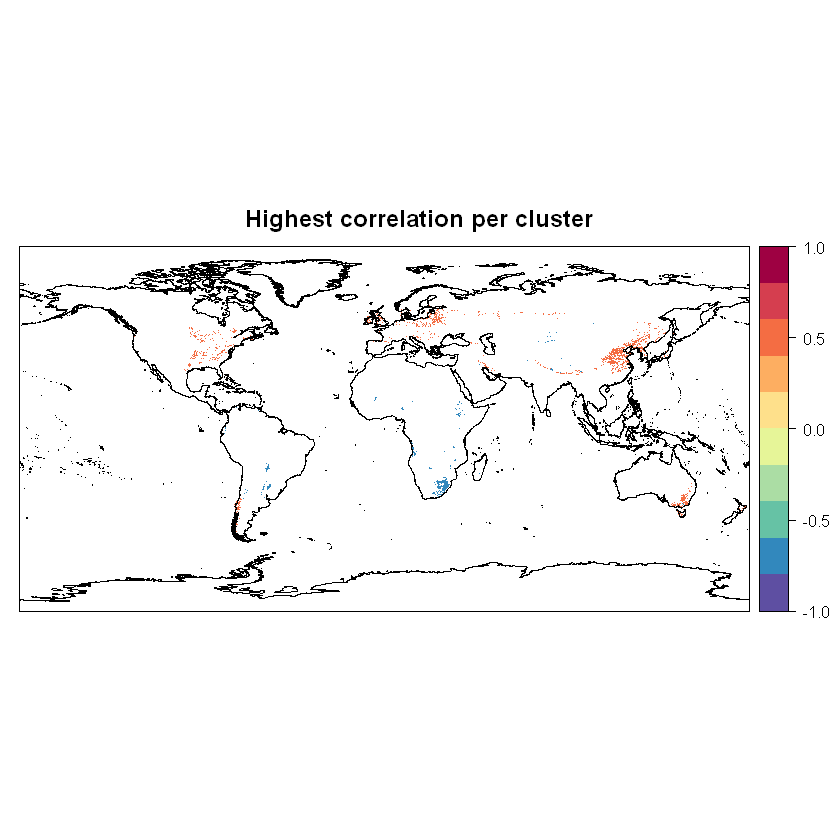

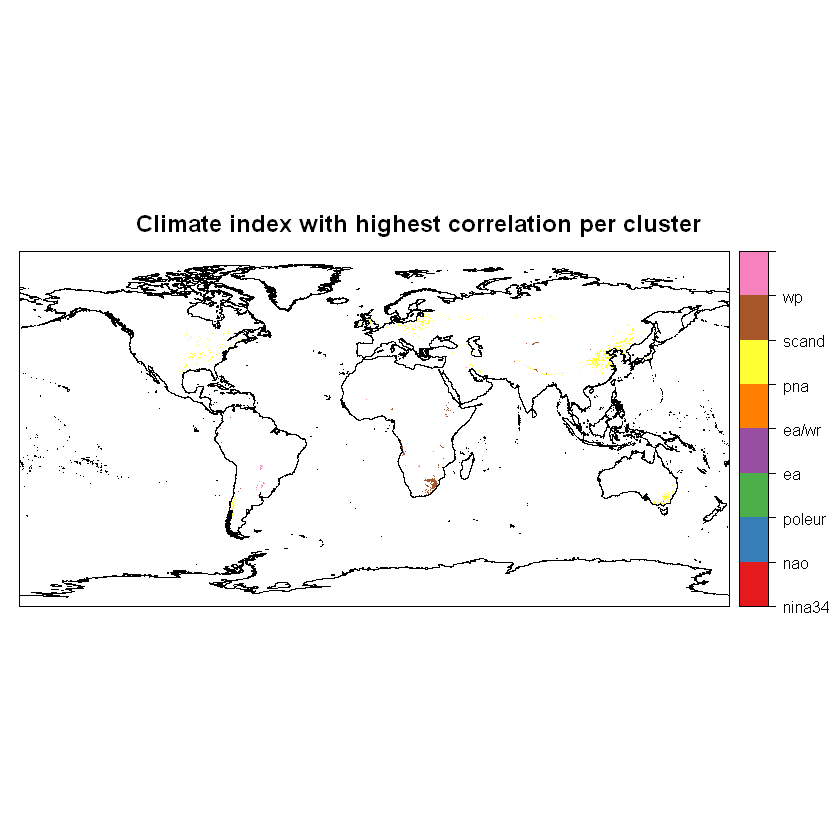

In [34]:
arg.list <- list(col.regions = group.colors[11:1][-6],
                      at = seq(-1, 1, 0.2), main = 'Highest correlation per cluster')

v = apply(corr.df.2.delta.lag.2, 1, function (x) getMaxCorr(x))

df1 <- cbind.data.frame(masked_coords, v)
coordinates(df1) <- c(1,2)
gridded(df1) <- TRUE
arg.list[["sp.layout"]] <- list("sp.lines", coast.lines)
arg.list[["obj"]] <- df1
arg.list[["zcol"]] <- 1
arg.list[["ylim"]] <- c(-90,90)
arg.list[["xlim"]] <- c(-180,180)
do.call("spplot", arg.list) %>% print()
          

arg.list <- list(col.regions = brewer.pal(8, 'Set1'),
                          at = seq(0, 8, 1), main = 'Climate index with highest correlation per cluster')
v = apply(corr.df.2.delta.lag.2, 1, function (x) getIndWithMaxCorr(x))

df1 <- cbind.data.frame(masked_coords, v)
coordinates(df1) <- c(1,2)
gridded(df1) <- TRUE
arg.list[["sp.layout"]] <- list("sp.lines", coast.lines)
arg.list[["obj"]] <- df1
arg.list[["colorkey"]] <- list(labels = list(labels = c("nina34", "nao", "poleur", "ea", "ea/wr", "pna", "scand", "wp","")))
arg.list[["zcol"]] <- 1
arg.list[["ylim"]] <- c(-90,90)
arg.list[["xlim"]] <- c(-180,180)
do.call("spplot", arg.list) %>% print()

## With 3-months persistence

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"Warning message in min(x):
"ningún argumento finito para min; retornando Inf"Warning message in max(x):
"ningun argumento finito para max; retornando -Inf"Warning message in min(x):
"ningún argumento finito para min; retornando Inf"Warning message in max(x):
"ningun argumento finito para max; retornando -Inf"Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"Warning message in min(x):
"ningún argumento finito para min; retornando Inf"Warning message in max(x):
"ningun argumento finito para max; retornando -Inf"Warning message in min(x):
"ningún argumento finito para min; retornando Inf"Warning message in max(x):
"ningun argumento finito para max; retornando -Inf"

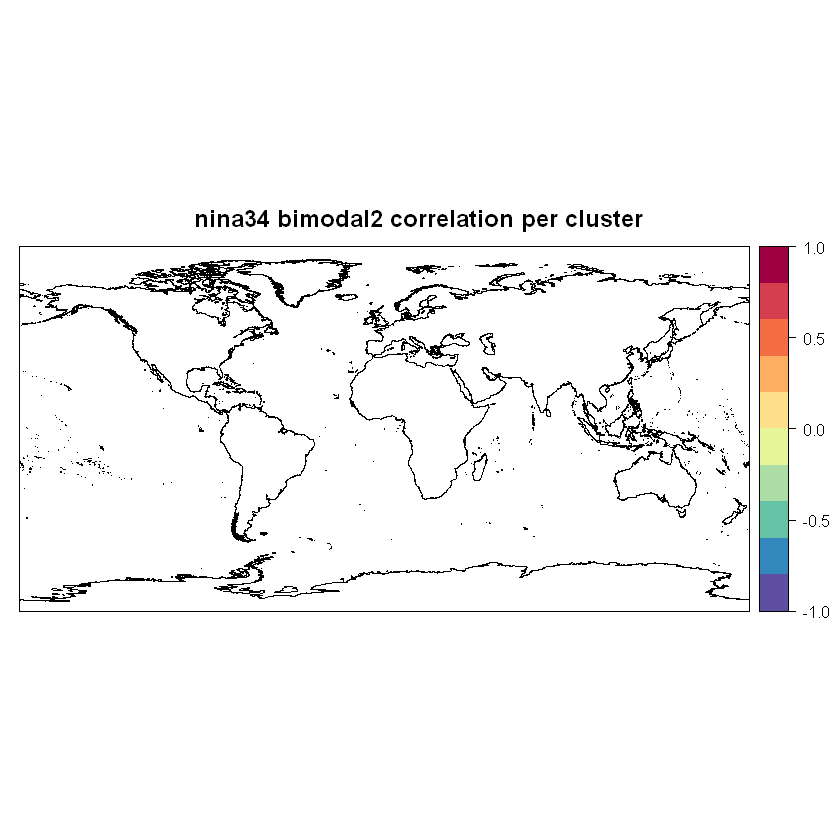

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"Warning message in min(x):
"ningún argumento finito para min; retornando Inf"Warning message in max(x):
"ningun argumento finito para max; retornando -Inf"Warning message in min(x):
"ningún argumento finito para min; retornando Inf"Warning message in max(x):
"ningun argumento finito para max; retornando -Inf"

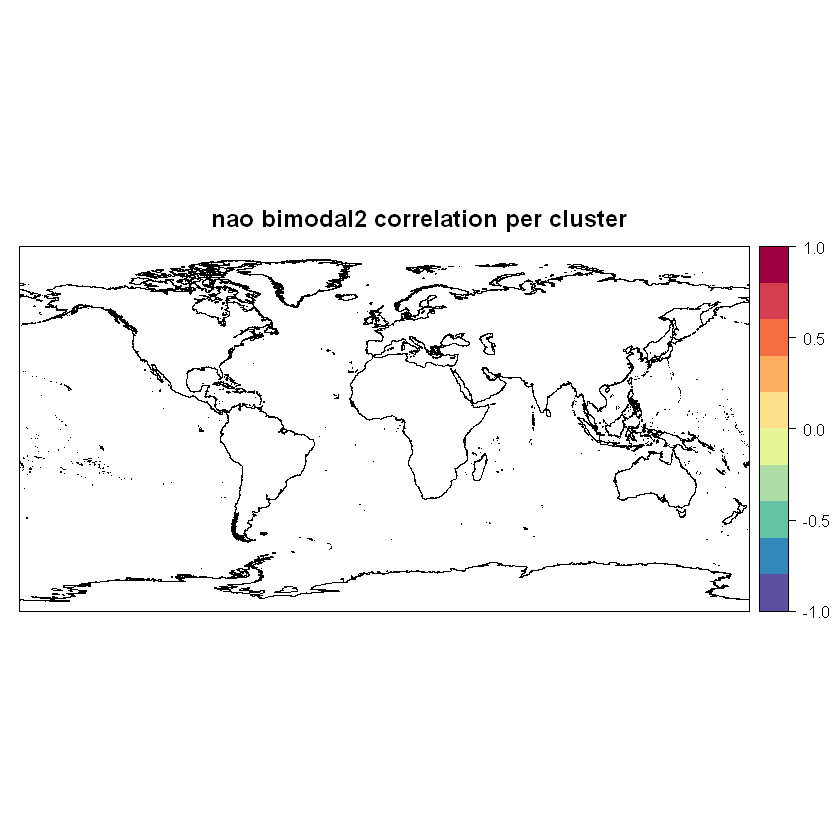

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"Warning message in min(x):
"ningún argumento finito para min; retornando Inf"Warning message in max(x):
"ningun argumento finito para max; retornando -Inf"Warning message in min(x):
"ningún argumento finito para min; retornando Inf"Warning message in max(x):
"ningun argumento finito para max; retornando -Inf"

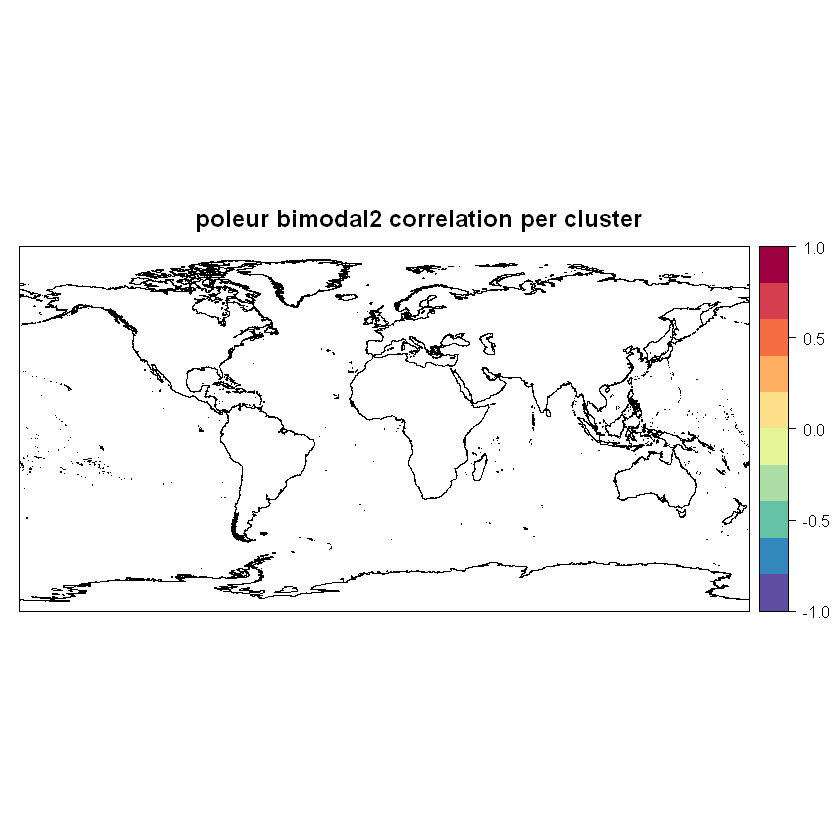

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

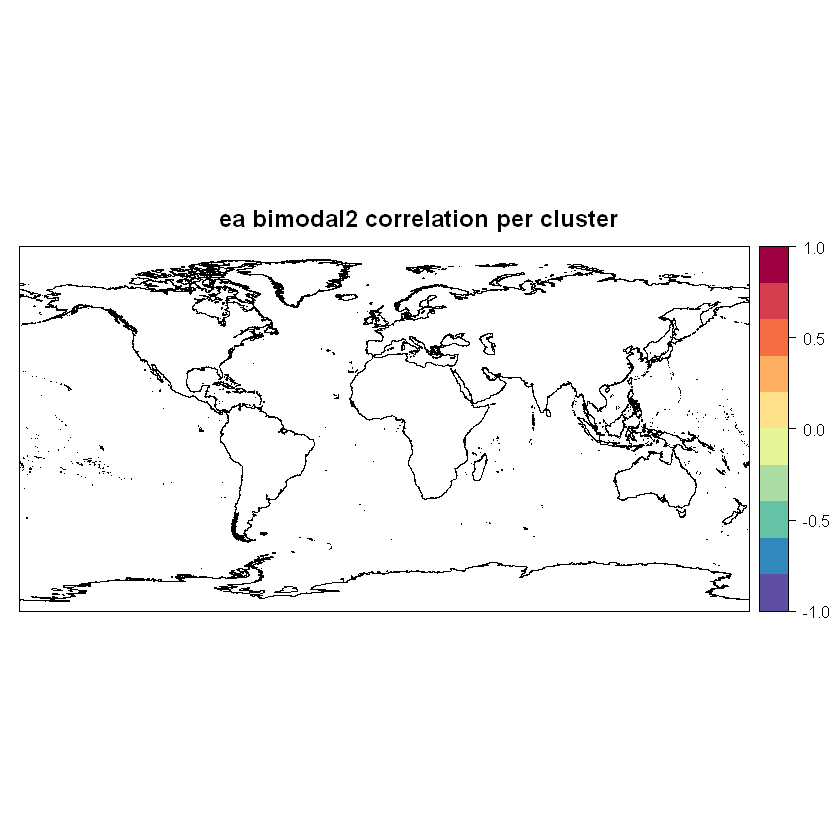

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"Warning message in min(x):
"ningún argumento finito para min; retornando Inf"Warning message in max(x):
"ningun argumento finito para max; retornando -Inf"Warning message in min(x):
"ningún argumento finito para min; retornando Inf"Warning message in max(x):
"ningun argumento finito para max; retornando -Inf"

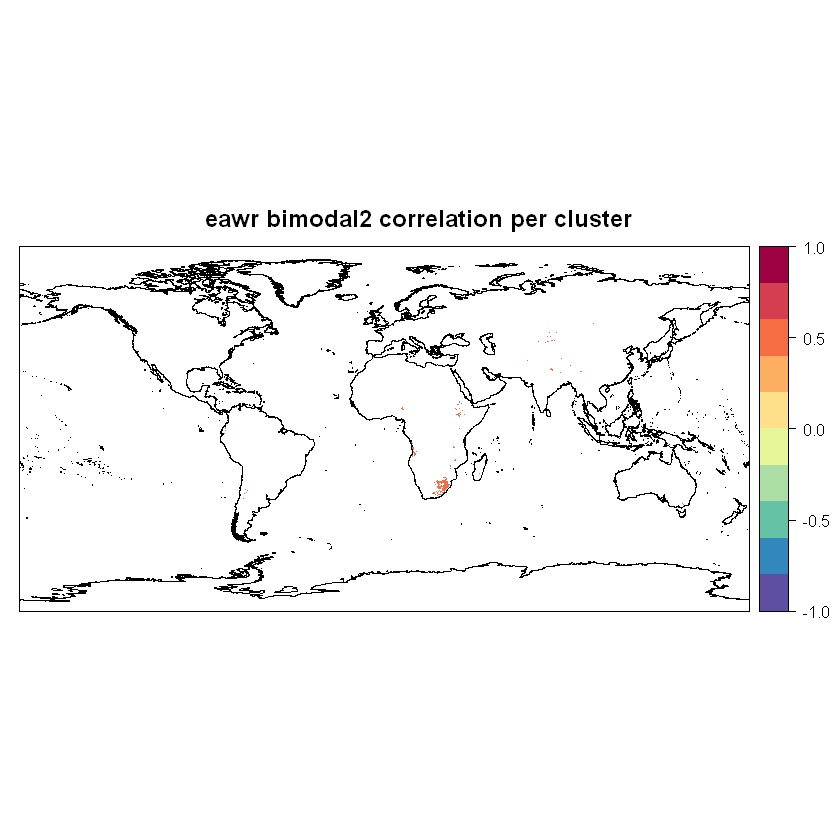

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"Warning message in min(x):
"ningún argumento finito para min; retornando Inf"Warning message in max(x):
"ningun argumento finito para max; retornando -Inf"Warning message in min(x):
"ningún argumento finito para min; retornando Inf"Warning message in max(x):
"ningun argumento finito para max; retornando -Inf"

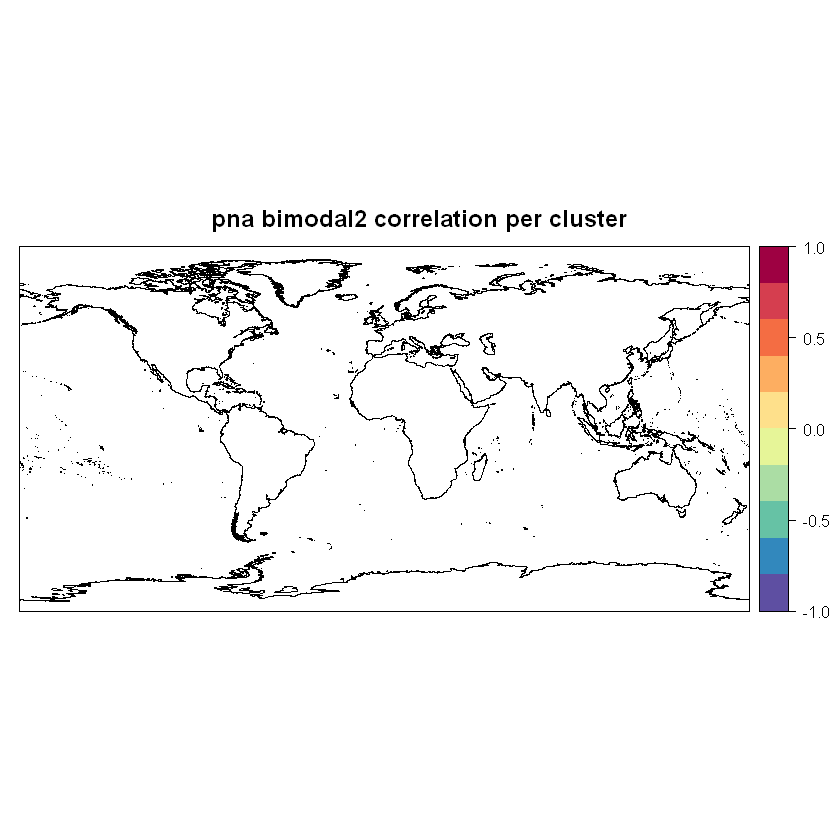

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

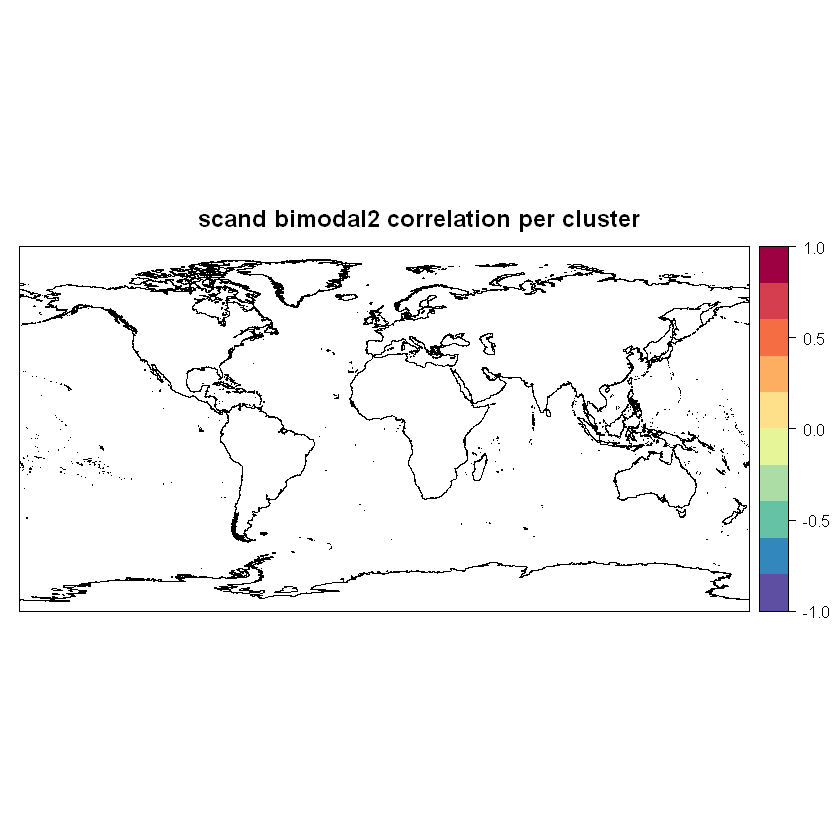

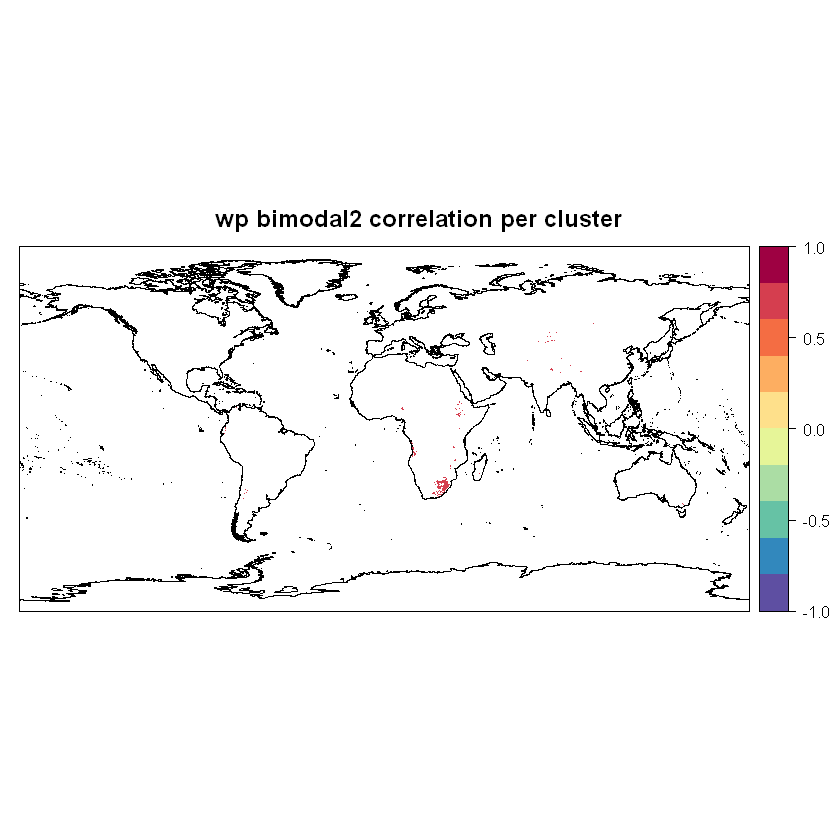

In [35]:
corr.df.2.delta.lag.3 = masked_coords
mode = 'bimodal2'
t = 3
corr.df.2.delta.lag.3 = corr.annual.clus(log1p(masked_ba_series), fireSeason_def_2, masked_coords, dates, nina34, 'nina34',
                                   corr.df.2.delta.lag.3, mode = mode, t = t, useDeltas = T)
corr.df.2.delta.lag.3 = corr.annual.clus(log1p(masked_ba_series), fireSeason_def_2, masked_coords, dates, nao, 'nao',
                                   corr.df.2.delta.lag.3, mode = mode, t = t, useDeltas = T)
corr.df.2.delta.lag.3 = corr.annual.clus(log1p(masked_ba_series), fireSeason_def_2, masked_coords, dates, poleur, 'poleur',
                                   corr.df.2.delta.lag.3, mode = mode, t = t, useDeltas = T)
corr.df.2.delta.lag.3 = corr.annual.clus(log1p(masked_ba_series), fireSeason_def_2, masked_coords, dates, ea, 'ea',
                                   corr.df.2.delta.lag.3, mode = mode, t = t, useDeltas = T)
corr.df.2.delta.lag.3 = corr.annual.clus(log1p(masked_ba_series), fireSeason_def_2, masked_coords, dates, eawr, 'eawr',
                                   corr.df.2.delta.lag.3, mode = mode, t = t, useDeltas = T)
corr.df.2.delta.lag.3 = corr.annual.clus(log1p(masked_ba_series), fireSeason_def_2, masked_coords, dates, pna, 'pna', 
                                   corr.df.2.delta.lag.3, mode = mode, t = t, useDeltas = T)
corr.df.2.delta.lag.3 = corr.annual.clus(log1p(masked_ba_series), fireSeason_def_2, masked_coords, dates, scand, 'scand',
                                   corr.df.2.delta.lag.3, mode = mode, t = t, useDeltas = T)
corr.df.2.delta.lag.3 = corr.annual.clus(log1p(masked_ba_series), fireSeason_def_2, masked_coords, dates, wp, 'wp', 
                                   corr.df.2.delta.lag.3, mode = mode, t = t, useDeltas = T)

#save(corr.df.2.delta.lag.3, file = 'corrDfDeltaClusBiSeLag3V2.Rdata')

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

Number of pixels correlated with more than  0  indexes  637 
Number of pixels correlated with more than  1  indexes  637 
Number of pixels correlated with more than  2  indexes  0 
Number of pixels correlated with more than  3  indexes  0 
Number of pixels correlated with more than  4  indexes  0 
Number of pixels correlated with more than  5  indexes  0 
Number of pixels correlated with more than  6  indexes  0 
Number of pixels correlated with more than  7  indexes  0 


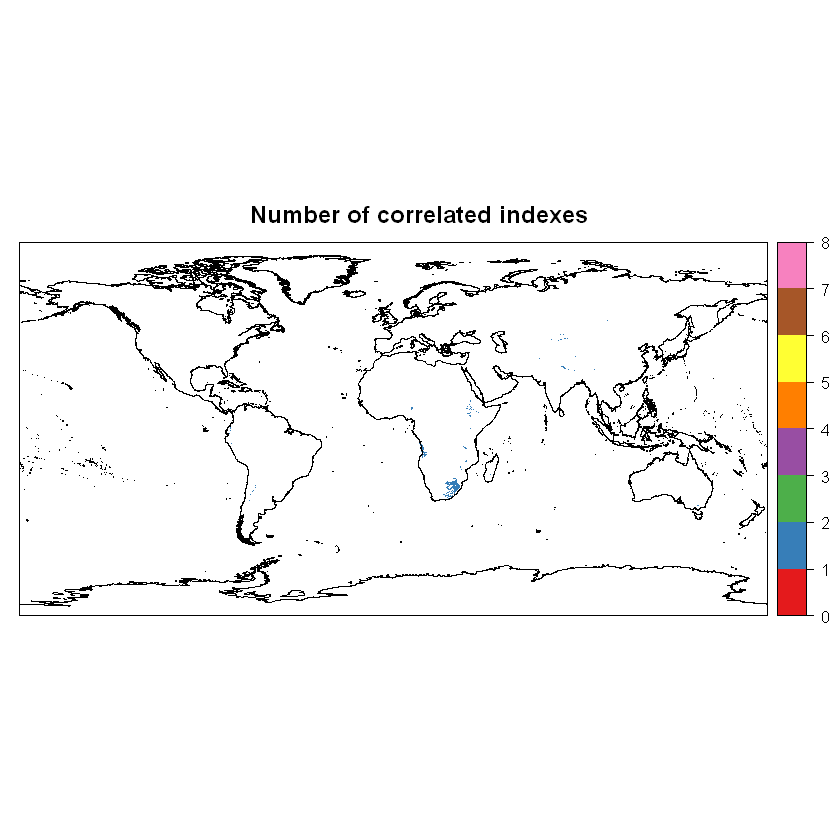

In [36]:
arg.list <- list(col.regions = brewer.pal(8, 'Set1'),
                          at = seq(0, 8, 1), main = 'Number of correlated indexes')

v = cbind(as.numeric(corr.df.2.delta.lag.3$nao.2.pvalue<0.05), as.numeric(corr.df.2.delta.lag.3$poleur.2.pvalue<0.05),
          as.numeric(corr.df.2.delta.lag.3$ea.2.pvalue<0.05),as.numeric(corr.df.2.delta.lag.3$eawr.2.pvalue<0.05),
          as.numeric(corr.df.2.delta.lag.3$pna.2.pvalue<0.05), as.numeric(corr.df.2.delta.lag.3$nina34.2.pvalue<0.05),
          as.numeric(corr.df.2.delta.lag.3$scand.2.pvalue<0.05), as.numeric(corr.df.2.delta.lag.3$wp.2.pvalue<0.05))

suma = rowSums(v, na.rm=T)
v <- suma
v[which(v < 1)] <- NA

df1 <- cbind.data.frame(masked_coords, v)
coordinates(df1) <- c(1,2)
gridded(df1) <- TRUE
arg.list[["sp.layout"]] <- list("sp.lines", coast.lines)
arg.list[["obj"]] <- df1
arg.list[["zcol"]] <- 1
arg.list[["ylim"]] <- c(-90,90)
arg.list[["xlim"]] <- c(-180,180)
do.call("spplot", arg.list) %>% print()

for (i in 1:8){
    cat('Number of pixels correlated with more than ', i-1, ' indexes ', sum(suma > i-1), '\n')
}

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

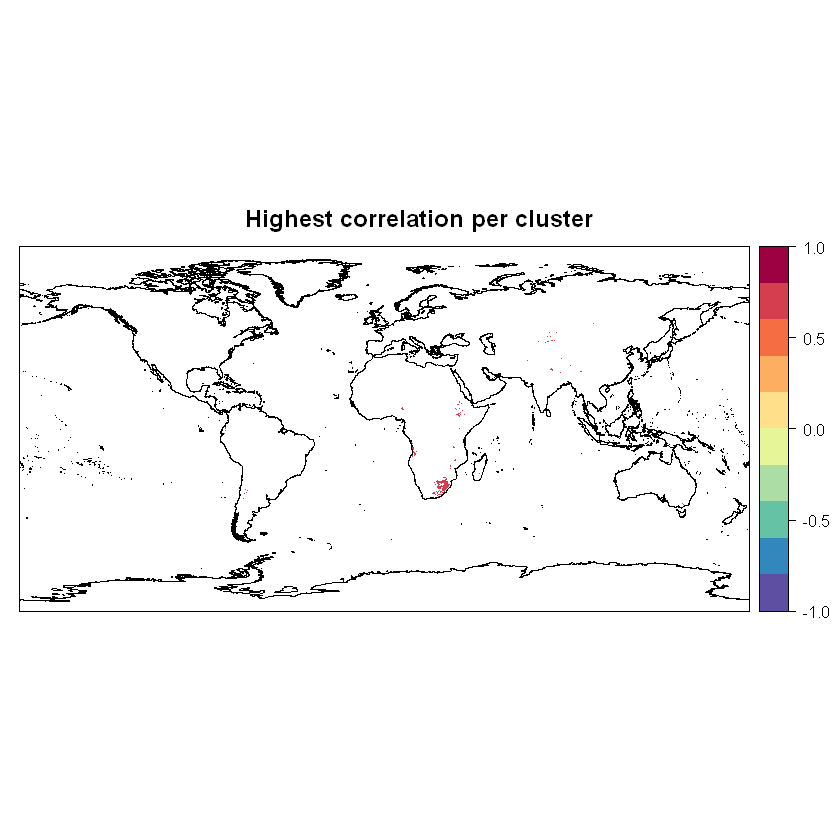

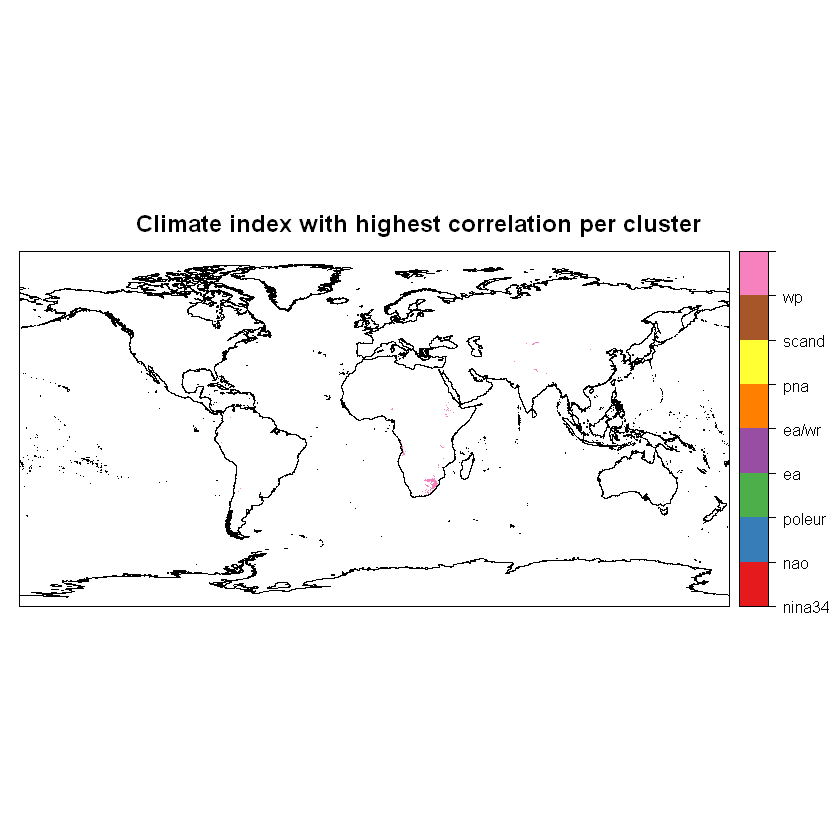

In [37]:
arg.list <- list(col.regions = group.colors[11:1][-6],
                      at = seq(-1, 1, 0.2), main = 'Highest correlation per cluster')

v = apply(corr.df.2.delta.lag.3, 1, function (x) getMaxCorr(x))

df1 <- cbind.data.frame(masked_coords, v)
coordinates(df1) <- c(1,2)
gridded(df1) <- TRUE
arg.list[["sp.layout"]] <- list("sp.lines", coast.lines)
arg.list[["obj"]] <- df1
arg.list[["zcol"]] <- 1
arg.list[["ylim"]] <- c(-90,90)
arg.list[["xlim"]] <- c(-180,180)
do.call("spplot", arg.list) %>% print()
          

arg.list <- list(col.regions = brewer.pal(8, 'Set1'),
                          at = seq(0, 8, 1), main = 'Climate index with highest correlation per cluster')
v = apply(corr.df.2.delta.lag.3, 1, function (x) getIndWithMaxCorr(x))

df1 <- cbind.data.frame(masked_coords, v)
coordinates(df1) <- c(1,2)
gridded(df1) <- TRUE
arg.list[["sp.layout"]] <- list("sp.lines", coast.lines)
arg.list[["obj"]] <- df1
arg.list[["colorkey"]] <- list(labels = list(labels = c("nina34", "nao", "poleur", "ea", "ea/wr", "pna", "scand", "wp","")))
arg.list[["zcol"]] <- 1
arg.list[["ylim"]] <- c(-90,90)
arg.list[["xlim"]] <- c(-180,180)
do.call("spplot", arg.list) %>% print()

## Combining all: secondary fire season without deltas

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

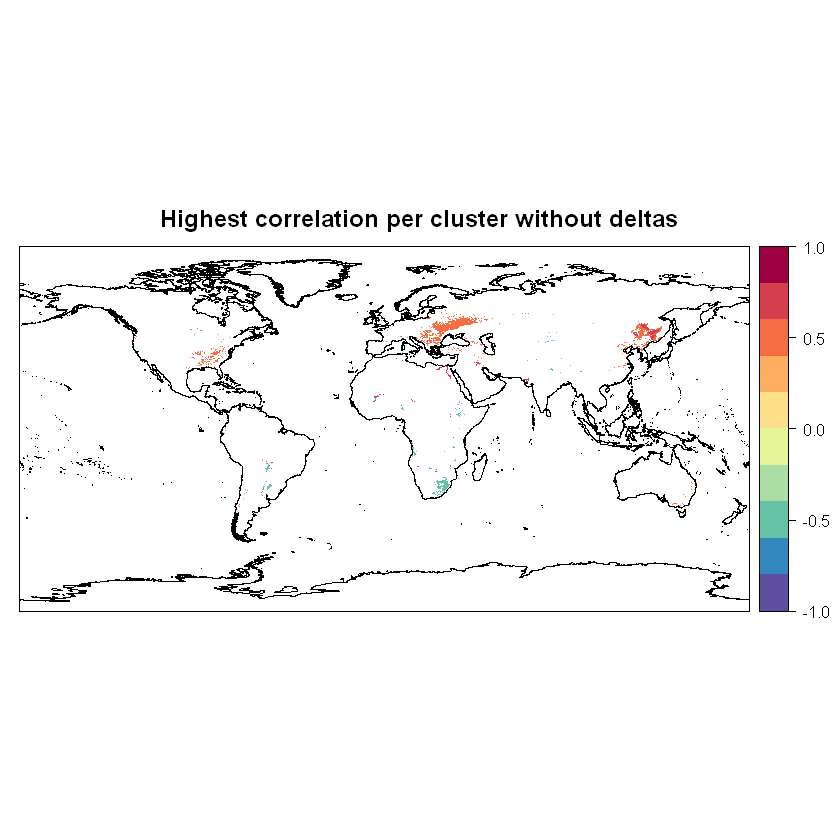

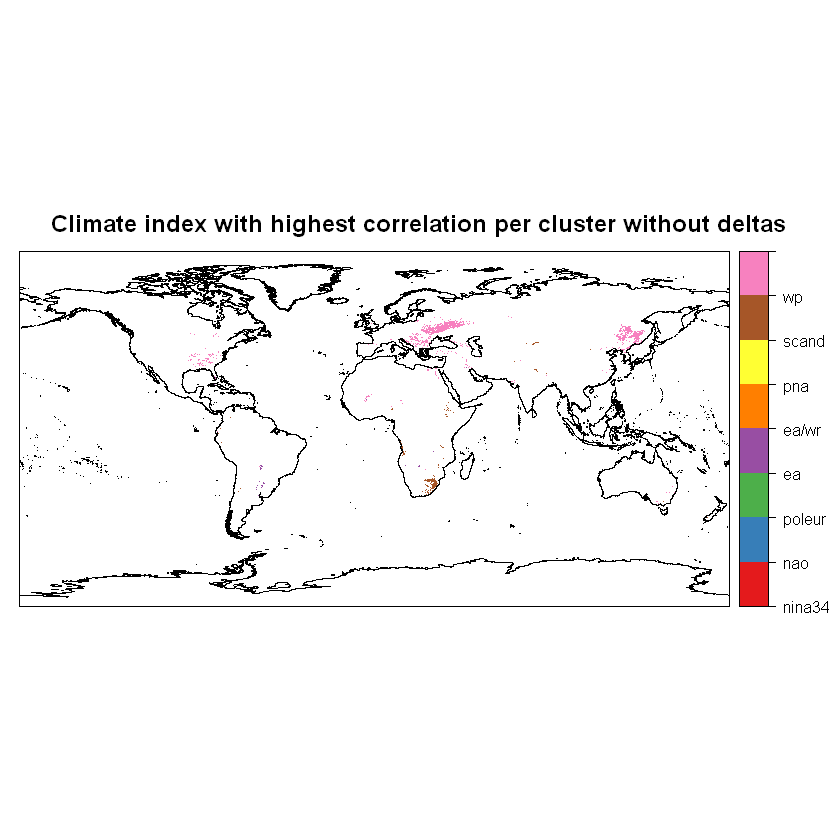

In [38]:
arg.list <- list(col.regions = group.colors[11:1][-6],
                      at = seq(-1, 1, 0.2), main = 'Highest correlation per cluster without deltas')

v = apply(cbind(corr.df.2, corr.df.2.lag.1[,-c(1,2)], corr.df.2.lag.2[,-c(1,2)], corr.df.2.lag.3[,-c(1,2)]), 1,
          function (x) getMaxCorr(x))

df1 <- cbind.data.frame(masked_coords, v)
coordinates(df1) <- c(1,2)
gridded(df1) <- TRUE
arg.list[["sp.layout"]] <- list("sp.lines", coast.lines)
arg.list[["obj"]] <- df1
arg.list[["zcol"]] <- 1
arg.list[["ylim"]] <- c(-90,90)
arg.list[["xlim"]] <- c(-180,180)
do.call("spplot", arg.list) %>% print()
 
          
arg.list <- list(col.regions = brewer.pal(8, 'Set1'),
                          at = seq(0, 8, 1), main = 'Climate index with highest correlation per cluster without deltas')
v = apply(cbind(corr.df.2, corr.df.2.lag.1[,-c(1,2)], corr.df.2.lag.2[,-c(1,2)], corr.df.2.lag.3[,-c(1,2)]), 1,
          function (x) getIndWithMaxCorr(x))

df1 <- cbind.data.frame(masked_coords, v)
coordinates(df1) <- c(1,2)
gridded(df1) <- TRUE
arg.list[["sp.layout"]] <- list("sp.lines", coast.lines)
arg.list[["obj"]] <- df1
arg.list[["colorkey"]] <- list(labels = list(labels = c("nina34", "nao", "poleur", "ea", "ea/wr", "pna", "scand", "wp","")))
arg.list[["zcol"]] <- 1
arg.list[["ylim"]] <- c(-90,90)
arg.list[["xlim"]] <- c(-180,180)
do.call("spplot", arg.list) %>% print()          

## Combining all: secondary fire season with deltas

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

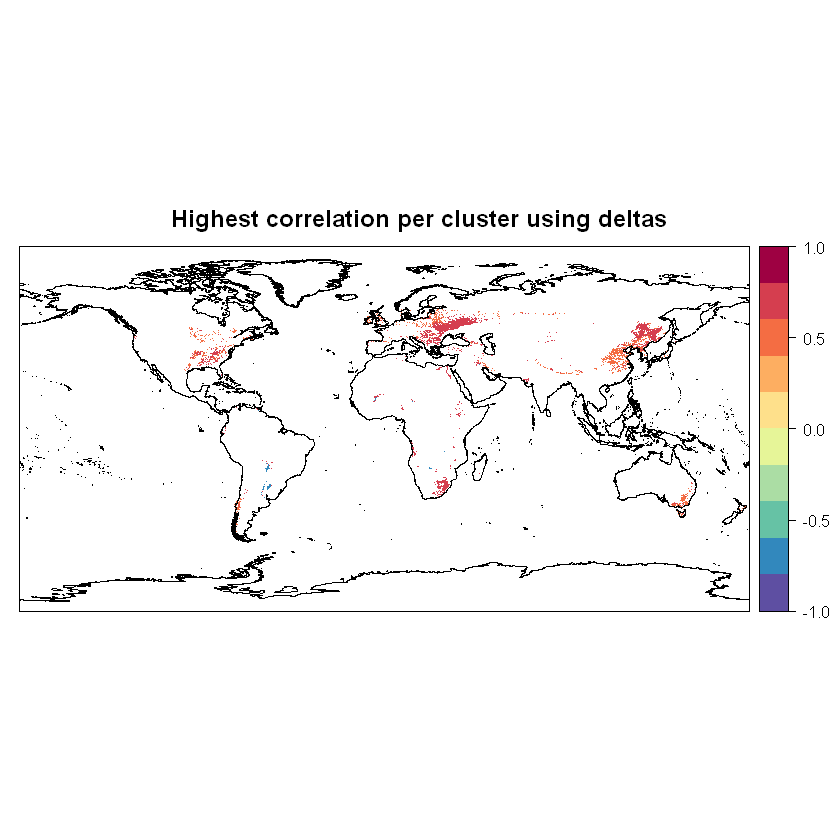

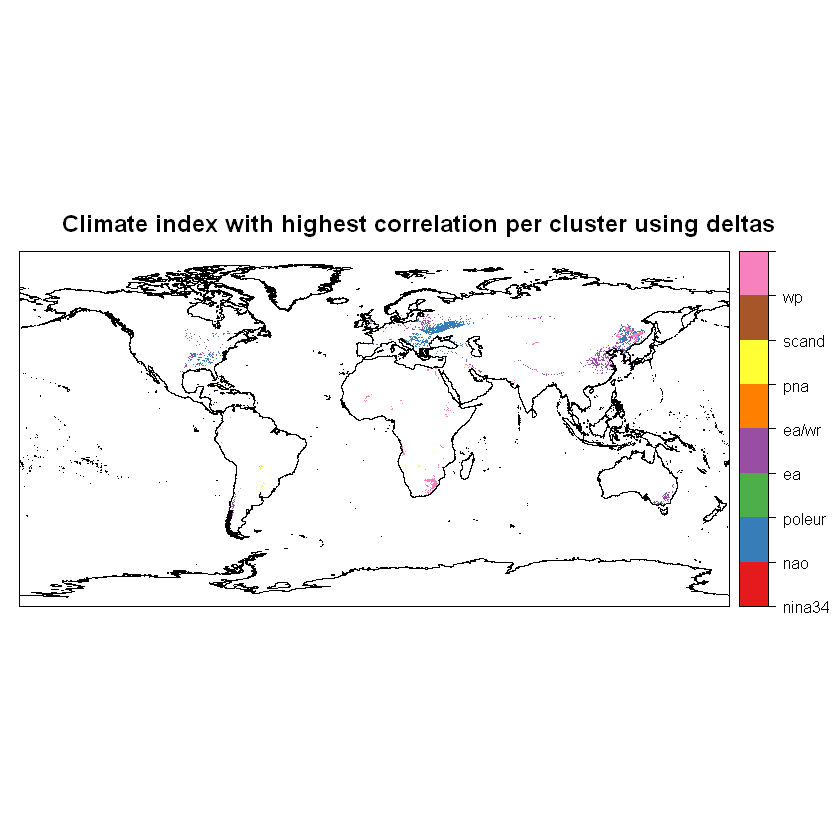

In [39]:
arg.list <- list(col.regions = group.colors[11:1][-6],
                      at = seq(-1, 1, 0.2), main = 'Highest correlation per cluster using deltas')

v = apply(cbind(corr.df.2.delta, corr.df.2.delta.lag.1[,-c(1,2)], corr.df.2.delta.lag.2[,-c(1,2)], corr.df.2.delta.lag.3[,-c(1,2)]), 1,
          function (x) getMaxCorr(x))

df1 <- cbind.data.frame(masked_coords, v)
coordinates(df1) <- c(1,2)
gridded(df1) <- TRUE
arg.list[["sp.layout"]] <- list("sp.lines", coast.lines)
arg.list[["obj"]] <- df1
arg.list[["zcol"]] <- 1
arg.list[["ylim"]] <- c(-90,90)
arg.list[["xlim"]] <- c(-180,180)
do.call("spplot", arg.list) %>% print()
 
          
arg.list <- list(col.regions = brewer.pal(8, 'Set1'),
                          at = seq(0, 8, 1), main = 'Climate index with highest correlation per cluster using deltas')
v = apply(cbind(corr.df.2.delta, corr.df.2.delta.lag.1[,-c(1,2)], corr.df.2.delta.lag.2[,-c(1,2)], corr.df.2.delta.lag.3[,-c(1,2)]), 1,
          function (x) getIndWithMaxCorr(x))

df1 <- cbind.data.frame(masked_coords, v)
coordinates(df1) <- c(1,2)
gridded(df1) <- TRUE
arg.list[["sp.layout"]] <- list("sp.lines", coast.lines)
arg.list[["obj"]] <- df1
arg.list[["colorkey"]] <- list(labels = list(labels = c("nina34", "nao", "poleur", "ea", "ea/wr", "pna", "scand", "wp","")))
arg.list[["zcol"]] <- 1
arg.list[["ylim"]] <- c(-90,90)
arg.list[["xlim"]] <- c(-180,180)
do.call("spplot", arg.list) %>% print()          